In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, cross_validate, RepeatedKFold
from sklearn.model_selection import LeaveOneOut, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, mean_absolute_error
import joblib
from sklearn.impute import SimpleImputer

In [3]:
X_train, X_test, y_train, y_test = joblib.load("/home/pansurya/OSIC_thesis/radiomics_files/data_splits_clinical_without_harmonization.pkl")
X_train

original_shape_Elongation_right_lung  original_shape_Flatness_right_lung  \
68                               0.935257                            0.657781   
231                              0.363801                            0.148802   
63                               0.435434                            0.255256   
436                              0.991341                            0.763196   
60                               0.787316                            0.504536   
..                                    ...                                 ...   
71                               0.902215                            0.696821   
106                              0.572259                            0.266674   
270                              0.665770                            0.521124   
435                              0.695270                            0.460472   
102                              0.753702                            0.500653   

     original_shape_LeastAxisLength_right_lung  \
68                                  144.261068   
231                                  62.959446   
63                                   70.343516   
436                                 128.145586   
60                                  137.367760   
..                                         ...   
71                                  131.876472   
106                                  76.773217   
270                                 143.254949   
435                                 117.548285   
102                                 136.222887   

     original_shape_MajorAxisLength_right_lung  \
68                                  219.314723   
231                                 423.109153   
63                                  275.580196   
436                                 167.906598   
60                                  272.265484   
..                                         ...   
71                                  189.254310   
106                                 287.891195   
270                                 274.895899   
435                                 255.277999   
102                                 272.090380   

     original_shape_Maximum2DDiameterColumn_right_lung  \
68                                          282.618117   
231                                         478.204977   
63                                          305.360443   
436                                         222.002252   
60                                          362.012431   
..                                                 ...   
71                                          215.844852   
106                                         340.711021   
270                                         295.743132   
435                                         285.156098   
102                                         322.622070   

     original_shape_Maximum2DDiameterRow_right_lung  \
68                                       241.099564   
231                                      168.668314   
63                                       139.301831   
436                                      190.433716   
60                                       327.879551   
..                                              ...   
71                                       210.440015   
106                                      177.138364   
270                                      209.117192   
435                                      187.085542   
102                                      224.644163   

     original_shape_Maximum2DDiameterSlice_right_lung  \
68                                         229.172424   
231                                        488.983640   
63                                         316.412705   
436                                        199.371513   
60                                         238.077718   
..                                                ...   
71                                         225.842866   
106             

In [16]:
X_train, X_test, y_train, y_test = joblib.load("/home/pansurya/OSIC_thesis/data_splits_without_nan.pkl")
X_train

original_shape_Elongation_right_lung  original_shape_Flatness_right_lung  \
248                              0.845409                            0.586357   
88                               0.328207                            0.143961   
334                              0.935786                            0.810250   
362                              0.823642                            0.557428   
33                               0.775527                            0.569478   
..                                    ...                                 ...   
71                               0.920635                            0.735923   
106                              0.213349                            0.039135   
270                              0.727618                            0.603692   
435                              0.696581                            0.501533   
102                              0.443921                            0.280654   

     original_shape_LeastAxisLength_right_lung  \
248                                 125.973088   
88                                   71.266999   
334                                 136.454820   
362                                 134.111620   
33                                  105.446032   
..                                         ...   
71                                  151.955836   
106                                  29.020257   
270                                 124.817562   
435                                 105.947906   
102                                 121.957949   

     original_shape_MajorAxisLength_right_lung  \
248                                 214.840147   
88                                  495.043243   
334                                 168.410856   
362                                 240.589891   
33                                  185.162548   
..                                         ...   
71                                  206.483441   
106                                 741.533846   
270                                 206.757003   
435                                 211.247943   
102                                 434.548780   

     original_shape_Maximum2DDiameterColumn_right_lung  \
248                                         286.356421   
88                                          541.003697   
334                                         227.138724   
362                                         266.270539   
33                                          222.910296   
..                                                 ...   
71                                          258.373760   
106                                         885.009040   
270                                         198.806439   
435                                         190.031576   
102                                         457.629763   

     original_shape_Maximum2DDiameterRow_right_lung  \
248                                      278.303791   
88                                       182.274518   
334                                      193.932978   
362                                      215.127869   
33                                       240.709368   
..                                              ...   
71                                       229.200785   
106                                      904.221212   
270                                      235.518577   
435                                      216.411645   
102                                      212.812124   

     original_shape_Maximum2DDiameterSlice_right_lung  \
248                                        208.830074   
88                                         579.338416   
334                                        189.842040   
362                                        276.920566   
33                                         167.764716   
..                                                ...   
71                                         233.893138   
106             

In [4]:
X_train, X_test, y_train, y_test = joblib.load("/home/pansurya/OSIC_thesis/radiomics_files/data_splits_clinical_with_harmonizationBYneuroCombat.pkl")
X_train

original_shape_Elongation_right_lung  original_shape_Flatness_right_lung  \
68                              -0.801690                           -0.423661   
231                             -1.938615                           -1.631483   
63                               1.113371                            1.182766   
436                             -0.325769                           -1.648410   
60                               0.597027                           -0.282885   
..                                    ...                                 ...   
71                               1.325752                            1.095869   
106                              1.191322                            0.874959   
270                              0.881117                            0.550638   
435                             -0.170100                            0.898534   
102                             -0.492641                           -0.359535   

     original_shape_LeastAxisLength_right_lung  \
68                                    0.209693   
231                                  -1.758075   
63                                    0.343736   
436                                  -1.590896   
60                                   -0.459398   
..                                         ...   
71                                    0.172632   
106                                   0.620834   
270                                   0.109001   
435                                   0.696189   
102                                   0.048307   

     original_shape_MajorAxisLength_right_lung  \
68                                    0.503878   
231                                   3.838881   
63                                   -0.934132   
436                                  -0.167468   
60                                   -0.241854   
..                                         ...   
71                                   -1.004136   
106                                  -0.694231   
270                                  -0.751007   
435                                  -0.356924   
102                                   0.418847   

     original_shape_Maximum2DDiameterColumn_right_lung  \
68                                            0.209334   
231                                           3.883357   
63                                           -0.841002   
436                                          -0.230180   
60                                           -0.424035   
..                                                 ...   
71                                           -0.870571   
106                                          -0.496654   
270                                          -0.805657   
435                                          -0.135033   
102                                           0.464557   

     original_shape_Maximum2DDiameterRow_right_lung  \
68                                        -0.270500   
231                                        5.765053   
63                                        -0.331873   
436                                       -0.043417   
60                                        -0.190577   
..                                              ...   
71                                        -0.384513   
106                                       -0.208759   
270                                       -0.270737   
435                                       -0.402425   
102                                       -0.088582   

     original_shape_Maximum2DDiameterSlice_right_lung  \
68                                           0.677389   
231                                         -0.720709   
63                                          -0.913648   
436                                         -0.647166   
60                                           0.311207   
..                                                ...   
71                                          -0.998567   
106             

In [5]:
X_train, X_test, y_train, y_test = joblib.load("/home/pansurya/OSIC_thesis/radiomics_files/data_splits_with_clinical_harmonization.pkl")
X_train

original_shape_Elongation_right_lung  \
796891                              -0.263744   
750718                              -1.629648   
1000901                              0.586622   
1000788                              0.584756   
666514                              -2.337290   
...                                       ...   
960165                               1.542133   
1001244                             -0.217081   
1001220                              1.217005   
1001102                              1.300262   
1001100                              0.881231   

         original_shape_Flatness_right_lung  \
796891                             0.279487   
750718                            -1.650408   
1000901                            0.623719   
1000788                            1.032199   
666514                            -1.918511   
...                                     ...   
960165                             1.368270   
1001244                           -1.247657   
1001220                            0.873018   
1001102                            1.373072   
1001100                            0.355212   

         original_shape_LeastAxisLength_right_lung  \
796891                                    0.741662   
750718                                   -0.538400   
1000901                                   0.882809   
1000788                                   0.430881   
666514                                   -1.861365   
...                                            ...   
960165                                    0.849788   
1001244                                  -1.367277   
1001220                                   0.755679   
1001102                                   1.001466   
1001100                                   0.564108   

         original_shape_MajorAxisLength_right_lung  \
796891                                   -0.053152   
750718                                    2.846807   
1000901                                  -0.606245   
1000788                                  -1.159772   
666514                                    2.623947   
...                                            ...   
960165                                   -1.172809   
1001244                                  -0.794604   
1001220                                  -0.831453   
1001102                                  -0.952648   
1001100                                  -0.624991   

         original_shape_Maximum2DDiameterColumn_right_lung  \
796891                                            0.015855   
750718                                            2.570431   
1000901                                          -0.614231   
1000788                                          -1.199329   
666514                                            2.714506   
...                                                    ...   
960165                                           -1.045336   
1001244                                          -1.153348   
1001220                                          -0.657526   
1001102                                          -0.838902   
1001100                                          -0.576746   

         original_shape_Maximum2DDiameterRow_right_lung  \
796891                                        -0.314856   
750718                                        -0.195544   
1000901                                        0.126116   
1000788                                       -0.131739   
666514                                         3.011231   
...                                                 ...   
960165                                         0.189754   
1001244                                       -0.337992   
1001220                                       -0.054088   
1001102                                        0.898586   
1001100                                        0.107252   

         original_shape_Maximum2DDiameterSlice_right_lung  \
796891                                    

In [3]:
X_train, X_test, y_train, y_test = joblib.load("data_splits_without_nan.pkl")
print("Target mean:", y_train.mean())
print("Target std:", y_train.std())
print("Target min:", y_train.min())
print("Target max:", y_train.max())
print("Train size:", X_train.shape)
print("Train size:", X_test.shape)

Target mean: 2.4832841409691633
Target std: 0.8964304788506441
Target min: 0.68
Target max: 5.59
Train size: (454, 2659)
Train size: (114, 2659)


In [23]:
Clinical_Contineous_data = ['Baseline FVC Volume L',  'FEV1 Volume L', 'Age'
       ]

Clinical_Categorical_data = [
    'Primary Diagnosis_CTD-ILD',
       'Primary Diagnosis_Emphysema', 'Primary Diagnosis_Exposure-related',
       'Primary Diagnosis_Fibrotic HP (FHP)', 'Primary Diagnosis_INSIP',
       'Primary Diagnosis_IPF', 'Primary Diagnosis_Idiopathic OP',
       'Primary Diagnosis_Idiopathic pleuroparenchymal fibroelastosis (IPPFE)',
       'Primary Diagnosis_Miscellaneous', 'Primary Diagnosis_NSIP',
       'Primary Diagnosis_No information',
       'Primary Diagnosis_Occupational-related ILD',
       'Primary Diagnosis_Sarcoidosis',
       'Primary Diagnosis_Smoking Related ILD (DIP / RB / RB-ILD)',
       'Primary Diagnosis_UILD',  
       'Sex_Male', 'Smoking History_Ex Smoker',
       'Smoking History_Never Smoker', 'Smoking History_No Knowledge']
#Clinical_Categorical_data = ['Sex_Male', 'Primary Diagnosis_CTD-ILD', 'Primary Diagnosis_Exposure-related', 'Primary Diagnosis_Fibrotic HP (FHP)', 'Primary Diagnosis_INSIP', 'Primary Diagnosis_IPF', 'Primary Diagnosis_Idiopathic OP', 'Primary Diagnosis_Miscellaneous', 'Primary Diagnosis_No information', 'Primary Diagnosis_Occupational-related ILD', 'Primary Diagnosis_Other', 'Primary Diagnosis_Sarcoidosis', 'Primary Diagnosis_Smoking Related ILD (DIP / RB / RB-ILD)', 'Primary Diagnosis_UILD', 'Smoking History_Ex Smoker', 'Smoking History_Never Smoker', 'Smoking History_No Knowledge']


In [5]:
#influence age
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

#tested
selected_features =['original_shape_MinorAxisLength_right_lung', 'original_glszm_LargeAreaLowGrayLevelEmphasis_right_lung', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_right_lung', 'wavelet-LLH_gldm_LargeDependenceHighGrayLevelEmphasis_left_lung', 'wavelet-LHH_firstorder_Kurtosis_right_lung', 'wavelet-LHH_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'wavelet-HLH_firstorder_Skewness_left_lung', 'wavelet-HLH_glcm_MCC_right_lung', 'wavelet-HLH_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'wavelet-HHL_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'log-sigma-5-0-mm-3D_glcm_ClusterShade_right_lung', 'original_shape_MinorAxisLength_left_lung', 'log-sigma-5-0-mm-3D_firstorder_Maximum_left_lung', 'log-sigma-5-0-mm-3D_firstorder_Skewness_left_lung']
Clinical_Contineous_data_ext = Clinical_Contineous_data + selected_features + Clinical_Categorical_data
print(selected_features)
X_train, X_test, y_train, y_test = joblib.load("data_splits_without_nan.pkl")
# Subset features
X_train_sel = X_train[Clinical_Contineous_data_ext]
X_test_sel = X_test[Clinical_Contineous_data_ext]
print(X_train_sel.shape)
print(X_test_sel.shape)



# --- 1. Copy train/test ---
X_train_clini_log = X_train_sel
X_test_clini_log  = X_test_sel

# Columns to transform
cols_to_transform = ['Age']

# Example: sqrt transform
for col in cols_to_transform:
    X_train_clini_log[col] = np.log(X_train_clini_log[col])
    X_test_clini_log[col] = np.log(X_test_clini_log[col])

print(X_train_clini_log.shape)
# Initialize the simple imputer (median fill)
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(X_train_clini_log)

# Transform train and test
X_train_median_filled = imp_median.transform(X_train_clini_log)
X_test_median_filled = imp_median.transform(X_test_clini_log)

# Fit linear regression
reg = LinearRegression().fit(X_train_median_filled, y_train)

# Predictions
pred = reg.predict(X_test_median_filled)

# RMSE
rmse = root_mean_squared_error(y_test, pred)
print("RMSE:", rmse)


['original_shape_MinorAxisLength_right_lung', 'original_glszm_LargeAreaLowGrayLevelEmphasis_right_lung', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_right_lung', 'wavelet-LLH_gldm_LargeDependenceHighGrayLevelEmphasis_left_lung', 'wavelet-LHH_firstorder_Kurtosis_right_lung', 'wavelet-LHH_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'wavelet-HLH_firstorder_Skewness_left_lung', 'wavelet-HLH_glcm_MCC_right_lung', 'wavelet-HLH_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'wavelet-HHL_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'log-sigma-5-0-mm-3D_glcm_ClusterShade_right_lung', 'original_shape_MinorAxisLength_left_lung', 'log-sigma-5-0-mm-3D_firstorder_Maximum_left_lung', 'log-sigma-5-0-mm-3D_firstorder_Skewness_left_lung']
(454, 36)
(114, 36)
(454, 36)
RMSE: 0.3871817227927972


/tmp/ipykernel_1399397/3151157482.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_clini_log[col] = np.log(X_train_clini_log[col])
/tmp/ipykernel_1399397/3151157482.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_clini_log[col] = np.log(X_test_clini_log[col])


In [6]:

def train_and_evaluate_with_LOOCV(X_train, X_test, y_train, y_test, feature_list, numeric_features, onehot_features, model_name="linear_regression_pipeline.pkl"):
    """
    Train and evaluate a linear regression pipeline on selected features using LOOCV
    with aggregated predictions (so R² is meaningful).
    """

        # Preprocessor: scale numeric features, passthrough one-hot features
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_features),
            ("onehot", "passthrough", onehot_features)
        ]
    )

    # Build pipeline
    pipeline = Pipeline([
        ("scaler", preprocessor()),
        ("lr", LinearRegression())
    ])

    # Leave-One-Out Cross-Validation setup
    loo = LeaveOneOut()

    # Collect predictions for each left-out sample
    y_true, y_pred = [], []
    for train_idx, val_idx in loo.split(X_train):
        pipeline.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
        pred = pipeline.predict(X_train.iloc[val_idx])
        y_true.append(y_train.iloc[val_idx].values[0])
        y_pred.append(pred[0])

    # Compute aggregated LOOCV metrics
    loocv_mae = mean_absolute_error(y_true, y_pred)
    loocv_mse = mean_squared_error(y_true, y_pred)
    loocv_rmse = np.sqrt(loocv_mse)
    loocv_r2 = r2_score(y_true, y_pred)

    print("\nLOOCV aggregated results:")
    print(f"- MAE:  {loocv_mae:.2f}")
    print(f"- MSE:  {loocv_mse:.2f}")
    print(f"- RMSE: {loocv_rmse:.2f}")
    print(f"- R²:   {loocv_r2:.3f}")

    # Fit final model on full training set
    pipeline.fit(X_train, y_train)

    # Evaluate on test set
    y_test_pred = pipeline.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    print("\nTest set performance:")
    print(f"- MAE:  {test_mae:.2f}")
    print(f"- MSE:  {test_mse:.2f}")
    print(f"- RMSE: {test_rmse:.2f}")
    print(f"- R²:   {test_r2:.3f}")

    # Evaluate on training set (fitted model)
    y_train_pred = pipeline.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    print("\nTraining set performance:")
    print(f"- MAE:  {train_mae:.2f}")
    print(f"- MSE:  {train_mse:.2f}")
    print(f"- RMSE: {train_rmse:.2f}")
    print(f"- R²:   {train_r2:.3f}")

    # Inspect coefficients
    coefs = pipeline.named_steps["lr"].coef_
    coef_df = pd.DataFrame({
        "Feature": feature_list,
        "Coefficient": coefs,
        "AbsCoefficient": np.abs(coefs)
    }).sort_values(by="AbsCoefficient", ascending=False)

    print("\nModel coefficients (sorted by |coef|):")
    print(coef_df[["Feature", "Coefficient"]])

    # Plot coefficients
    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=coef_df.sort_values(by="AbsCoefficient", ascending=True),
        x="Coefficient", y="Feature", palette="viridis"
    )
    plt.title("Linear Regression Coefficients")
    plt.xlabel("Coefficient")
    plt.ylabel("Feature")

    for i, v in enumerate(coef_df.sort_values(by="AbsCoefficient", ascending=True)["Coefficient"]):
        plt.text(v, i, f"{v:.2f}", va="center")

    plt.tight_layout()
    plt.show()

    # Save model
    joblib.dump(pipeline, model_name)

    return {
        "loocv_results": {
            "MAE": loocv_mae,
            "MSE": loocv_mse,
            "RMSE": loocv_rmse,
            "R2": loocv_r2
        },
        "test_results": {
            "MAE": test_mae,
            "MSE": test_mse,
            "RMSE": test_rmse,
            "R2": test_r2
        },
        "coef_df": coef_df
    }


In [3]:
def train_and_evaluate(X_train, X_test, y_train, y_test,
                       feature_list, numeric_features, onehot_features,
                       model_name="linear_regression_pipeline.pkl"):

    # Preprocessor: scale numeric features, passthrough one-hot features
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_features),
            ("onehot", "passthrough", onehot_features)
        ]
    )

    # Build pipeline
    pipeline = Pipeline([
        ("scaler", preprocessor),
        ("lr", LinearRegression())
    ])


    mae_scores, mse_scores, rmse_scores, r2_scores = [], [], [], []
    fold_ids = []  # keep track of fold index

    # Repeated 5-fold CV (5 folds × 3 repeats)
    rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

    for repeat_idx, (train_idx, val_idx) in enumerate(rkf.split(X_train), start=1):
        pipeline.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
        y_val_pred = pipeline.predict(X_train.iloc[val_idx])
        y_val_true = y_train.iloc[val_idx]

        mae_scores.append(mean_absolute_error(y_val_true, y_val_pred))
        mse_scores.append(mean_squared_error(y_val_true, y_val_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_true, y_val_pred)))
        r2_scores.append(r2_score(y_val_true, y_val_pred))
        print(f"Completed fold {repeat_idx}")   
        # store fold/repeat info
        fold_ids.append(repeat_idx)

    # Put results into DataFrame
    cv_results = pd.DataFrame({
        "RepeatFold": fold_ids,
        "MAE": mae_scores,
        "MSE": mse_scores,
        "RMSE": rmse_scores,
        "R2": r2_scores
    })
    print(f"MAE: {mae_scores}")
    print(f"MSE: {mse_scores}")
    # Convert each np.float64 to a normal float
    rmse = [float(x) for x in rmse_scores]
    print(f"RMSE: {rmse}")
    print(f"R2: {r2_scores}")
    print(cv_results)


    print("\nRepeated 5-Fold CV Results (15 runs):")
    print(cv_results.describe())
    # plt.figure(figsize=(10, 6))
    # sns.boxplot(x="RepeatFold", y="MSE", data=cv_results, palette="Set2")
    # plt.title("MSE Distribution per Fold (5-fold × 3 repeats)")
    # plt.xlabel("Fold (across repeats)")
    # plt.ylabel("MSE")
    # plt.show()

    # # Boxplots for each metric
    # plt.figure(figsize=(10, 6))
    # sns.boxplot(data=cv_results, palette="Set2")
    # plt.title("Distribution of CV Metrics (5-fold × 3 repeats)")
    # plt.ylabel("Score")
    # plt.show()

    # ---- Fit final model ----
    pipeline.fit(X_train, y_train)

    # Evaluate on test set
    y_test_pred = pipeline.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    print("\nTest set performance:")
    print(f"- MAE:  {test_mae:.2f}")
    print(f"- MSE:  {test_mse:.2f}")
    print(f"- RMSE: {test_rmse:.2f}")
    print(f"- R²:   {test_r2:.3f}")

    # Predictions on training set
    y_train_pred = pipeline.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    print("\nTraining set performance:")
    print(f"- MAE:  {train_mae:.2f}")
    print(f"- MSE:  {train_mse:.2f}")
    print(f"- RMSE: {train_rmse:.2f}")
    print(f"- R²:   {train_r2:.3f}")

    # Inspect coefficients
    coefs = pipeline.named_steps["lr"].coef_
    feature_names = pipeline.named_steps["scaler"].get_feature_names_out()
    coef_df = pd.DataFrame({
        "Feature": feature_names,
        "Coefficient": coefs,
        "AbsCoefficient": np.abs(coefs)
    }).sort_values(by="AbsCoefficient", ascending=False)

    print("\nModel coefficients (sorted by |coef|):")
    print(coef_df[["Feature", "Coefficient"]])

    # Plot coefficients
    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=coef_df.sort_values(by="AbsCoefficient", ascending=True),
        x="Coefficient", y="Feature", palette="viridis"
    )
    plt.title("Linear Regression Coefficients")
    plt.xlabel("Coefficient")
    plt.ylabel("Feature")

    for i, v in enumerate(coef_df.sort_values(by="AbsCoefficient", ascending=True)["Coefficient"]):
        plt.text(v, i, f"{v:.2f}", va="center")

    plt.tight_layout()
    plt.show()

    # Save model
    joblib.dump(pipeline, model_name)

    # ---- Predicted vs Actual Plot ----
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color="red", linestyle="--", label="Perfect Prediction")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs Actual (Test Set)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ---- Residual Plot ----
    residuals = y_test - y_test_pred
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.7)
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title("Residual Plot (Test Set)")
    plt.tight_layout()
    plt.show()

    plt.hist(residuals, bins=30)
    plt.xlabel("Residuals")
    plt.title("Histogram of Residuals")
    plt.show()

    import statsmodels.api as sm
    sm.qqplot(residuals, line='45')
    plt.show()


    # ---- NEW: Top 5 worst patients by MSE ----
    errors = np.abs(y_test - y_test_pred)
    error_df = pd.DataFrame({
        "Baseline_FVC": X_test["Baseline FVC Volume L"].values if "Baseline FVC Volume L" in X_test.columns else np.nan,
        "Target_FVC": y_test.values,
        "Predicted_FVC": y_test_pred,
        "Squared_Error": errors,
        'Baseline_FVC_Week': X_test['Baseline FVC Week'].values if "Baseline FVC Week" in X_test.columns else np.nan,
        'Followup_FVC_Week': X_test['Followup FVC Week'].values if "Followup FVC Week" in X_test.columns else np.nan,
    })

    worst5 = error_df.sort_values(by="Squared_Error", ascending=False).head(5)
    print("\nTop 5 patients with largest squared errors:")
    print(worst5)

    # ---- Individual time-series plots for each patient ----
    for idx, row in worst5.iterrows():
        patient_id = idx

        patient_df = pd.DataFrame({
            "Week": [row["Baseline_FVC_Week"], row["Followup_FVC_Week"]],
            "Actual_FVC": [row["Baseline_FVC"], row["Target_FVC"]],
            "Predicted_FVC": [row["Baseline_FVC"], row["Predicted_FVC"]]
        })

        plot_patient = patient_df.melt(id_vars="Week",
                                       value_vars=["Actual_FVC", "Predicted_FVC"],
                                       var_name="Type", value_name="FVC")

        plt.figure(figsize=(7, 5))
        sns.lineplot(data=plot_patient, x="Week", y="FVC", hue="Type", marker="o")
        plt.title(f"Patient {patient_id}: Actual vs Predicted FVC over Time")
        plt.xlabel("Week")
        plt.ylabel("FVC (Liters)")
        plt.legend(title="Measurement")
        plt.tight_layout()
        plt.show()

    # # ------------------------------
    # # 1. Compute absolute errors
    # # ------------------------------
    # abs_errors = np.abs(y_test - y_test_pred)

    # # ------------------------------
    # # 2. Error distribution summary
    # # ------------------------------
    # print("Absolute Error Summary (Liters):")
    # print(f"Min: {abs_errors.min():.3f}")
    # print(f"Max: {abs_errors.max():.3f}")
    # print(f"Mean: {abs_errors.mean():.3f}")
    # print(f"Median: {np.median(abs_errors):.3f}")
    # print(f"75th percentile: {np.percentile(abs_errors, 75):.3f}")
    # print(f"95th percentile: {np.percentile(abs_errors, 95):.3f}")

    # # ------------------------------
    # # 3. Plot histogram of errors
    # # ------------------------------
    # plt.figure(figsize=(8, 5))
    # sns.histplot(abs_errors, bins=30, kde=True, color="skyblue")
    # plt.title("Distribution of Absolute Prediction Errors")
    # plt.xlabel("Absolute Error (Liters)")
    # plt.ylabel("Frequency")
    # plt.tight_layout()
    # plt.show()

    # # ------------------------------
    # # 4. Define threshold (75th percentile)
    # # ------------------------------
    # error_threshold = np.percentile(abs_errors, 75)
    # print(f"\nUsing threshold for 'not huge error': {error_threshold:.3f} L")

    # # ------------------------------
    # # 5. Build error DataFrame
    # # ------------------------------
    # error_df = pd.DataFrame({
    #     "Baseline_FVC": X_test["Baseline FVC Volume L"].values,
    #     "Target_FVC": y_test.values,
    #     "Predicted_FVC": y_test_pred,
    #     "Abs_Error": abs_errors,
    #     "Baseline_FVC_Week": X_test["Baseline FVC Week"].values,
    #     "Followup_FVC_Week": X_test["Followup FVC Week"].values
    # })

    # # ------------------------------
    # # 6. Filter: increasing FVC + low error
    # # ------------------------------
    # increasing = error_df["Target_FVC"] > error_df["Baseline_FVC"]
    # low_error = error_df["Abs_Error"] <= 0.05
    # good_patients = error_df[increasing & low_error]

    # print("\nPatients with increasing FVC and low prediction error:")
    # print(good_patients.head())

    # # ------------------------------
    # # 7. Plot top 5 good patients
    # # ------------------------------
    # for idx, row in good_patients.head(5).iterrows():
    #     patient_id = idx
    #     patient_df = pd.DataFrame({
    #         "Week": [row["Baseline_FVC_Week"], row["Followup_FVC_Week"]],
    #         "Actual_FVC": [row["Baseline_FVC"], row["Target_FVC"]],
    #         "Predicted_FVC": [row["Baseline_FVC"], row["Predicted_FVC"]]
    #     })

    #     plot_patient = patient_df.melt(id_vars="Week",
    #                                 value_vars=["Actual_FVC", "Predicted_FVC"],
    #                                 var_name="Type", value_name="FVC")

    #     plt.figure(figsize=(7, 5))
    #     sns.lineplot(data=plot_patient, x="Week", y="FVC", hue="Type", marker="o")
    #     plt.title(f"Patient {patient_id}: Actual vs Predicted FVC (Good Fit)")
    #     plt.xlabel("Week")
    #     plt.ylabel("FVC (Liters)")
    #     plt.legend(title="Measurement")
    #     plt.tight_layout()

    # Step 1: Compute absolute errors
    errors = np.abs(y_test - y_test_pred)

    error_df = pd.DataFrame({
        "Baseline_FVC": X_test["Baseline FVC Volume L"].values,
        "Target_FVC": y_test.values,
        "Predicted_FVC": y_test_pred,
        "Abs_Error": errors,
        "Baseline_FVC_Week": X_test["Baseline FVC Week"].values,
        "Followup_FVC_Week": X_test["Followup FVC Week"].values
    })

    # Step 2: Filter patients with increasing FVC
    increasing = error_df["Target_FVC"] > error_df["Baseline_FVC"]
    increased_fvc_df = error_df[increasing]

    # Step 3: Sort by absolute error (lowest first)
    best_patients = increased_fvc_df.sort_values(by="Abs_Error", ascending=True).head(5)

    print("Top 5 patients with increasing FVC and lowest prediction error:")
    print(best_patients)

    # Step 4: Plot actual vs predicted FVC for these patients
    for idx, row in best_patients.iterrows():
        patient_df = pd.DataFrame({
            "Week": [row["Baseline_FVC_Week"], row["Followup_FVC_Week"]],
            "Actual_FVC": [row["Baseline_FVC"], row["Target_FVC"]],
            "Predicted_FVC": [row["Baseline_FVC"], row["Predicted_FVC"]]
        })

        plot_df = patient_df.melt(id_vars="Week",
                                value_vars=["Actual_FVC", "Predicted_FVC"],
                                var_name="Type", value_name="FVC")

        plt.figure(figsize=(7, 5))
        sns.lineplot(data=plot_df, x="Week", y="FVC", hue="Type", marker="o")
        plt.title(f"Patient {idx}: Actual vs Predicted FVC (Low Error, Increasing FVC)")
        plt.xlabel("Week")
        plt.ylabel("FVC (Liters)")
        plt.legend(title="Measurement")
        plt.tight_layout()
        plt.show()
        

    return {
        "cv_results": cv_results,
        "test_results": {
            "MAE": test_mae,
            "MSE": test_mse,
            "RMSE": test_rmse,
            "R2": test_r2
        },
        "coef_df": coef_df,
        "worst5": worst5,
        "best_patients": best_patients
    }


['wavelet-HLH_glcm_Imc2_right_lung', 'original_shape_MinorAxisLength_right_lung', 'original_shape_MinorAxisLength_left_lung', 'original_shape_SurfaceArea_left_lung', 'log-sigma-4-0-mm-3D_ngtdm_Busyness_right_lung', 'wavelet-HHL_glcm_Idmn_right_lung', 'log-sigma-2-0-mm-3D_firstorder_Energy_right_lung', 'wavelet-LHL_glcm_Idmn_right_lung', 'wavelet-LHL_ngtdm_Busyness_left_lung', 'original_glrlm_LongRunLowGrayLevelEmphasis_right_lung', 'original_shape_SurfaceArea_right_lung', 'original_firstorder_90Percentile_left_lung', 'log-sigma-3-0-mm-3D_glcm_InverseVariance_right_lung']


Completed fold 1
Completed fold 2
Completed fold 3
Completed fold 4
Completed fold 5
Completed fold 6
Completed fold 7
Completed fold 8
Completed fold 9
Completed fold 10
Completed fold 11
Completed fold 12
Completed fold 13
Completed fold 14
Completed fold 15
MAE: [0.25456768997047896, 0.29428266630414873, 0.28012852501824886, 0.2857562454938474, 0.22845934984150215, 0.26516113479624076, 0.2766090526768555, 0.27879726771854013, 0.25656339148640445, 0.24430448792394005, 0.28342947271989916, 0.3056817903517066, 0.24583211450786527, 0.2531398045927665, 0.25872130801910814]
MSE: [0.1492037734581682, 0.13858803914667792, 0.16825078880361916, 0.14845304447644853, 0.11818890330587395, 0.12827395050293786, 0.2010706301080389, 0.16346404020348423, 0.10593375688764262, 0.10914453292076387, 0.18668983179052814, 0.16884915542663606, 0.12448639348917562, 0.12150700233474361, 0.12858088727417108]
RMSE: [0.3862690428421209, 0.37227414514934815, 0.4101838475654778, 0.3852960478339332, 0.3437861301825

/tmp/ipykernel_2631280/4003571033.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


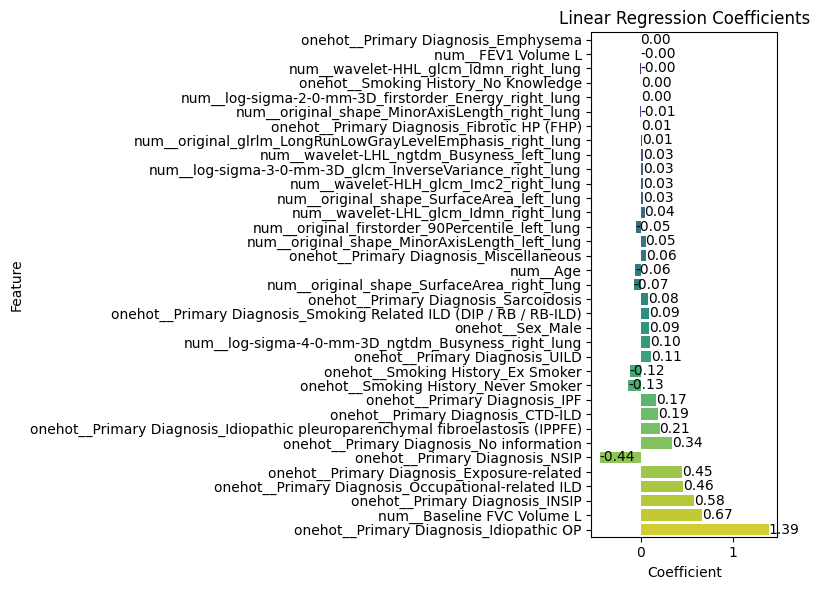

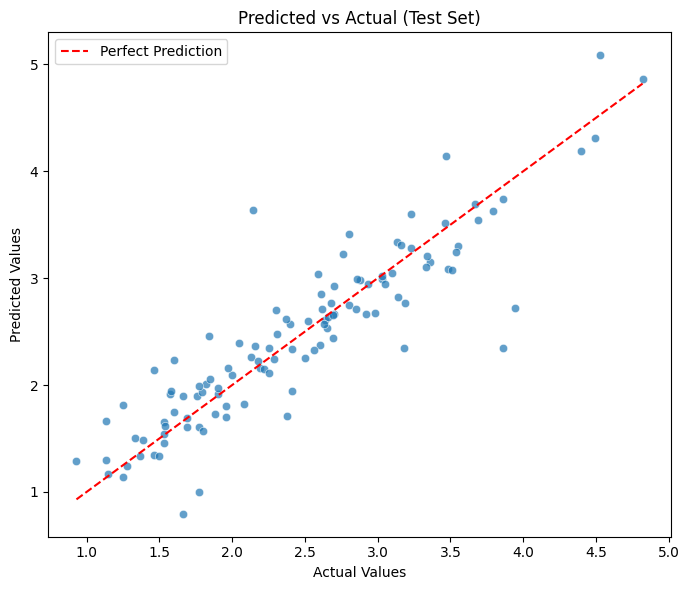

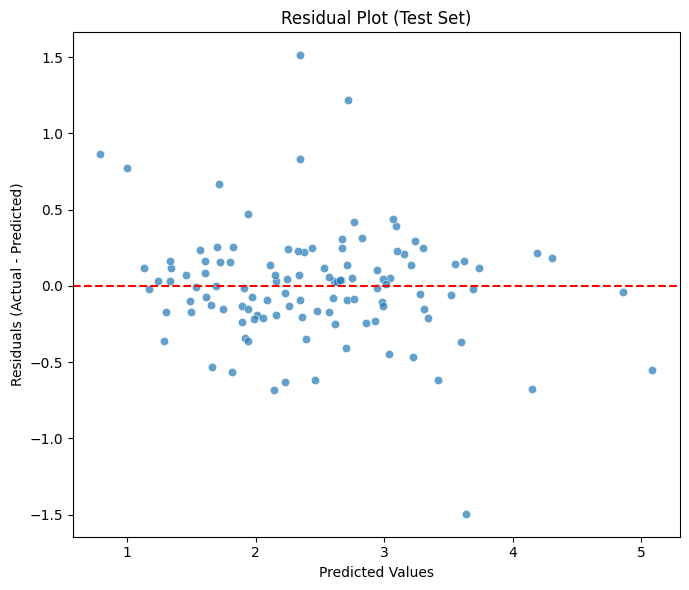

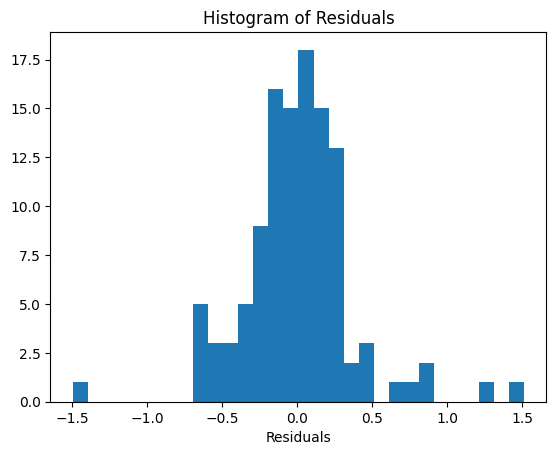

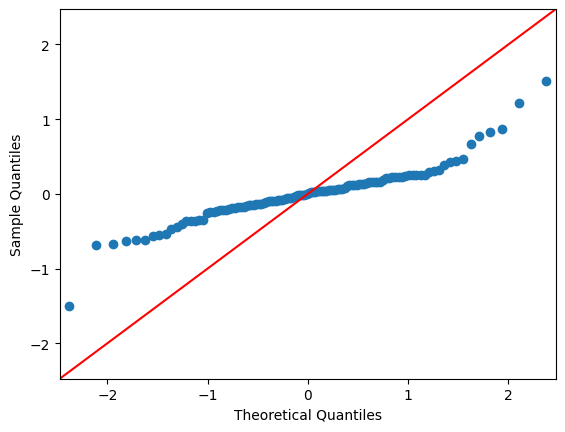


Top 5 patients with largest squared errors:
     Baseline_FVC  Target_FVC  Predicted_FVC  Squared_Error  \
132          2.36        3.86       2.346897       1.513103   
564          2.20        2.14       3.635365       1.495365   
451          2.50        3.94       2.718590       1.221410   
227          1.02        1.66       0.795133       0.864867   
70           2.26        3.18       2.348216       0.831784   

     Baseline_FVC_Week  Followup_FVC_Week  
132                0.0               56.0  
564                0.0               52.0  
451                0.0               48.0  
227                0.0               48.0  
70                 0.0               56.0  


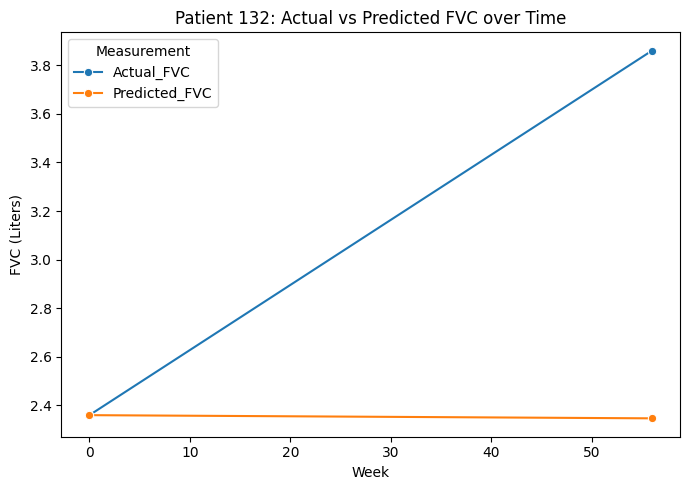

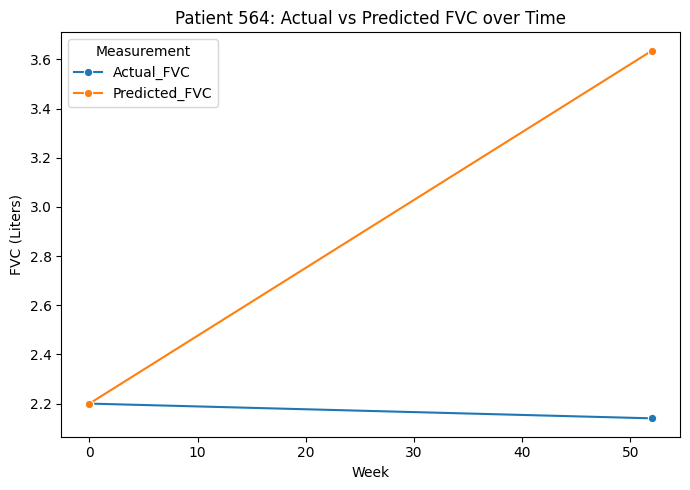

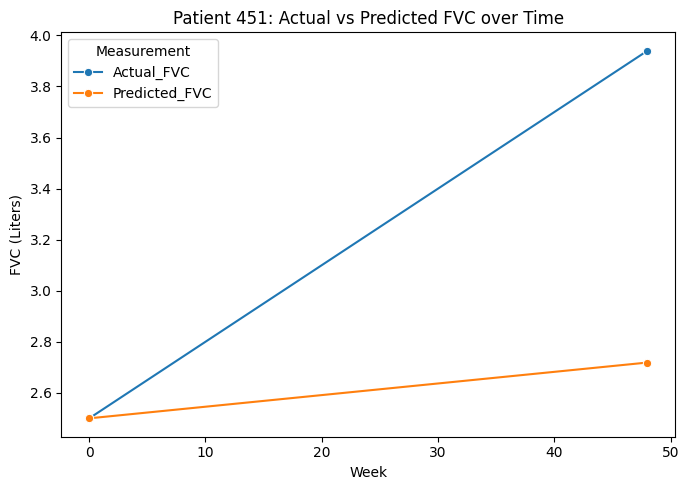

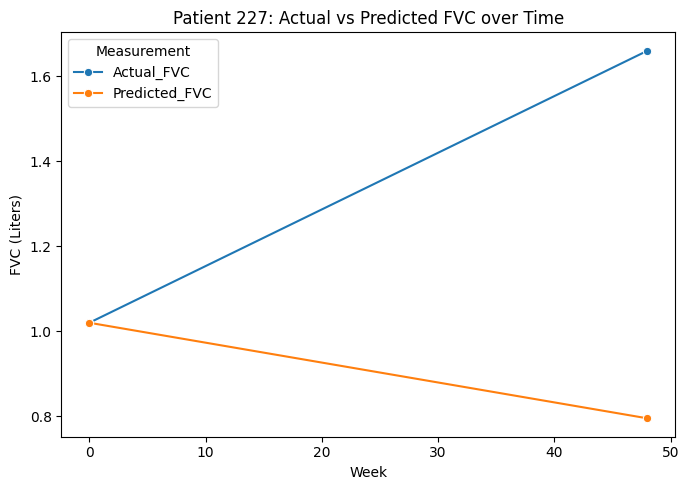

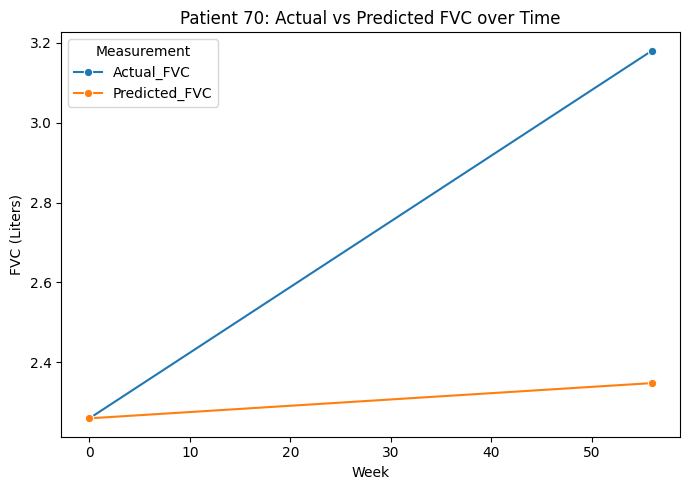

Top 5 patients with increasing FVC and lowest prediction error:
     Baseline_FVC  Target_FVC  Predicted_FVC  Abs_Error  Baseline_FVC_Week  \
457          1.69        1.90       1.911344   0.011344                0.0   
281          2.65        2.66       2.634887   0.025113                0.0   
148          0.97        1.28       1.245341   0.034659                0.0   
556          2.57        2.70       2.663637   0.036363                0.0   
192          2.15        2.18       2.228119   0.048119                0.0   

     Followup_FVC_Week  
457               48.0  
281               52.0  
148               55.0  
556               56.0  
192               54.0  


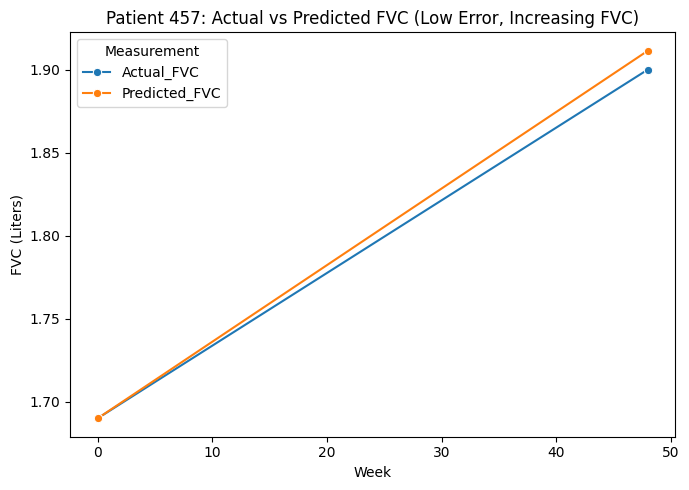

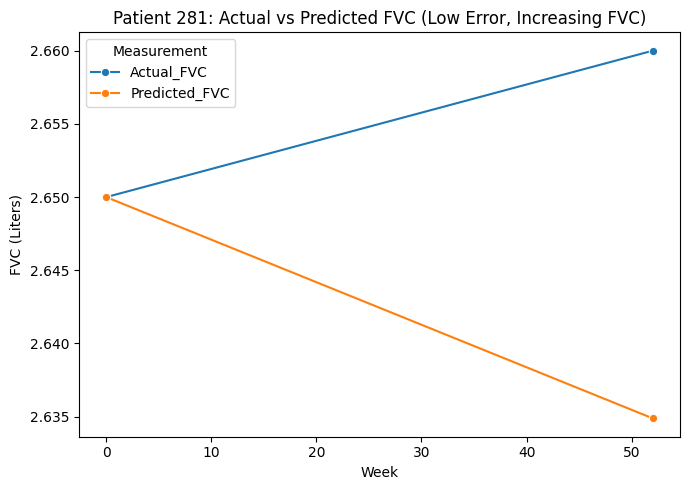

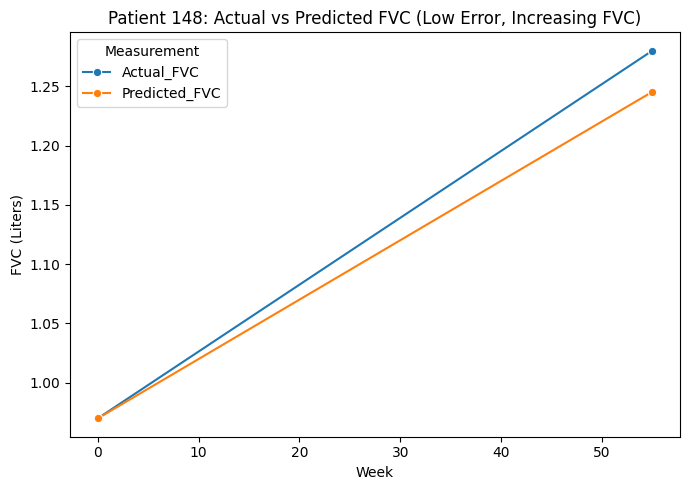

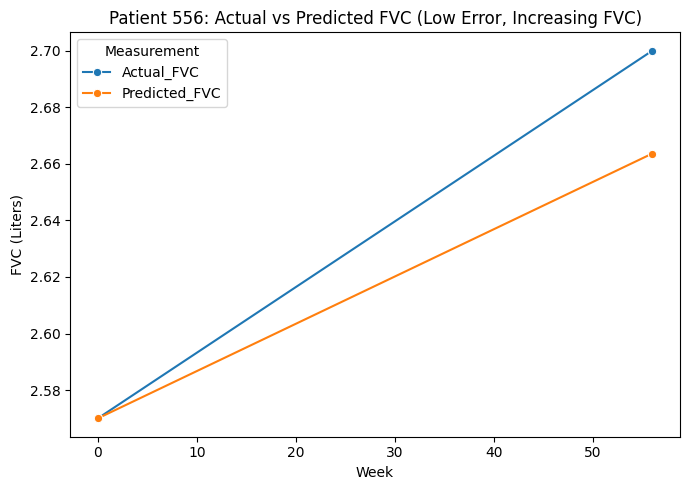

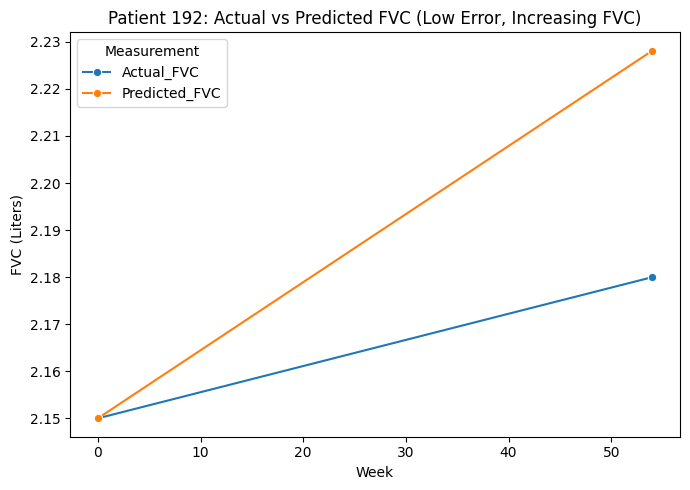

In [9]:
#tested
selected_features = ['wavelet-HLH_glcm_Imc2_right_lung', 'original_shape_MinorAxisLength_right_lung', 'original_shape_MinorAxisLength_left_lung', 'original_shape_SurfaceArea_left_lung', 'log-sigma-4-0-mm-3D_ngtdm_Busyness_right_lung', 'wavelet-HHL_glcm_Idmn_right_lung', 'log-sigma-2-0-mm-3D_firstorder_Energy_right_lung', 'wavelet-LHL_glcm_Idmn_right_lung', 'wavelet-LHL_ngtdm_Busyness_left_lung', 'original_glrlm_LongRunLowGrayLevelEmphasis_right_lung', 'original_shape_SurfaceArea_right_lung', 'original_firstorder_90Percentile_left_lung', 'log-sigma-3-0-mm-3D_glcm_InverseVariance_right_lung']
Clinical_Contineous_data_ext = selected_features + Clinical_Contineous_data
print(selected_features)
X_train, X_test, y_train, y_test = joblib.load("data_splits_without_nan.pkl")
X_train_clini_log = X_train.copy()
X_test_clini_log  = X_test.copy()

# Transform Age
for col in ['Age']:
    X_train_clini_log[col] = np.log(X_train_clini_log[col])
    X_test_clini_log[col] = np.log(X_test_clini_log[col])

# Median imputation (only needed if missing values exist)
imp_median = SimpleImputer(strategy='median')
imp_median.fit(X_train_clini_log)

X_train_median_filled = pd.DataFrame(
    imp_median.transform(X_train_clini_log),
    columns=X_train_clini_log.columns,
    index=X_train_clini_log.index
)

X_test_median_filled = pd.DataFrame(
    imp_median.transform(X_test_clini_log),
    columns=X_test_clini_log.columns,
    index=X_test_clini_log.index
)

# Run experiments
results1 = train_and_evaluate(X_train_median_filled, X_test_median_filled, y_train, y_test, selected_features, Clinical_Contineous_data_ext, Clinical_Categorical_data, model_name="/home/pansurya/OSIC_thesis/Linear_model/Correlation_based_Using_Target_FVC.pkl")
# print("Running LOOCV experiment...")
# results1 = train_and_evaluate_with_LOOCV(X_train, X_test, y_train, y_test, selected_features, model_name="/home/pansurya/OSIC_thesis/Linear_model/PAM_ANOVA_VIF_LOOCV.pkl")


In [45]:

# def with_full_features_train_and_evaluate(X_train, X_test, y_train, y_test, model_name="linear_regression_pipeline.pkl"):
#     """
#     Train and evaluate a linear regression pipeline on selected features.

#     Parameters
#     ----------
#     X_train, X_test : pd.DataFrame
#         Training and test feature sets.
#     y_train, y_test : pd.Series
#         Training and test targets.
#     feature_list : list
#         List of feature names to use.
#     model_name : str
#         Filename to save the trained pipeline.

#     Returns
#     -------
#     dict with CV results, test results, and coefficient DataFrame.
#     """

    

#     # Build pipeline
#     pipeline = Pipeline([
#         ("scaler", StandardScaler()),
#         ("lr", LinearRegression())
#     ])

#     # Cross-validation setup
#     kf = KFold(n_splits=10, shuffle=True, random_state=42)

#     rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)
#     mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

#     scoring = {
#         "MAE": "neg_mean_absolute_error",
#         "MSE": mse_scorer,
#         "RMSE": rmse_scorer,
#         "R2": "r2"
#     }

#     cv_results = cross_validate(pipeline, X_train, y_train, cv=kf, scoring=scoring)

#     print("\nCross-validation results:")
#     print(f"Average CV MAE:  {-cv_results['test_MAE'].mean():.2f}")
#     print(f"Average CV MSE:  {-cv_results['test_MSE'].mean():.2f}")
#     print(f"Average CV RMSE: {-cv_results['test_RMSE'].mean():.2f}")
#     print(f"Average CV R²:   {cv_results['test_R2'].mean():.3f}")

#     # Fit final model
#     pipeline.fit(X_train, y_train)

#     # Evaluate on test set
#     y_test_pred = pipeline.predict(X_test)

#     test_mae = np.mean(np.abs(y_test - y_test_pred))
#     test_mse = mean_squared_error(y_test, y_test_pred)
#     test_rmse = np.sqrt(test_mse)
#     test_r2 = pipeline.score(X_test, y_test)

#     print("\nTest set performance:")
#     print(f"- MAE:  {test_mae:.2f}")
#     print(f"- MSE:  {test_mse:.2f}")
#     print(f"- RMSE: {test_rmse:.2f}")
#     print(f"- R²:   {test_r2:.3f}")

#     # Predictions on training set
#     y_train_pred = pipeline.predict(X_train)

#     # Training metrics
#     train_mae = np.mean(np.abs(y_train - y_train_pred))
#     train_mse = mean_squared_error(y_train, y_train_pred)
#     train_rmse = np.sqrt(train_mse)
#     train_r2 = pipeline.score(X_train, y_train)

#     print("\nTraining set performance:")
#     print(f"- MAE:  {train_mae:.2f}")
#     print(f"- MSE:  {train_mse:.2f}")
#     print(f"- RMSE: {train_rmse:.2f}")
#     print(f"- R²:   {train_r2:.3f}")

#     # Save model
#     joblib.dump(pipeline, model_name)
#     # ---- Predicted vs Actual Plot ----
#     plt.figure(figsize=(7, 6))
#     sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)
#     plt.plot([y_test.min(), y_test.max()],
#              [y_test.min(), y_test.max()],
#              color="red", linestyle="--", label="Perfect Prediction")
#     plt.xlabel("Actual Values")
#     plt.ylabel("Predicted Values")
#     plt.title("Predicted vs Actual (Test Set)")
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

#     # ---- Residual Plot ----
#     residuals = y_test - y_test_pred
#     plt.figure(figsize=(7, 6))
#     sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.7)
#     plt.axhline(0, color="red", linestyle="--")
#     plt.xlabel("Predicted Values")
#     plt.ylabel("Residuals (Actual - Predicted)")
#     plt.title("Residual Plot (Test Set)")
#     plt.tight_layout()
#     plt.show()

#     return {
#         "cv_results": cv_results,
#         "test_results": {
#             "MAE": test_mae,
#             "MSE": test_mse,
#             "RMSE": test_rmse,
#             "R2": test_r2
#         },
        
#     }

# X_train, X_test, y_train, y_test = joblib.load("data_splits.pkl")

# # Run experiments
# results1 = with_full_features_train_and_evaluate(X_train, X_test, y_train, y_test, model_name="/home/pansurya/OSIC_thesis/Linear_model/With_full_features.pkl")

['wavelet-LLL_glszm_GrayLevelVariance_left_lung', 'original_shape_MinorAxisLength_left_lung', 'original_gldm_SmallDependenceHighGrayLevelEmphasis_right_lung', 'original_glszm_LargeAreaLowGrayLevelEmphasis_left_lung', 'log-sigma-3-0-mm-3D_glrlm_ShortRunEmphasis_left_lung', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'Baseline FVC Volume L', 'FEV1 Volume L', 'Age']
Completed fold 1
Completed fold 2
Completed fold 3
Completed fold 4
Completed fold 5
Completed fold 6
Completed fold 7
Completed fold 8
Completed fold 9
Completed fold 10
Completed fold 11
Completed fold 12
Completed fold 13
Completed fold 14
Completed fold 15
MAE: [0.28593319358273567, 0.26764762522705704, 0.22159201030751144, 0.2978316129304965, 0.2588260383312293, 0.2997820243843243, 0.2584717446545125, 0.2560867704516044, 0.22081867154607251, 0.28480550558898043, 0.23569349539591097, 0.26358956294556873, 0.2998581033363869, 0.28819198667370927, 0.2554091608587152]
MSE: [0.16164226080992716, 

/tmp/ipykernel_244044/4003571033.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


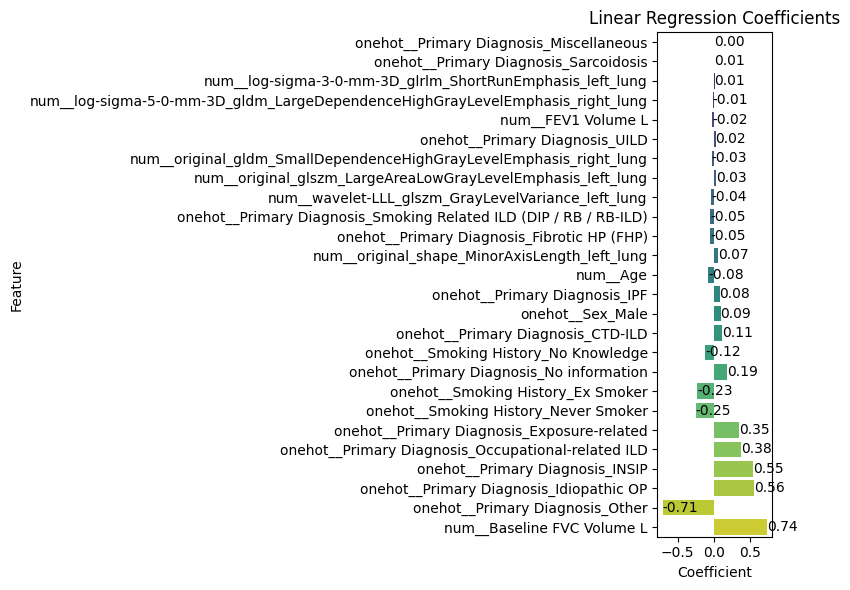

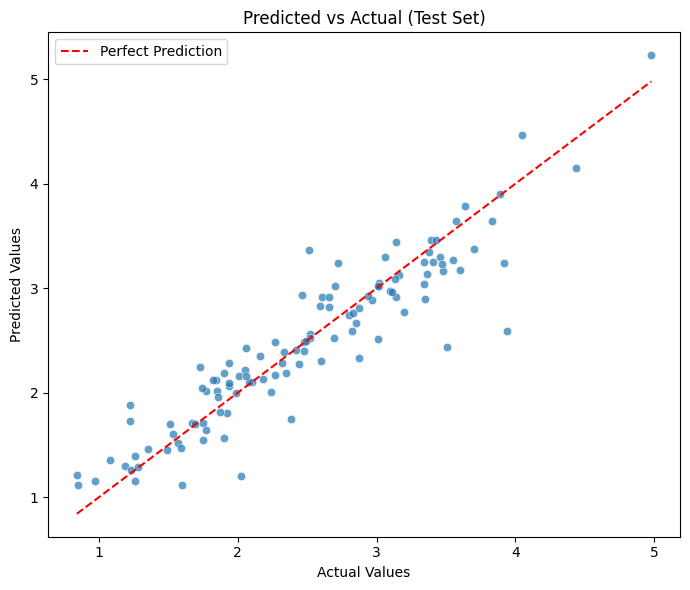

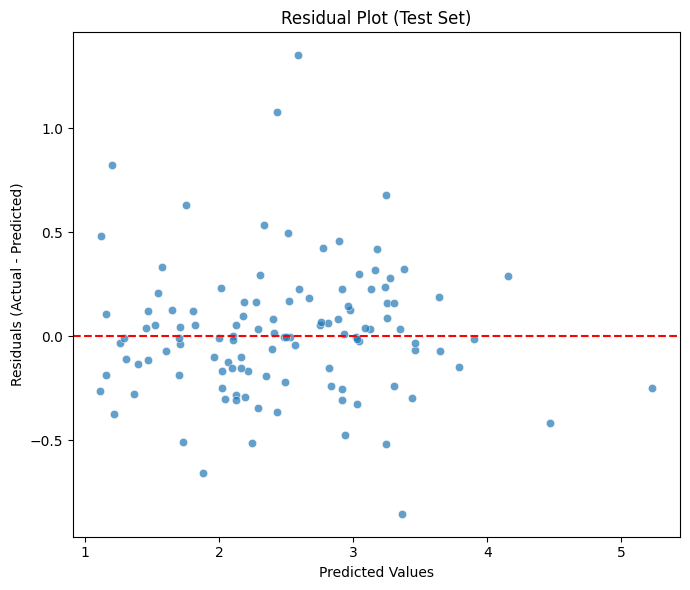

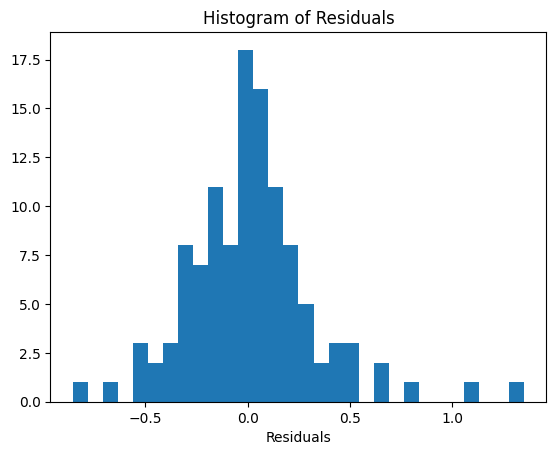

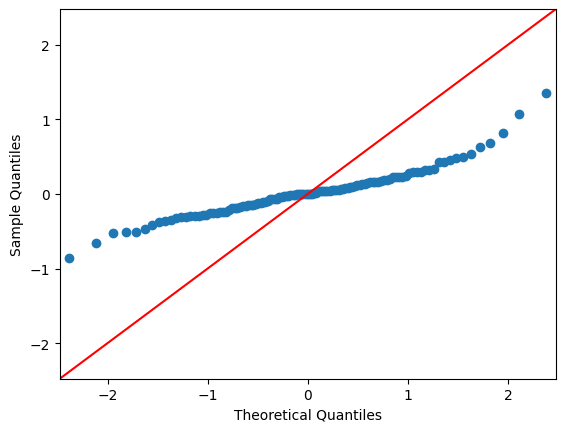


Top 5 patients with largest squared errors:
         Baseline_FVC  Target_FVC  Predicted_FVC  Squared_Error  \
1000934          2.50        3.94       2.589584       1.350416   
1002403          3.30        3.51       2.433429       1.076571   
545418           3.63        2.51       3.364139       0.854139   
558013           2.20        2.02       1.197177       0.822823   
1001223          3.46        3.92       3.241294       0.678706   

         Baseline_FVC_Week  Followup_FVC_Week  
1000934                0.0               52.0  
1002403                0.0               53.0  
545418                 0.0               53.0  
558013                 0.0               54.0  
1001223                0.0               48.0  


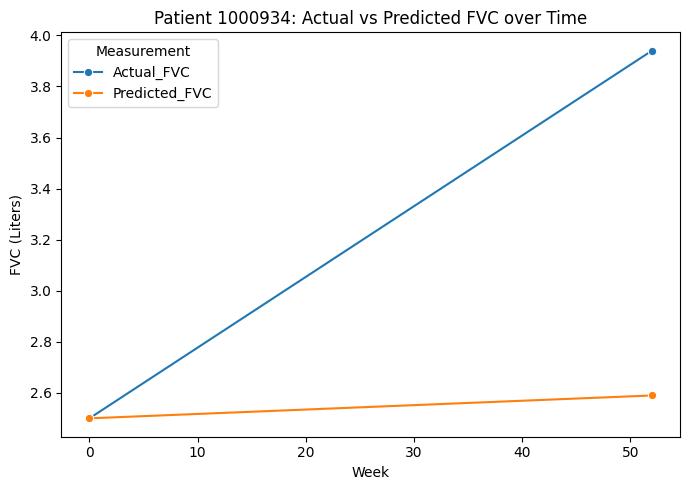

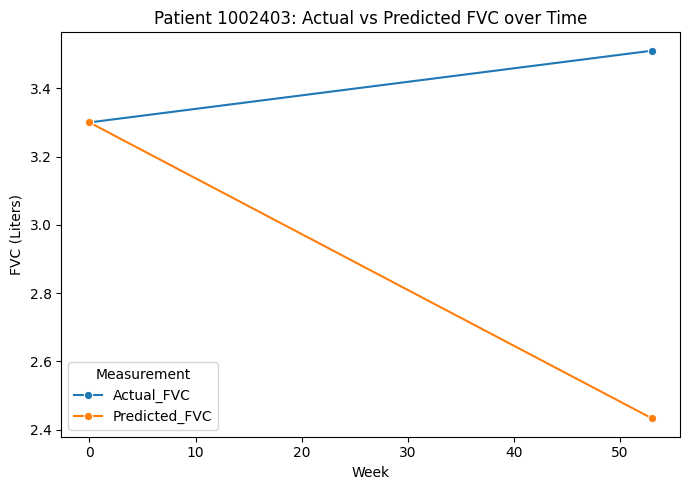

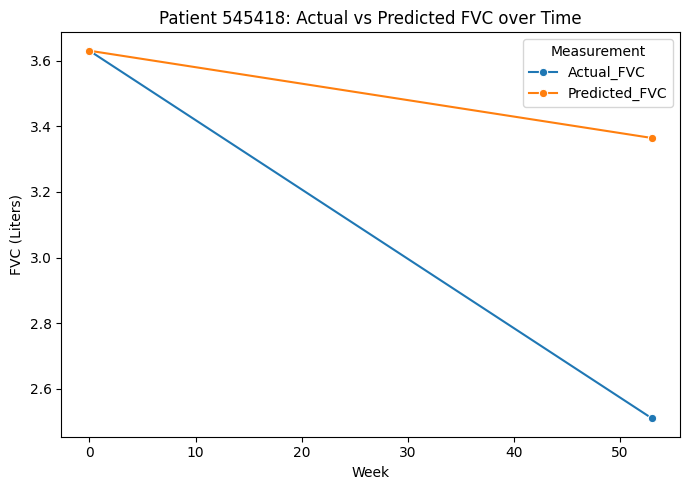

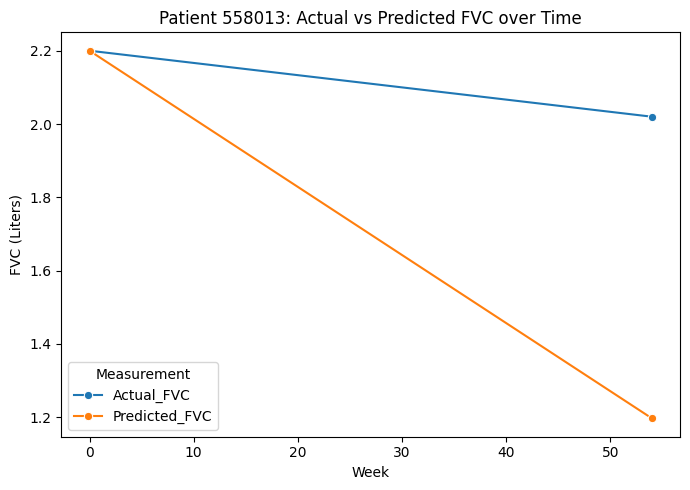

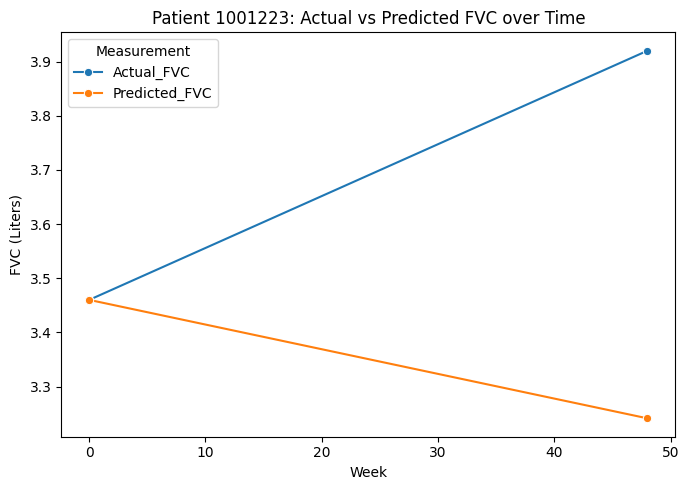

Top 5 patients with increasing FVC and lowest prediction error:
         Baseline_FVC  Target_FVC  Predicted_FVC  Abs_Error  \
142332           1.67        1.69       1.696704   0.006704   
661976           0.97        1.28       1.287108   0.007108   
447330           2.99        3.01       3.024204   0.014204   
1001370          2.32        2.42       2.404007   0.015993   
1000692          2.77        3.02       3.045283   0.025283   

         Baseline_FVC_Week  Followup_FVC_Week  
142332                 0.0               50.0  
661976                 0.0               55.0  
447330                 0.0               55.0  
1001370                0.0               49.0  
1000692                0.0               56.0  


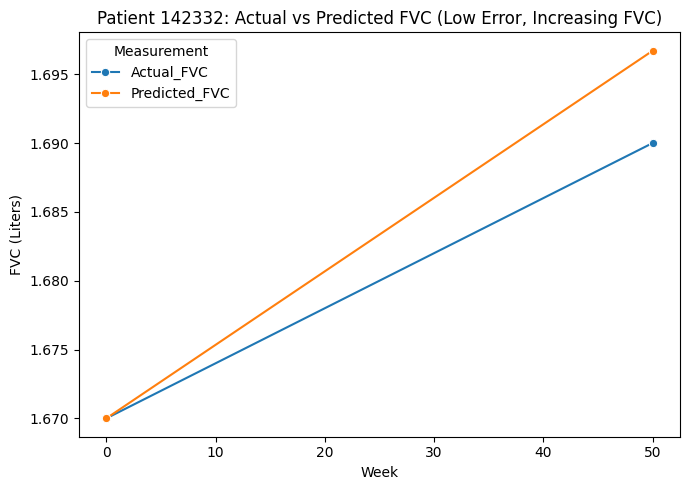

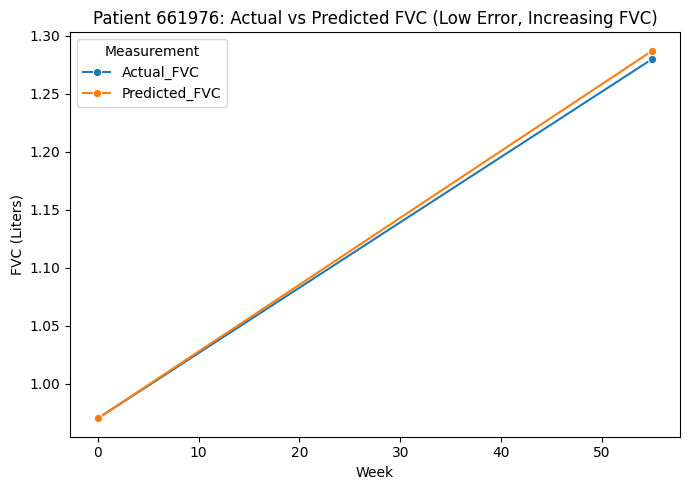

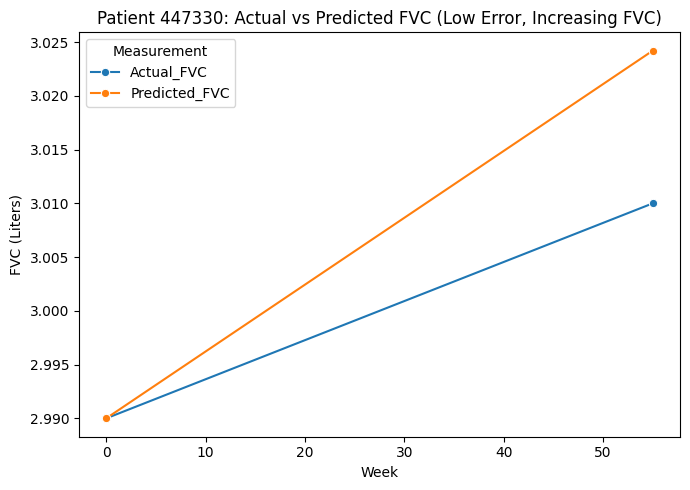

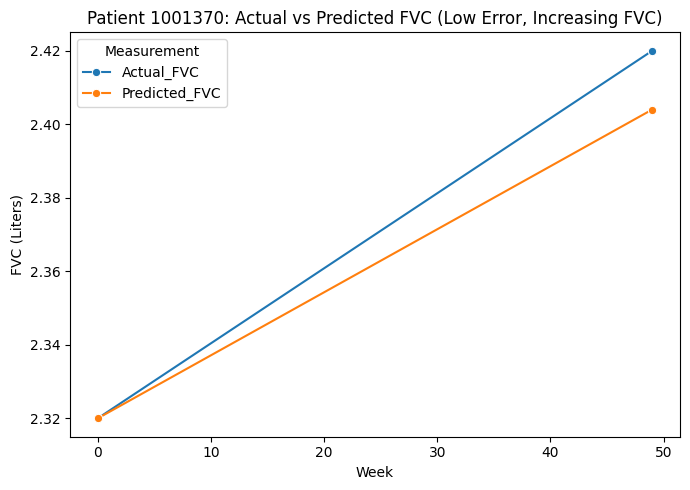

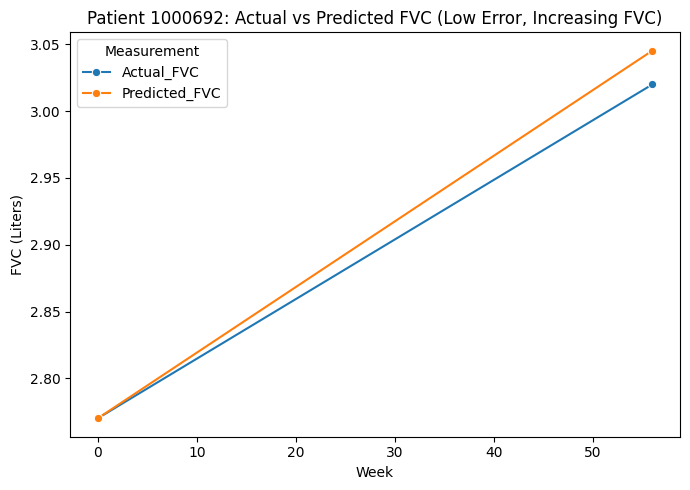

In [13]:
selected_features = ['wavelet-LLL_glszm_GrayLevelVariance_left_lung', 'original_shape_MinorAxisLength_left_lung', 'original_gldm_SmallDependenceHighGrayLevelEmphasis_right_lung', 'original_glszm_LargeAreaLowGrayLevelEmphasis_left_lung', 'log-sigma-3-0-mm-3D_glrlm_ShortRunEmphasis_left_lung', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung']

Clinical_Contineous_data_ext = selected_features + Clinical_Contineous_data
print(Clinical_Contineous_data_ext)
X_train, X_test, y_train, y_test = joblib.load("/home/pansurya/OSIC_thesis/radiomics_files/data_splits_with_clinical_harmonization.pkl")
X_train_clini_log = X_train.copy()
X_test_clini_log  = X_test.copy()

# Transform Age
for col in ['Age']:
    X_train_clini_log[col] = np.log(X_train_clini_log[col])
    X_test_clini_log[col] = np.log(X_test_clini_log[col])

# Median imputation (only needed if missing values exist)
imp_median = SimpleImputer(strategy='median')
imp_median.fit(X_train_clini_log)

X_train_median_filled = pd.DataFrame(
    imp_median.transform(X_train_clini_log),
    columns=X_train_clini_log.columns,
    index=X_train_clini_log.index
)

X_test_median_filled = pd.DataFrame(
    imp_median.transform(X_test_clini_log),
    columns=X_test_clini_log.columns,
    index=X_test_clini_log.index
)


# Run experiments
results1 = train_and_evaluate(X_train_median_filled, X_test_median_filled, y_train, y_test, selected_features, Clinical_Contineous_data_ext, Clinical_Categorical_data, model_name="/home/pansurya/OSIC_thesis/Linear_model/PAM_mrmr_VIF_with_harmonizationPycombat.pkl")

['original_firstorder_Kurtosis_right_lung', 'log-sigma-4-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_left_lung', 'wavelet-LHL_glrlm_GrayLevelNonUniformity_right_lung', 'wavelet-LLL_glrlm_RunLengthNonUniformity_right_lung', 'log-sigma-2-0-mm-3D_ngtdm_Busyness_left_lung', 'log-sigma-1-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_right_lung', 'wavelet-HHL_glrlm_GrayLevelNonUniformity_right_lung', 'log-sigma-3-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'log-sigma-1-0-mm-3D_glrlm_GrayLevelNonUniformity_left_lung', 'original_firstorder_MeanAbsoluteDeviation_right_lung', 'wavelet-LHL_glrlm_GrayLevelNonUniformity_left_lung', 'log-sigma-4-0-mm-3D_glszm_GrayLevelNonUniformity_right_lung', 'log-sigma-2-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_left_lung', 'original_glrlm_GrayLevelNonUniformity_right_lung', 'original_firstorder_90Percentile_right_lung', 'log-sigma-5-0-mm-3D_firstorder_Energy_left_lung', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung

/tmp/ipykernel_244044/4003571033.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


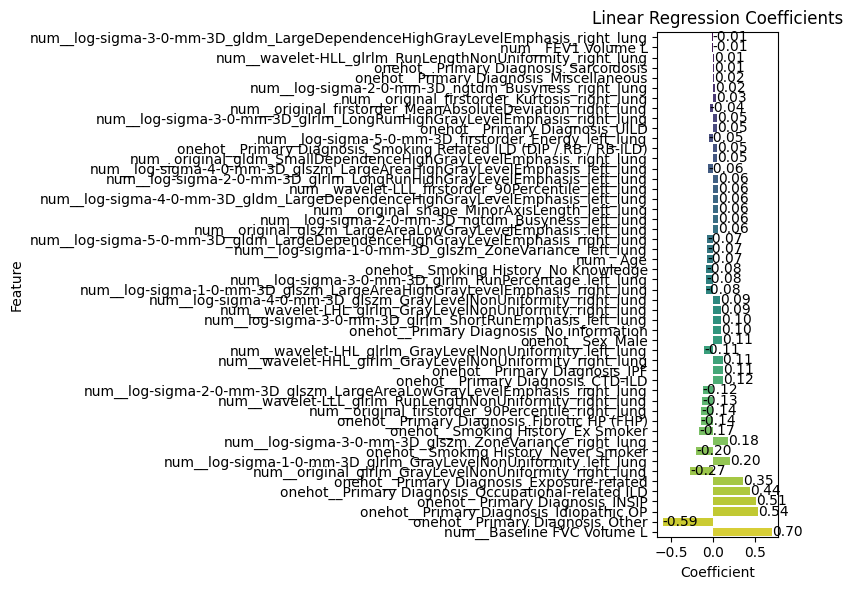

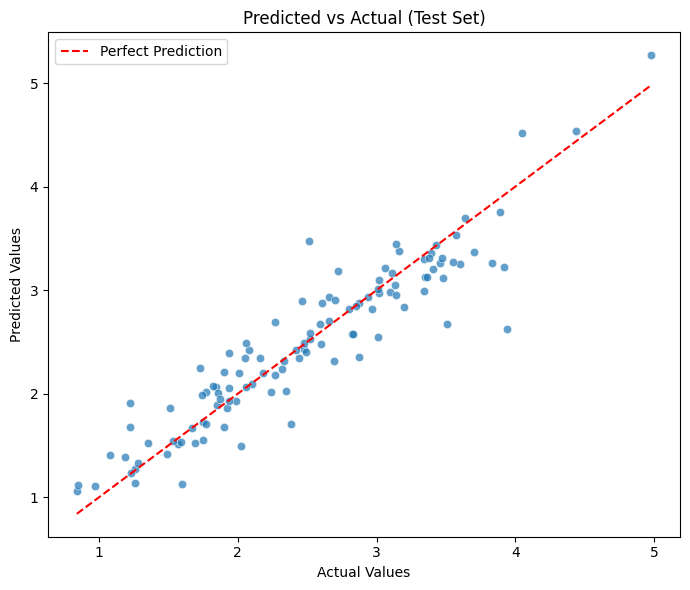

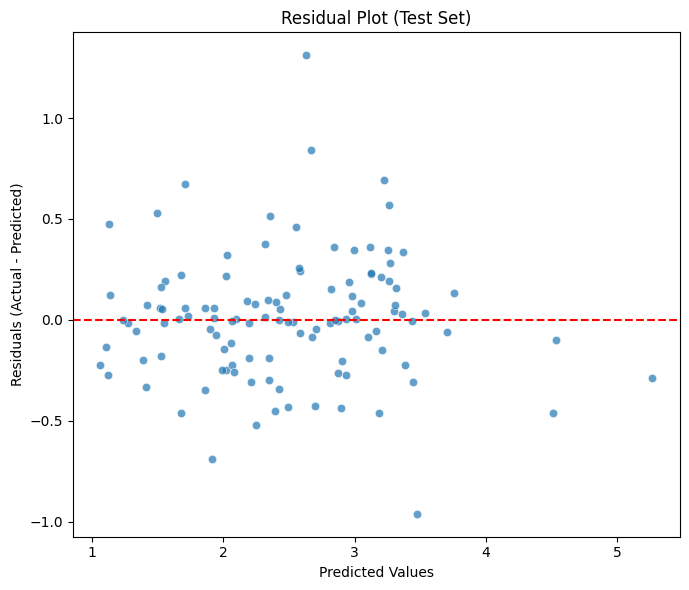

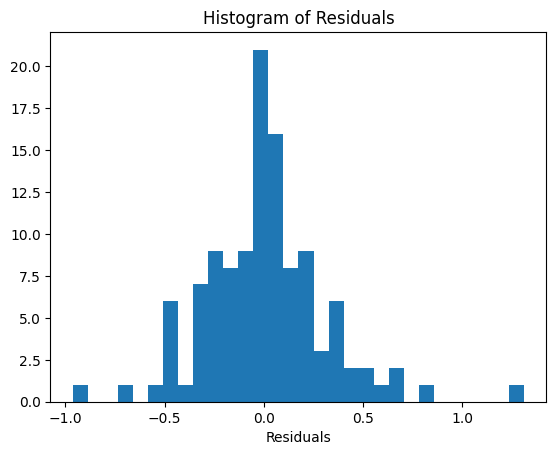

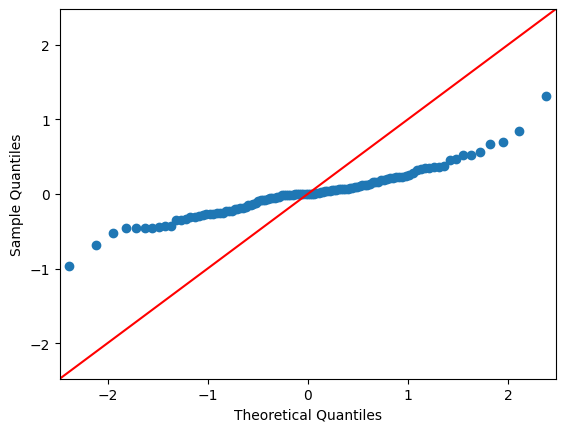


Top 5 patients with largest squared errors:
         Baseline_FVC  Target_FVC  Predicted_FVC  Squared_Error  \
1000934          2.50        3.94       2.628684       1.311316   
545418           3.63        2.51       3.471179       0.961179   
1002403          3.30        3.51       2.668894       0.841106   
1001223          3.46        3.92       3.226952       0.693048   
1001175          1.98        1.22       1.910283       0.690283   

         Baseline_FVC_Week  Followup_FVC_Week  
1000934                0.0               52.0  
545418                 0.0               53.0  
1002403                0.0               53.0  
1001223                0.0               48.0  
1001175                0.0               54.0  


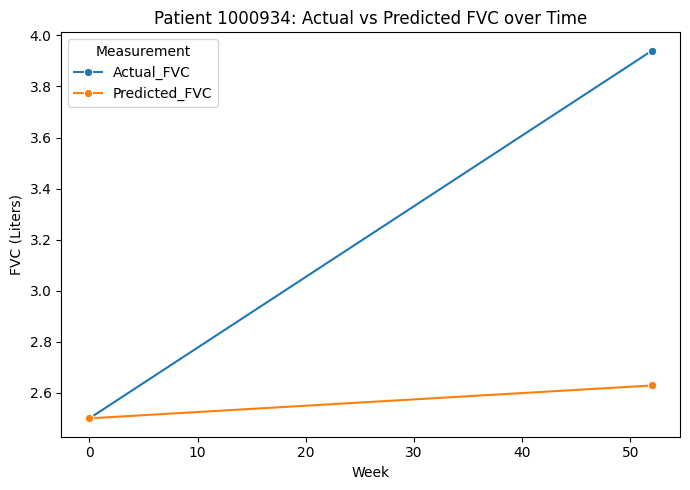

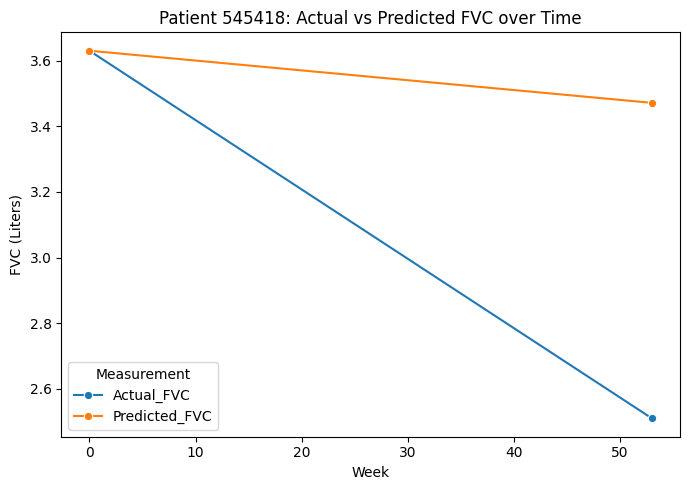

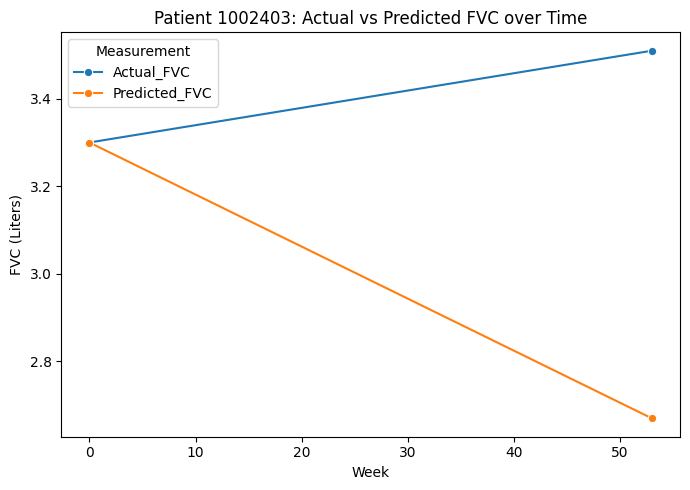

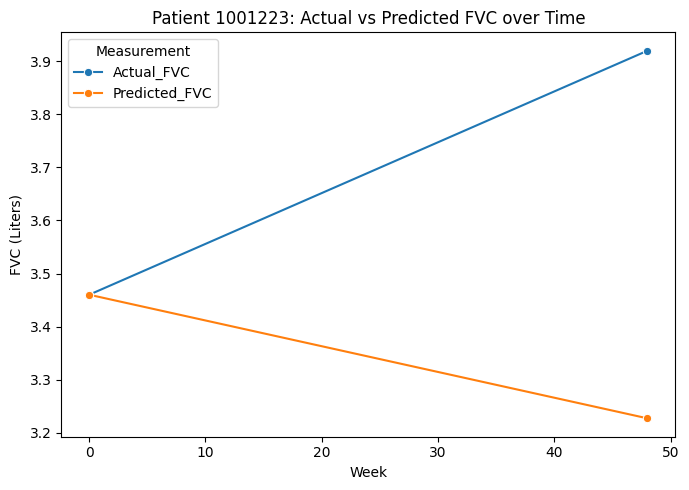

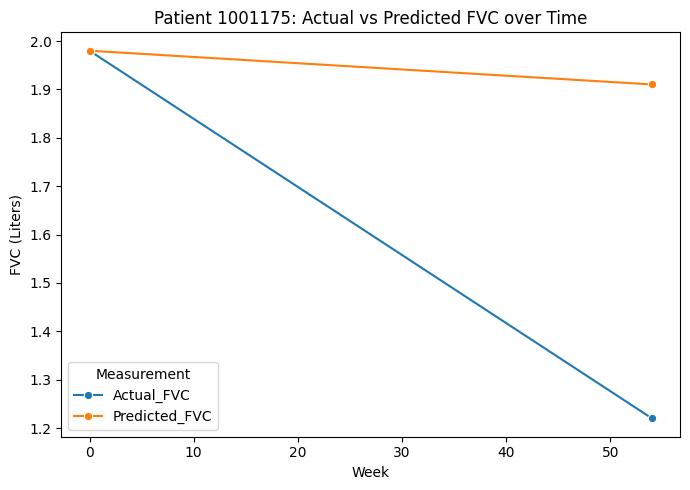

Top 5 patients with increasing FVC and lowest prediction error:
         Baseline_FVC  Target_FVC  Predicted_FVC  Abs_Error  \
241232           2.79        2.85       2.850061   0.000061   
447330           2.99        3.01       3.008079   0.001921   
1001370          2.32        2.42       2.422270   0.002270   
1000971          1.21        1.23       1.232325   0.002325   
788550           2.15        2.18       2.196499   0.016499   

         Baseline_FVC_Week  Followup_FVC_Week  
241232                 0.0               49.0  
447330                 0.0               55.0  
1001370                0.0               49.0  
1000971                0.0               48.0  
788550                 0.0               54.0  


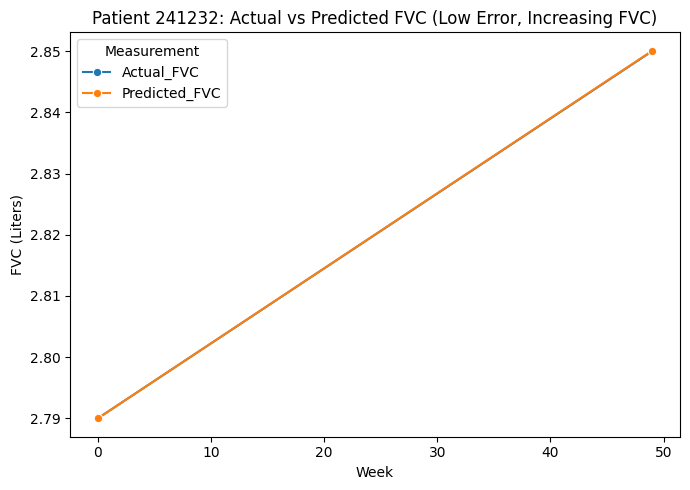

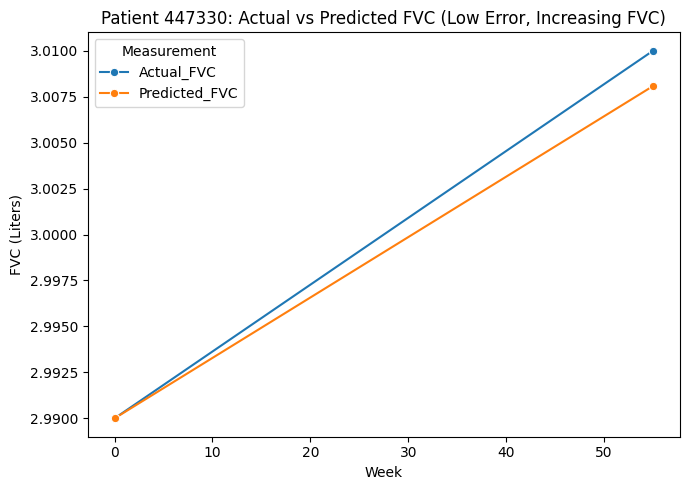

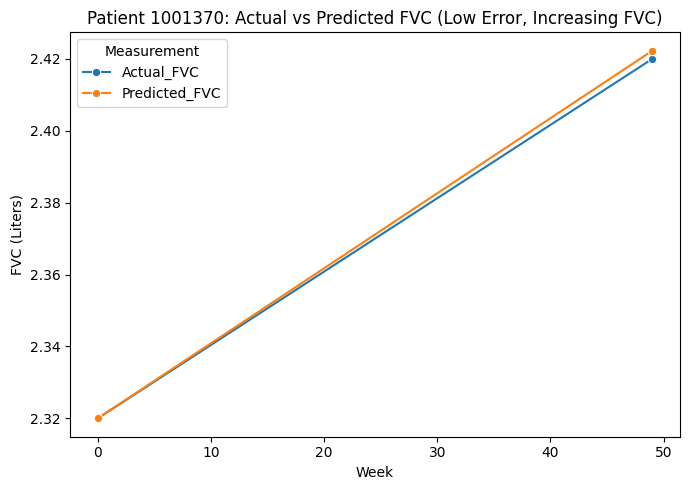

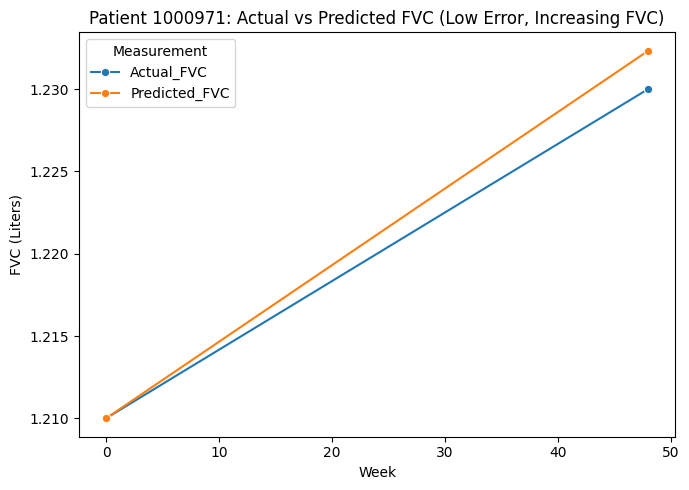

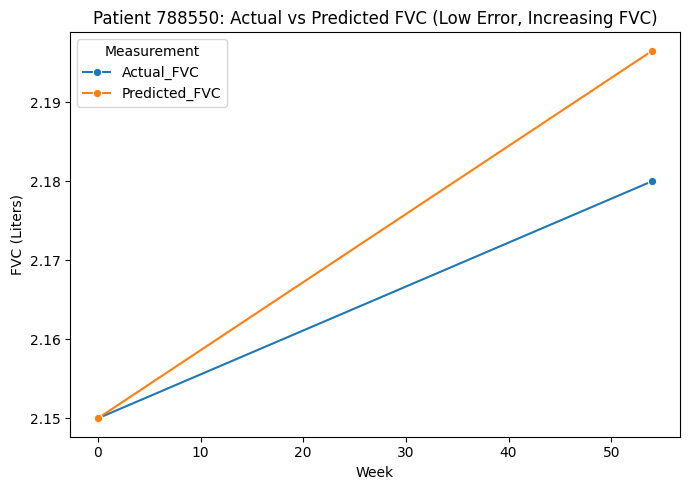

In [14]:
#tested, not good method
selected_features = ['original_firstorder_Kurtosis_right_lung',
       'log-sigma-4-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_left_lung',
       'wavelet-LHL_glrlm_GrayLevelNonUniformity_right_lung',
       'wavelet-LLL_glrlm_RunLengthNonUniformity_right_lung',
       'log-sigma-2-0-mm-3D_ngtdm_Busyness_left_lung',
       'log-sigma-1-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis_right_lung',
       'wavelet-HHL_glrlm_GrayLevelNonUniformity_right_lung',
       'log-sigma-3-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung',
       'log-sigma-1-0-mm-3D_glrlm_GrayLevelNonUniformity_left_lung',
       'original_firstorder_MeanAbsoluteDeviation_right_lung',
       'wavelet-LHL_glrlm_GrayLevelNonUniformity_left_lung',
       'log-sigma-4-0-mm-3D_glszm_GrayLevelNonUniformity_right_lung',
       'log-sigma-2-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_left_lung',
       'original_glrlm_GrayLevelNonUniformity_right_lung',
       'original_firstorder_90Percentile_right_lung',
       'log-sigma-5-0-mm-3D_firstorder_Energy_left_lung',
       'log-sigma-5-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung',
       'log-sigma-2-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_right_lung',
       'log-sigma-3-0-mm-3D_glrlm_RunPercentage_left_lung',
       'wavelet-LLL_firstorder_90Percentile_left_lung',
       'wavelet-HLL_glrlm_RunLengthNonUniformity_right_lung',
       'log-sigma-1-0-mm-3D_glszm_ZoneVariance_left_lung',
       'original_shape_MinorAxisLength_left_lung',
       'log-sigma-2-0-mm-3D_ngtdm_Busyness_right_lung',
       'log-sigma-3-0-mm-3D_glrlm_ShortRunEmphasis_left_lung',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis_right_lung',
       'original_glszm_LargeAreaLowGrayLevelEmphasis_left_lung',
       'log-sigma-4-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_left_lung',
       'log-sigma-3-0-mm-3D_glszm_ZoneVariance_right_lung',
       'log-sigma-3-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_right_lung']
Clinical_Contineous_data_ext = selected_features + Clinical_Contineous_data
print(Clinical_Contineous_data_ext)
X_train, X_test, y_train, y_test = joblib.load("/home/pansurya/OSIC_thesis/radiomics_files/data_splits_with_clinical_harmonization.pkl")
X_train_clini_log = X_train.copy()
X_test_clini_log  = X_test.copy()

# Transform Age
for col in ['Age']:
    X_train_clini_log[col] = np.log(X_train_clini_log[col])
    X_test_clini_log[col] = np.log(X_test_clini_log[col])

# Median imputation (only needed if missing values exist)
imp_median = SimpleImputer(strategy='median')
imp_median.fit(X_train_clini_log)

X_train_median_filled = pd.DataFrame(
    imp_median.transform(X_train_clini_log),
    columns=X_train_clini_log.columns,
    index=X_train_clini_log.index
)

X_test_median_filled = pd.DataFrame(
    imp_median.transform(X_test_clini_log),
    columns=X_test_clini_log.columns,
    index=X_test_clini_log.index
)

# Run experiments
results1 = train_and_evaluate(X_train_median_filled, X_test_median_filled, y_train, y_test, selected_features, Clinical_Contineous_data_ext, Clinical_Categorical_data, model_name="/home/pansurya/OSIC_thesis/Linear_model/PAM_ANOVA_VIF_with_harmonizationPycombat.pkl")


['original_shape_MinorAxisLength_right_lung', 'original_shape_SurfaceArea_left_lung', 'wavelet-LLL_ngtdm_Contrast_right_lung', 'original_glszm_LargeAreaLowGrayLevelEmphasis_right_lung', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_right_lung', 'wavelet-HLL_firstorder_Skewness_right_lung', 'wavelet-HHL_glszm_LargeAreaHighGrayLevelEmphasis_right_lung', 'original_shape_MinorAxisLength_left_lung', 'log-sigma-1-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_left_lung', 'log-sigma-3-0-mm-3D_glrlm_ShortRunEmphasis_left_lung', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_left_lung', 'Baseline FVC Volume L', 'FEV1 Volume L', 'Age']
Completed fold 1
Completed fold 2
Completed fold 3
Completed fold 4
Completed fold 5
Completed fold 6
Completed fold 7
Completed fold 8
Completed fold 9
Completed fold 10
Completed fold 11
Completed fold 12
Completed fold 13
Completed fold 14
Completed fold 15
MAE: [0.2884059994693833, 0.28602394696570077, 0.2161558388110741, 0.297189905917

/tmp/ipykernel_244044/4003571033.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


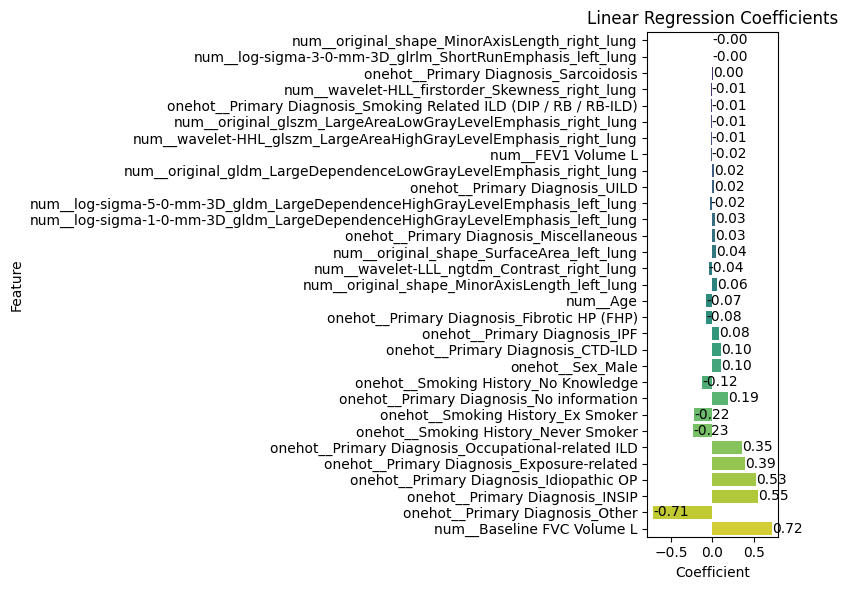

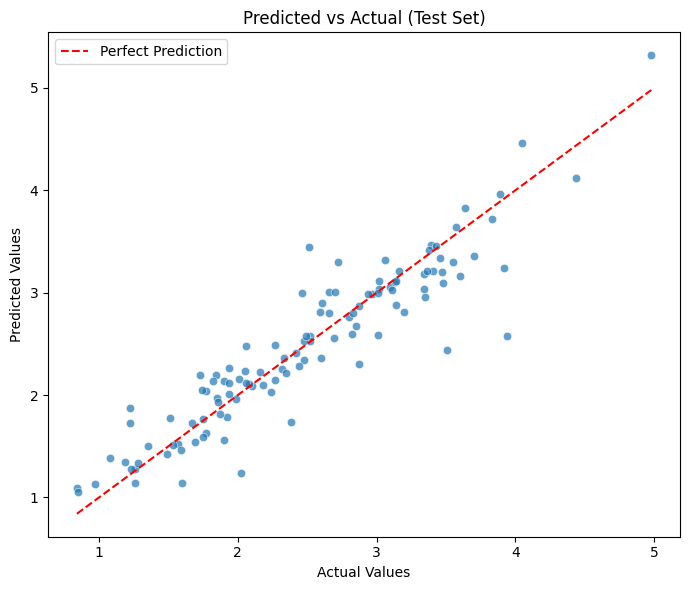

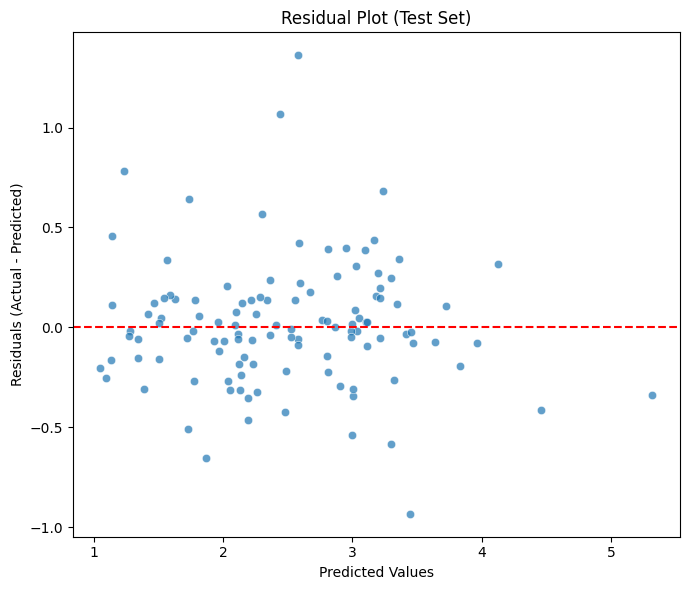

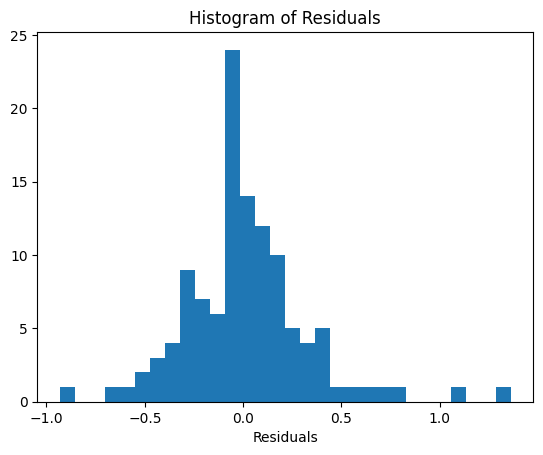

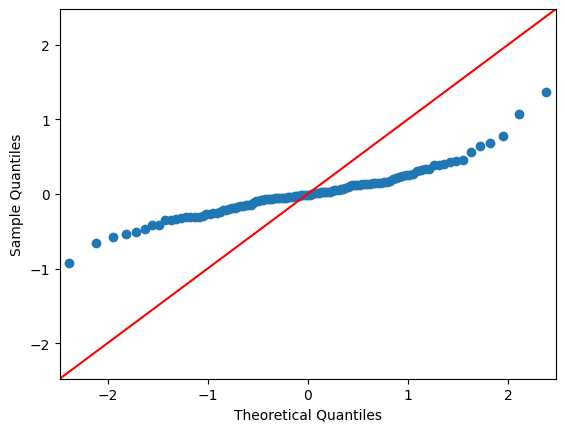


Top 5 patients with largest squared errors:
         Baseline_FVC  Target_FVC  Predicted_FVC  Squared_Error  \
1000934          2.50        3.94       2.578649       1.361351   
1002403          3.30        3.51       2.442229       1.067771   
545418           3.63        2.51       3.441841       0.931841   
558013           2.20        2.02       1.238054       0.781946   
1001223          3.46        3.92       3.237069       0.682931   

         Baseline_FVC_Week  Followup_FVC_Week  
1000934                0.0               52.0  
1002403                0.0               53.0  
545418                 0.0               53.0  
558013                 0.0               54.0  
1001223                0.0               48.0  


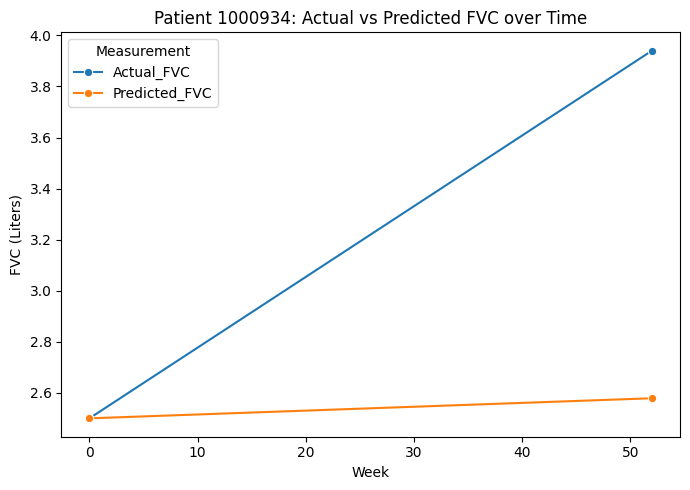

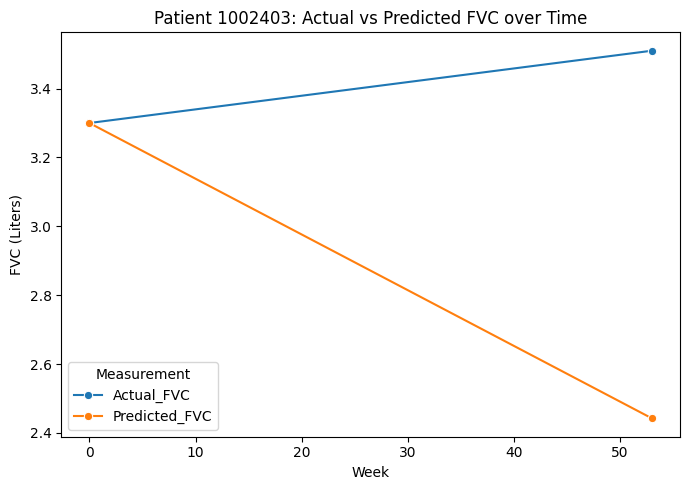

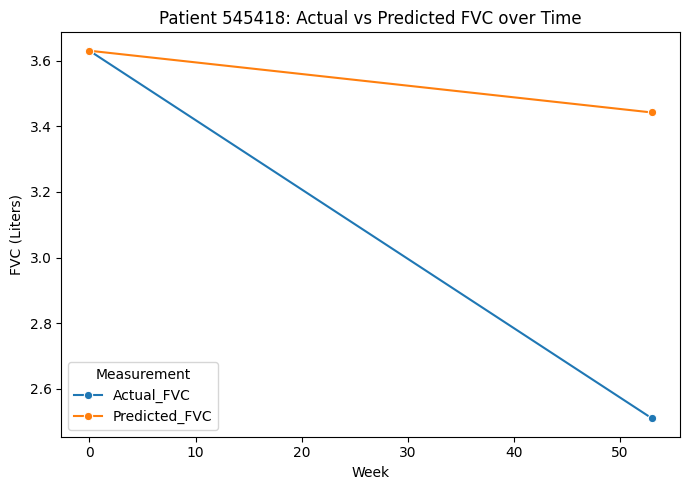

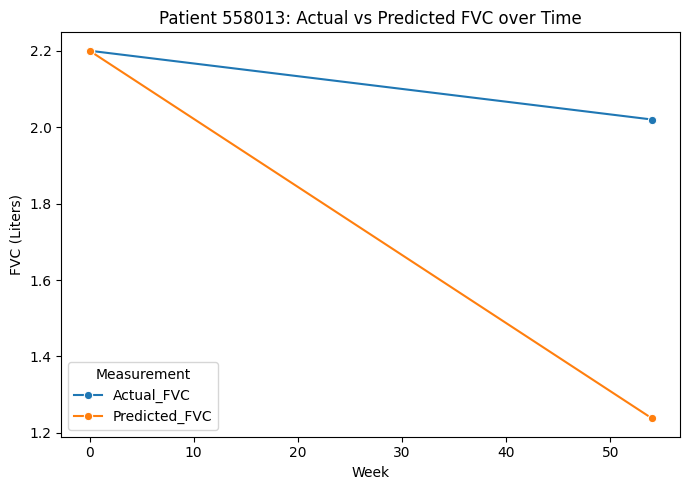

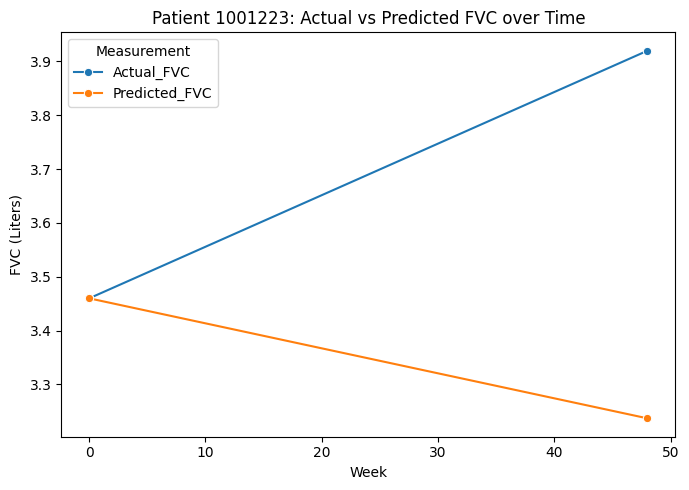

Top 5 patients with increasing FVC and lowest prediction error:
         Baseline_FVC  Target_FVC  Predicted_FVC  Abs_Error  \
1001370          2.32        2.42       2.408050   0.011950   
1000649          2.92        2.97       2.985645   0.015645   
447330           2.99        3.01       2.993341   0.016659   
1000616          1.73        1.75       1.769341   0.019341   
1001031          3.02        3.14       3.110519   0.029481   

         Baseline_FVC_Week  Followup_FVC_Week  
1001370                0.0               49.0  
1000649                0.0               48.0  
447330                 0.0               55.0  
1000616                0.0               48.0  
1001031                0.0               48.0  


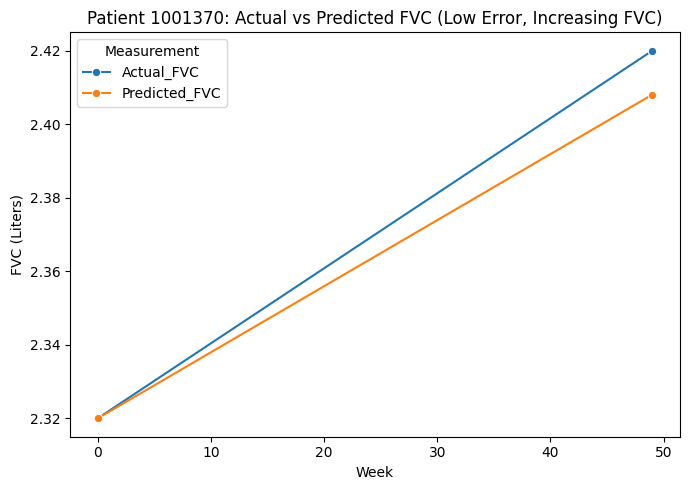

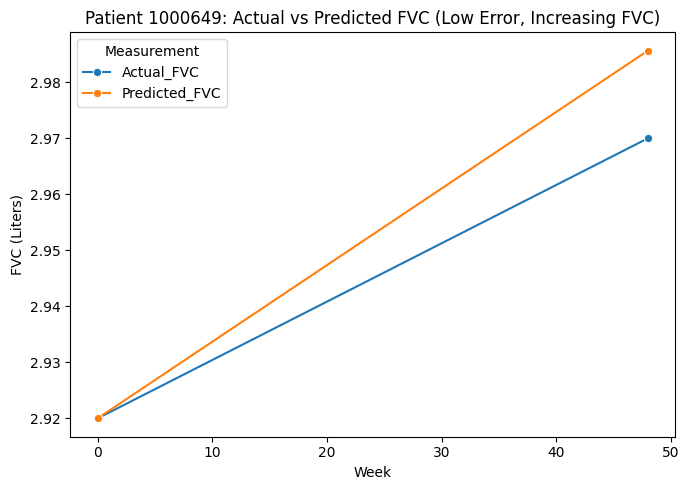

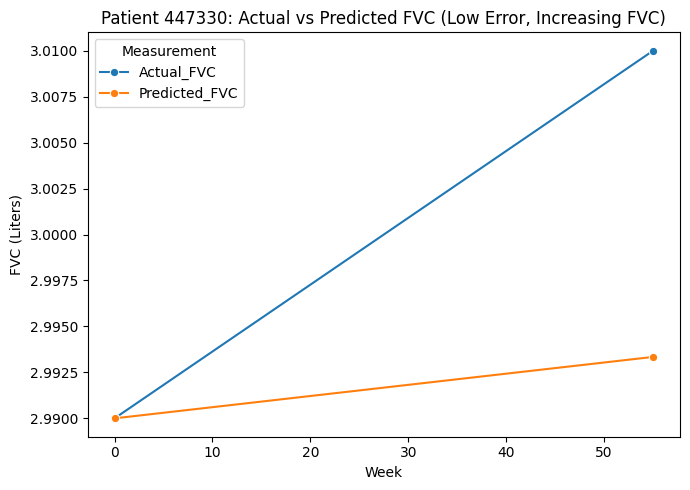

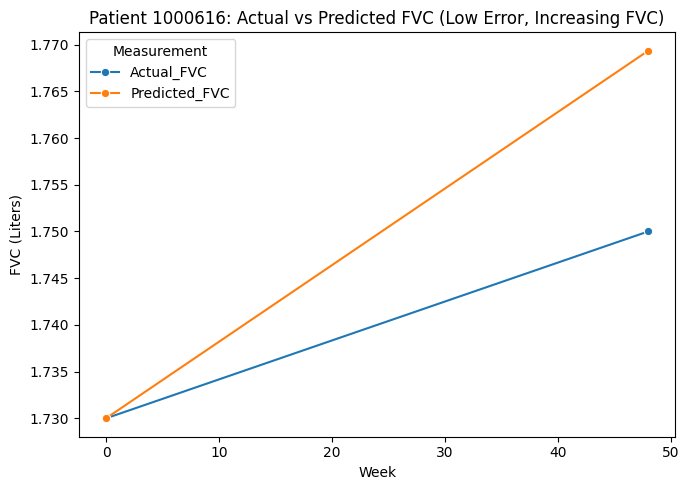

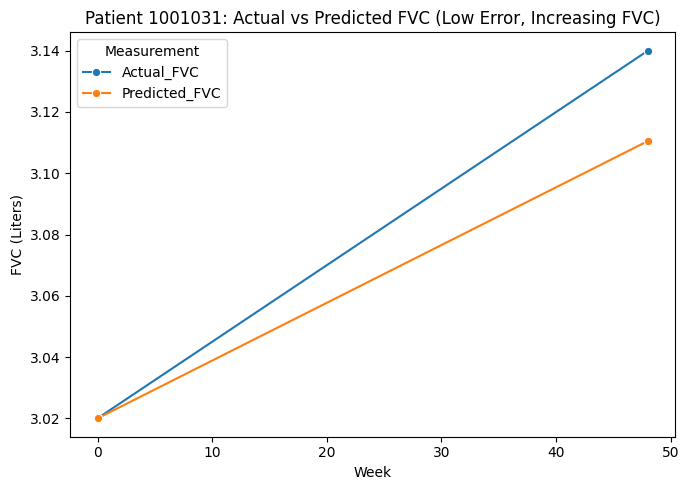

In [15]:
#tested
selected_features = ['original_shape_MinorAxisLength_right_lung', 'original_shape_SurfaceArea_left_lung', 'wavelet-LLL_ngtdm_Contrast_right_lung', 'original_glszm_LargeAreaLowGrayLevelEmphasis_right_lung', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_right_lung', 'wavelet-HLL_firstorder_Skewness_right_lung', 'wavelet-HHL_glszm_LargeAreaHighGrayLevelEmphasis_right_lung', 'original_shape_MinorAxisLength_left_lung', 'log-sigma-1-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_left_lung', 'log-sigma-3-0-mm-3D_glrlm_ShortRunEmphasis_left_lung', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_left_lung']
Clinical_Contineous_data_ext = selected_features + Clinical_Contineous_data
print(Clinical_Contineous_data_ext)
X_train, X_test, y_train, y_test = joblib.load("/home/pansurya/OSIC_thesis/radiomics_files/data_splits_with_clinical_harmonization.pkl")
X_train_clini_log = X_train.copy()
X_test_clini_log  = X_test.copy()

# Transform Age
for col in ['Age']:
    X_train_clini_log[col] = np.log(X_train_clini_log[col])
    X_test_clini_log[col] = np.log(X_test_clini_log[col])

# Median imputation (only needed if missing values exist)
imp_median = SimpleImputer(strategy='median')
imp_median.fit(X_train_clini_log)

X_train_median_filled = pd.DataFrame(
    imp_median.transform(X_train_clini_log),
    columns=X_train_clini_log.columns,
    index=X_train_clini_log.index
)

X_test_median_filled = pd.DataFrame(
    imp_median.transform(X_test_clini_log),
    columns=X_test_clini_log.columns,
    index=X_test_clini_log.index
)

# Run experiments
results1 = train_and_evaluate(X_train_median_filled, X_test_median_filled, y_train, y_test, selected_features, Clinical_Contineous_data_ext, Clinical_Categorical_data, model_name="/home/pansurya/OSIC_thesis/Linear_model/Hierarchical_ANOVA_VIF_with_harmonizationPycombat.pkl")



['original_shape_MinorAxisLength_left_lung', 'wavelet-HHH_glcm_MCC_right_lung', 'wavelet-LLL_glszm_GrayLevelVariance_left_lung', 'original_shape_MinorAxisLength_right_lung', 'wavelet-LHL_glrlm_GrayLevelNonUniformity_right_lung', 'log-sigma-1-0-mm-3D_gldm_GrayLevelNonUniformity_left_lung', 'log-sigma-3-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_right_lung', 'log-sigma-2-0-mm-3D_ngtdm_Busyness_right_lung', 'log-sigma-2-0-mm-3D_ngtdm_Busyness_left_lung', 'original_firstorder_90Percentile_right_lung', 'log-sigma-3-0-mm-3D_glszm_ZoneVariance_right_lung', 'original_shape_SurfaceArea_left_lung', 'wavelet-HHL_glrlm_GrayLevelNonUniformity_right_lung', 'original_glszm_SmallAreaHighGrayLevelEmphasis_right_lung', 'log-sigma-1-0-mm-3D_ngtdm_Busyness_right_lung', 'log-sigma-1-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_left_lung', 'wavelet-LLH_glrlm_GrayLevelNonUniformity_right_lung', 'wavelet-LHL_firstorder_Kurtosis_right_lung', 'wavelet-LLL_glszm_GrayLevelNonUniformity_right_lung', 'original

/tmp/ipykernel_244044/4003571033.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


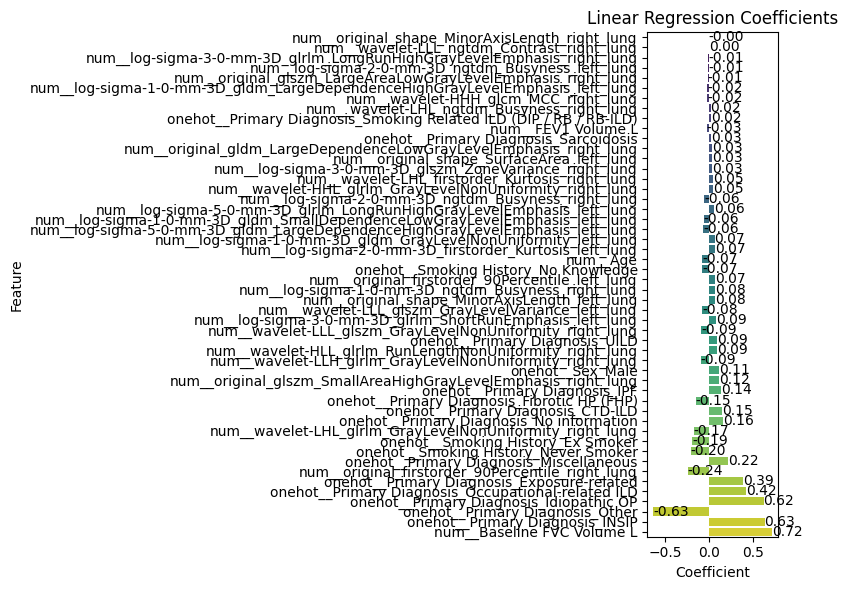

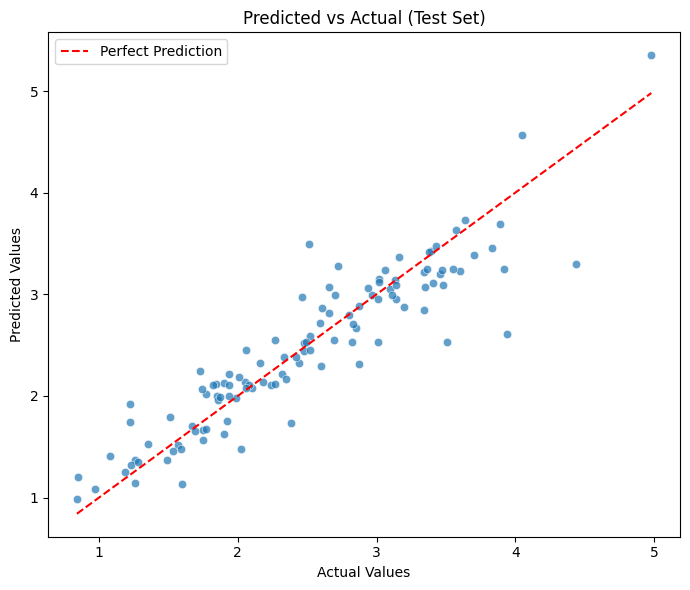

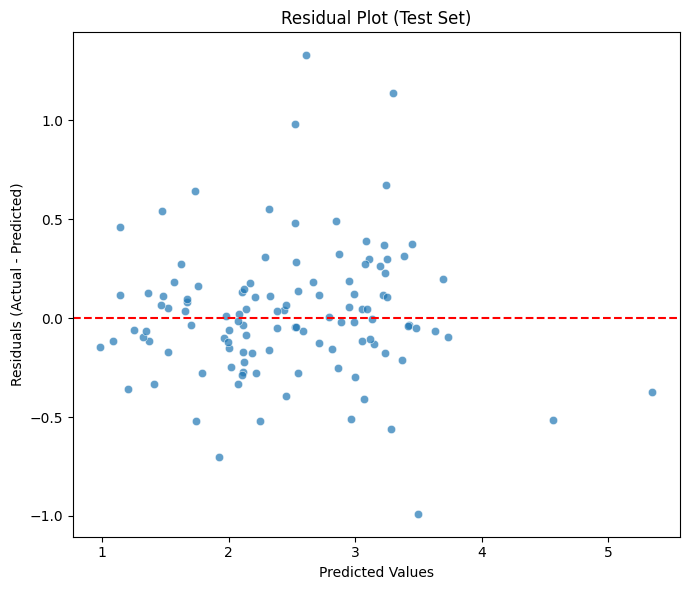

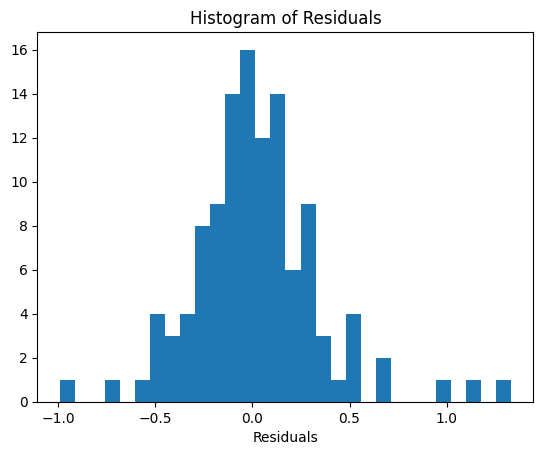

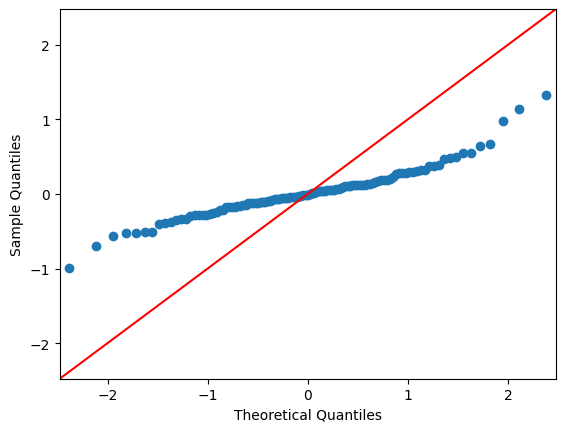


Top 5 patients with largest squared errors:
         Baseline_FVC  Target_FVC  Predicted_FVC  Squared_Error  \
1000934          2.50        3.94       2.610099       1.329901   
1000635          4.37        4.44       3.301769       1.138231   
545418           3.63        2.51       3.499129       0.989129   
1002403          3.30        3.51       2.527605       0.982395   
1001175          1.98        1.22       1.920763       0.700763   

         Baseline_FVC_Week  Followup_FVC_Week  
1000934                0.0               52.0  
1000635                0.0               48.0  
545418                 0.0               53.0  
1002403                0.0               53.0  
1001175                0.0               54.0  


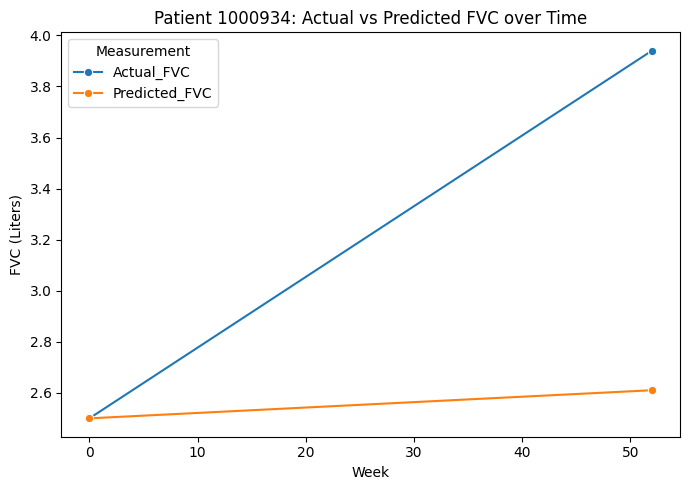

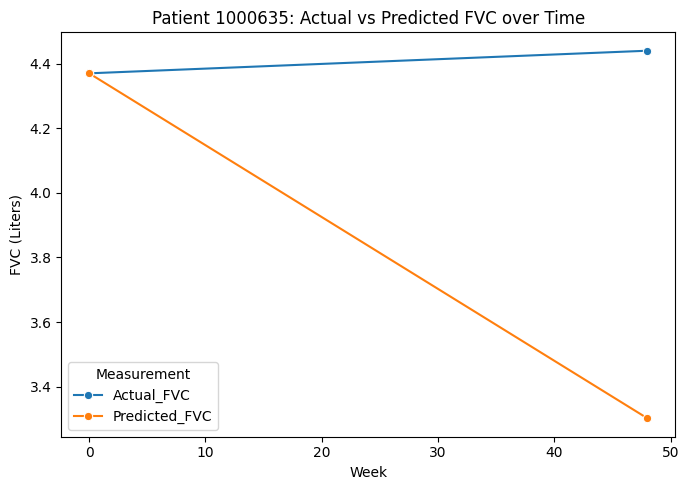

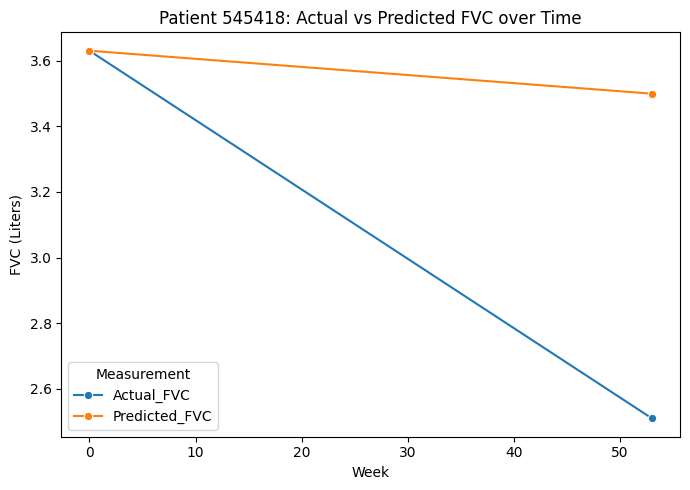

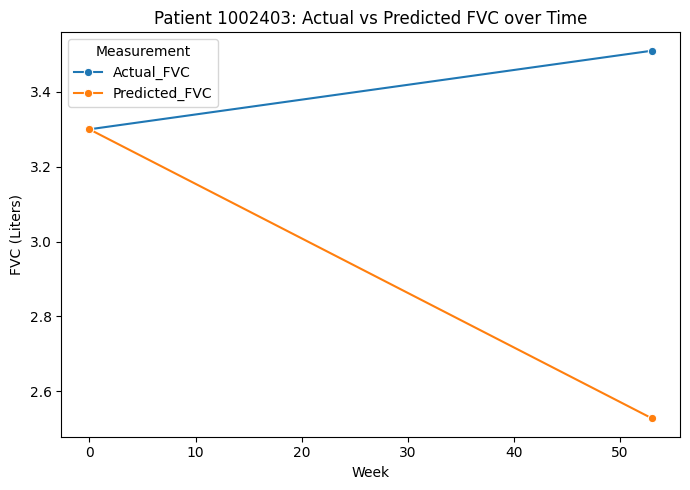

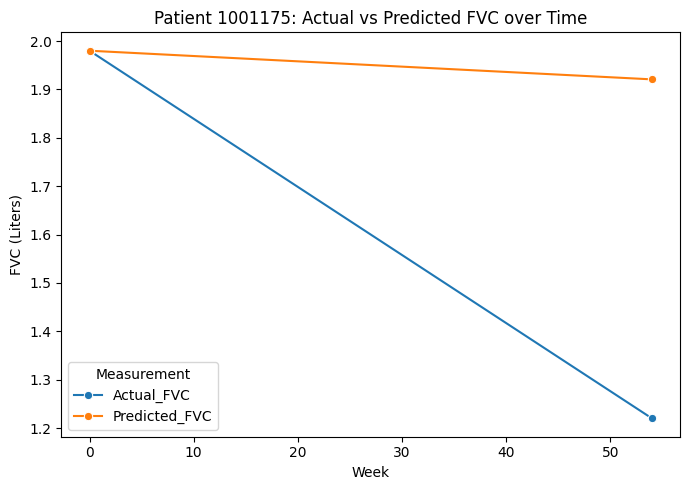

Top 5 patients with increasing FVC and lowest prediction error:
         Baseline_FVC  Target_FVC  Predicted_FVC  Abs_Error  \
1000649          2.92        2.97       2.989780   0.019780   
142332           1.67        1.69       1.655182   0.034818   
1001370          2.32        2.42       2.382832   0.037168   
191720           2.36        2.48       2.438669   0.041331   
1001031          3.02        3.14       3.094799   0.045201   

         Baseline_FVC_Week  Followup_FVC_Week  
1000649                0.0               48.0  
142332                 0.0               50.0  
1001370                0.0               49.0  
191720                 0.0               53.0  
1001031                0.0               48.0  


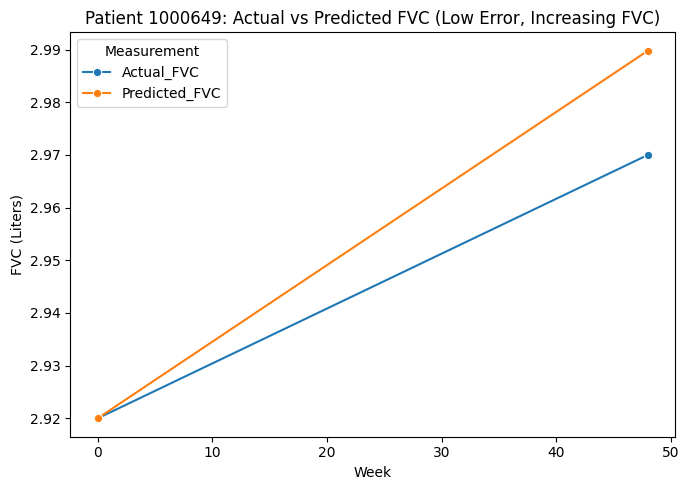

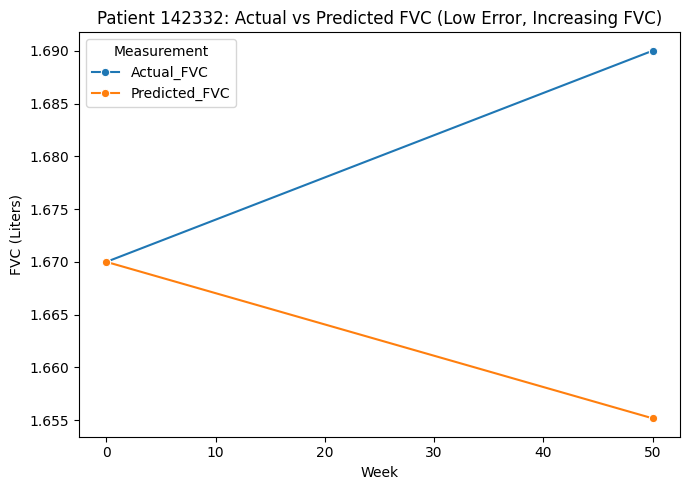

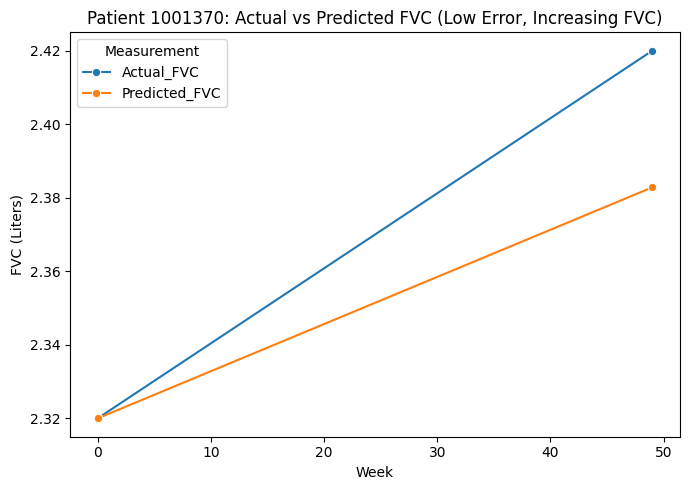

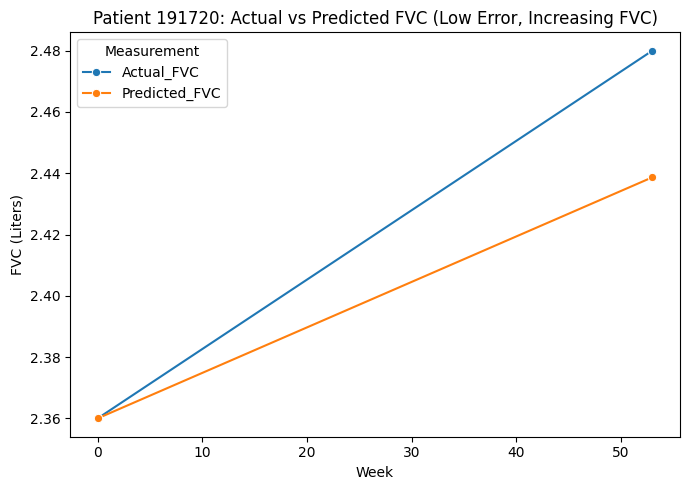

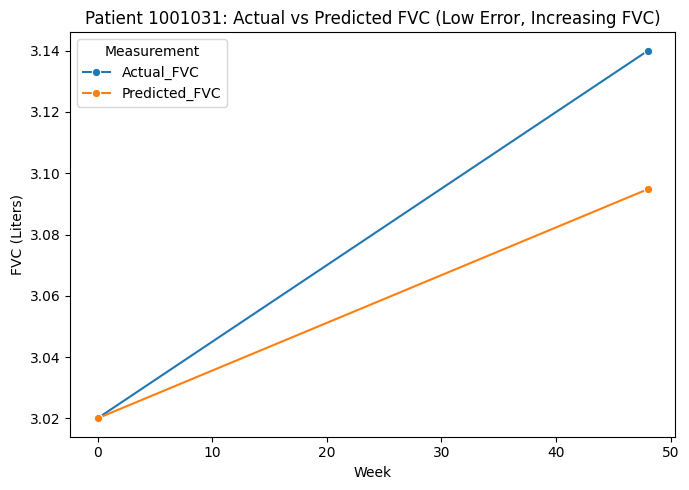

In [16]:
#tested
selected_features =['original_shape_MinorAxisLength_left_lung', 'wavelet-HHH_glcm_MCC_right_lung', 'wavelet-LLL_glszm_GrayLevelVariance_left_lung', 'original_shape_MinorAxisLength_right_lung', 'wavelet-LHL_glrlm_GrayLevelNonUniformity_right_lung', 'log-sigma-1-0-mm-3D_gldm_GrayLevelNonUniformity_left_lung', 'log-sigma-3-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_right_lung', 'log-sigma-2-0-mm-3D_ngtdm_Busyness_right_lung', 'log-sigma-2-0-mm-3D_ngtdm_Busyness_left_lung', 'original_firstorder_90Percentile_right_lung', 'log-sigma-3-0-mm-3D_glszm_ZoneVariance_right_lung', 'original_shape_SurfaceArea_left_lung', 'wavelet-HHL_glrlm_GrayLevelNonUniformity_right_lung', 'original_glszm_SmallAreaHighGrayLevelEmphasis_right_lung', 'log-sigma-1-0-mm-3D_ngtdm_Busyness_right_lung', 'log-sigma-1-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_left_lung', 'wavelet-LLH_glrlm_GrayLevelNonUniformity_right_lung', 'wavelet-LHL_firstorder_Kurtosis_right_lung', 'wavelet-LLL_glszm_GrayLevelNonUniformity_right_lung', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_right_lung', 'wavelet-HLL_glrlm_RunLengthNonUniformity_right_lung', 'original_firstorder_90Percentile_left_lung', 'original_glszm_LargeAreaLowGrayLevelEmphasis_right_lung', 'log-sigma-3-0-mm-3D_glrlm_ShortRunEmphasis_left_lung', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_left_lung', 'wavelet-LHL_ngtdm_Busyness_right_lung', 'log-sigma-5-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_left_lung', 'log-sigma-2-0-mm-3D_firstorder_Kurtosis_left_lung', 'wavelet-LLL_ngtdm_Contrast_right_lung', 'log-sigma-1-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis_left_lung']
Clinical_Contineous_data_ext = selected_features + Clinical_Contineous_data
print(Clinical_Contineous_data_ext)
X_train, X_test, y_train, y_test = joblib.load("/home/pansurya/OSIC_thesis/radiomics_files/data_splits_with_clinical_harmonization.pkl")
X_train_clini_log = X_train.copy()
X_test_clini_log  = X_test.copy()

# Transform Age
for col in ['Age']:
    X_train_clini_log[col] = np.log(X_train_clini_log[col])
    X_test_clini_log[col] = np.log(X_test_clini_log[col])

# Median imputation (only needed if missing values exist)
imp_median = SimpleImputer(strategy='median')
imp_median.fit(X_train_clini_log)

X_train_median_filled = pd.DataFrame(
    imp_median.transform(X_train_clini_log),
    columns=X_train_clini_log.columns,
    index=X_train_clini_log.index
)

X_test_median_filled = pd.DataFrame(
    imp_median.transform(X_test_clini_log),
    columns=X_test_clini_log.columns,
    index=X_test_clini_log.index
)

# Run experiments
results1 = train_and_evaluate(X_train_median_filled, X_test_median_filled, y_train, y_test, selected_features, Clinical_Contineous_data_ext, Clinical_Categorical_data, model_name="/home/pansurya/OSIC_thesis/Linear_model/Hierarchical_mrmr_VIF_with_harmonizationPycombat.pkl")
# print("Running LOOCV experiment...")
# results1 = train_and_evaluate_with_LOOCV(X_train, X_test, y_train, y_test, selected_features, model_name="/home/pansurya/OSIC_thesis/Linear_model/Hierarchical_mrmr_VIF_LOOCV.pkl")



['wavelet-HHH_glcm_MCC_right_lung', 'wavelet-LHH_firstorder_Mean_left_lung', 'wavelet-LHH_firstorder_Skewness_left_lung', 'wavelet-LHH_glcm_ClusterShade_left_lung', 'wavelet-HHH_firstorder_Mean_left_lung', 'wavelet-HHH_glcm_MCC_left_lung', 'wavelet-LLL_firstorder_Maximum_left_lung', 'log-sigma-1-0-mm-3D_firstorder_Maximum_left_lung', 'Baseline FVC Volume L', 'FEV1 Volume L', 'Age']
Completed fold 1
Completed fold 2
Completed fold 3
Completed fold 4
Completed fold 5
Completed fold 6
Completed fold 7
Completed fold 8
Completed fold 9
Completed fold 10
Completed fold 11
Completed fold 12
Completed fold 13
Completed fold 14
Completed fold 15
MAE: [0.2909262230784454, 0.28576791454095085, 0.20447707964227294, 0.30328292738140156, 0.2686299989329001, 0.30627347967560803, 0.2654736840366441, 0.2371621002824001, 0.23627215131821339, 0.27785528749016636, 0.2280118909688392, 0.27664640330119833, 0.3084563248078483, 0.2926306910370655, 0.2400168115470013]
MSE: [0.15129307836287606, 0.180092386409

/tmp/ipykernel_244044/4003571033.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


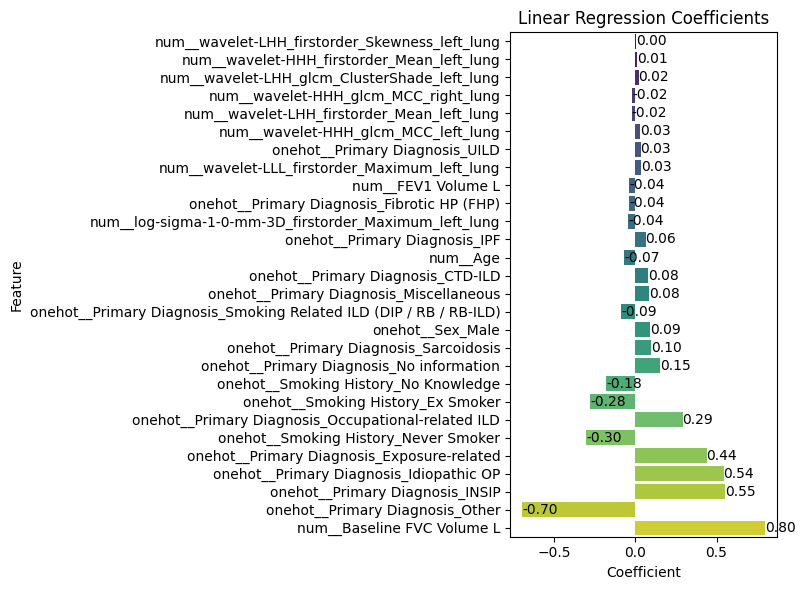

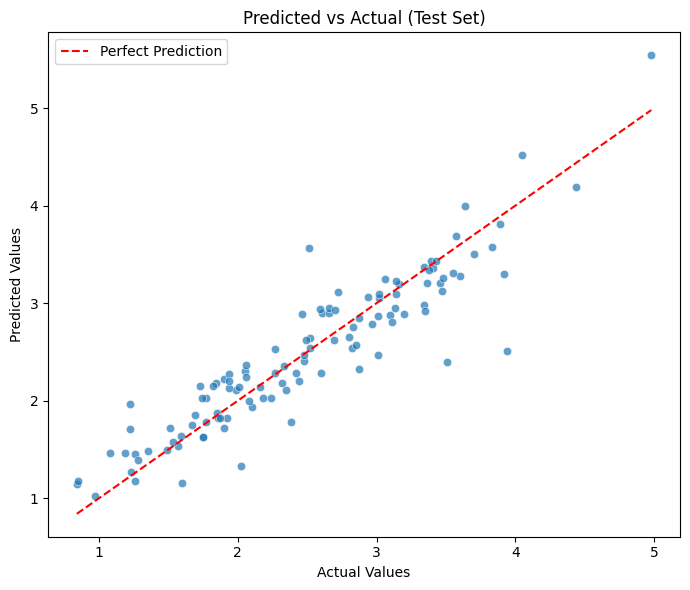

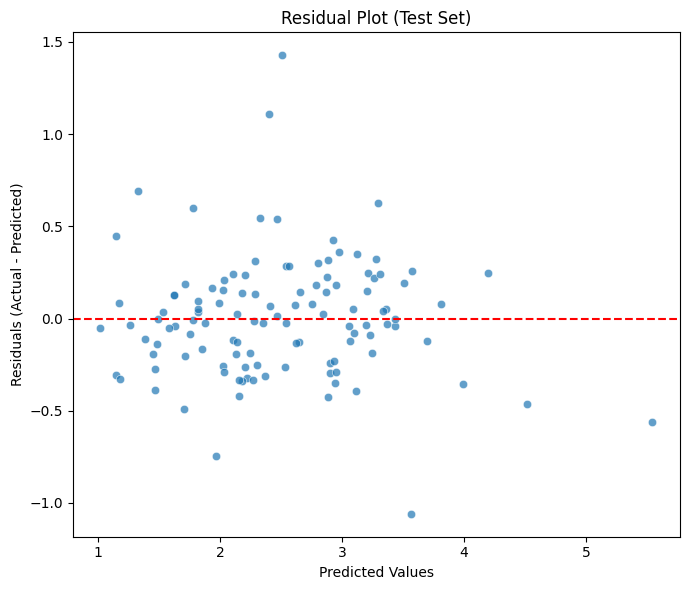

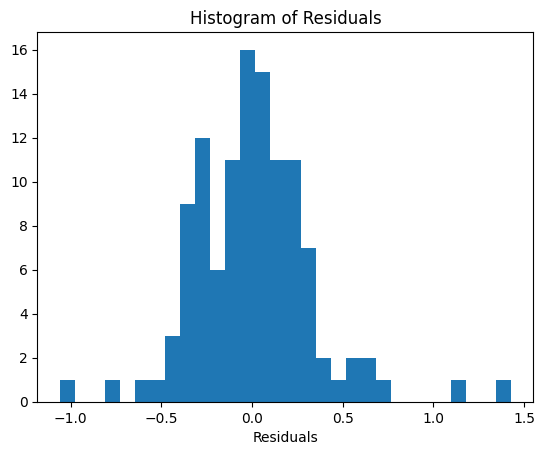

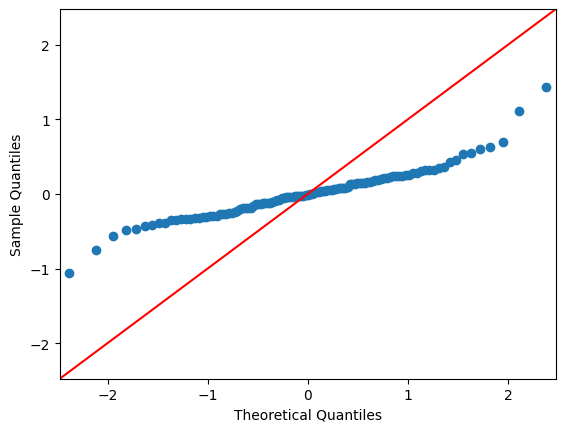


Top 5 patients with largest squared errors:
         Baseline_FVC  Target_FVC  Predicted_FVC  Squared_Error  \
1000934          2.50        3.94       2.512455       1.427545   
1002403          3.30        3.51       2.400998       1.109002   
545418           3.63        2.51       3.568750       1.058750   
1001175          1.98        1.22       1.965357       0.745357   
558013           2.20        2.02       1.328019       0.691981   

         Baseline_FVC_Week  Followup_FVC_Week  
1000934                0.0               52.0  
1002403                0.0               53.0  
545418                 0.0               53.0  
1001175                0.0               54.0  
558013                 0.0               54.0  


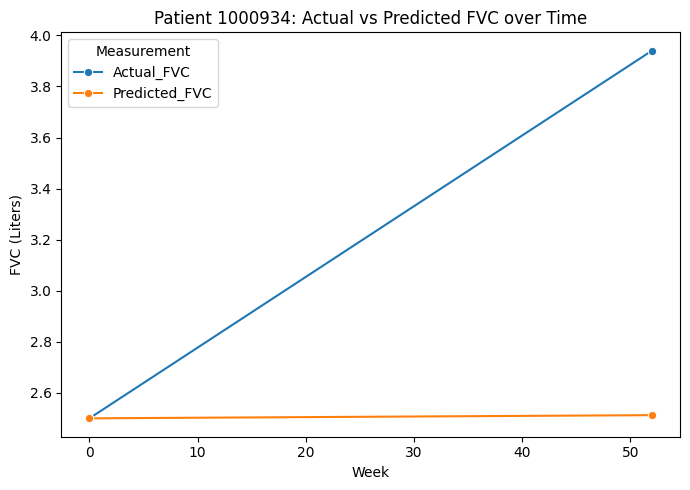

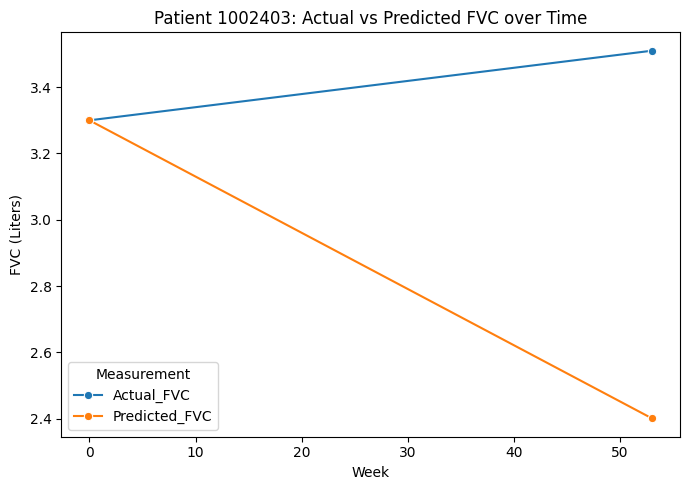

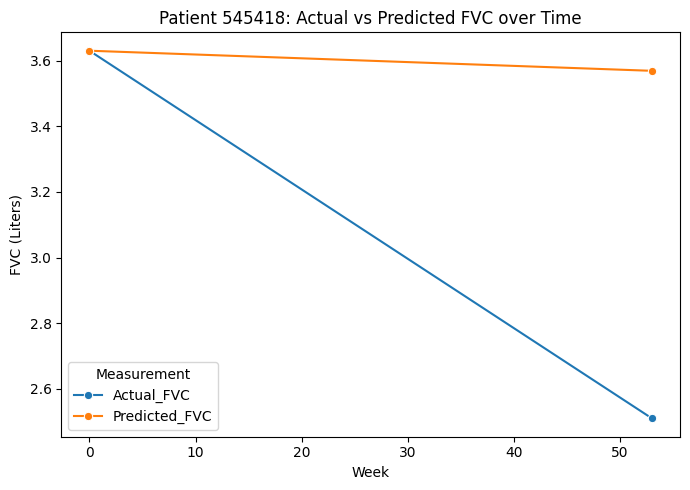

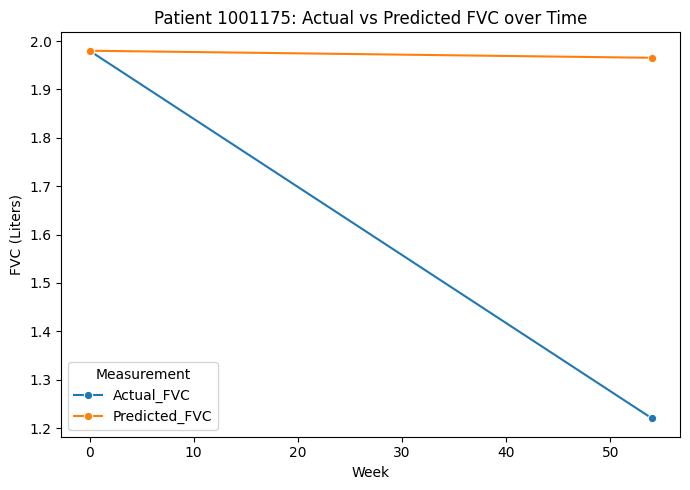

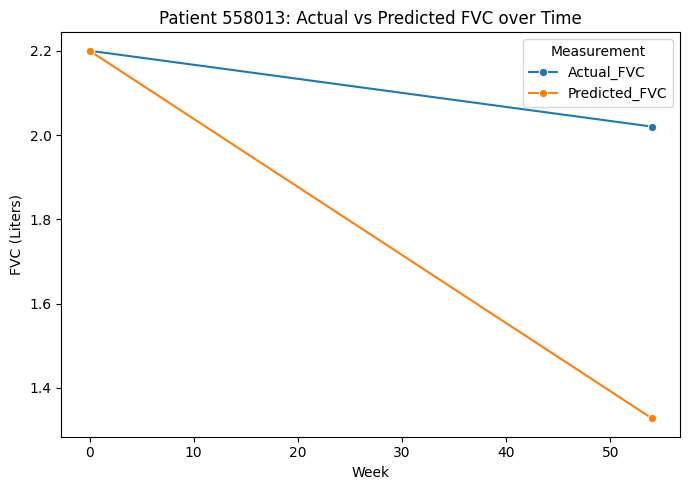

Top 5 patients with increasing FVC and lowest prediction error:
         Baseline_FVC  Target_FVC  Predicted_FVC  Abs_Error  \
1001253          1.43        1.49       1.495064   0.005064   
1000769          1.56        1.57       1.537139   0.032861   
1000971          1.21        1.23       1.267495   0.037495   
1000692          2.77        3.02       3.057928   0.037928   
191720           2.36        2.48       2.409848   0.070152   

         Baseline_FVC_Week  Followup_FVC_Week  
1001253                0.0               54.0  
1000769                0.0               52.0  
1000971                0.0               48.0  
1000692                0.0               56.0  
191720                 0.0               53.0  


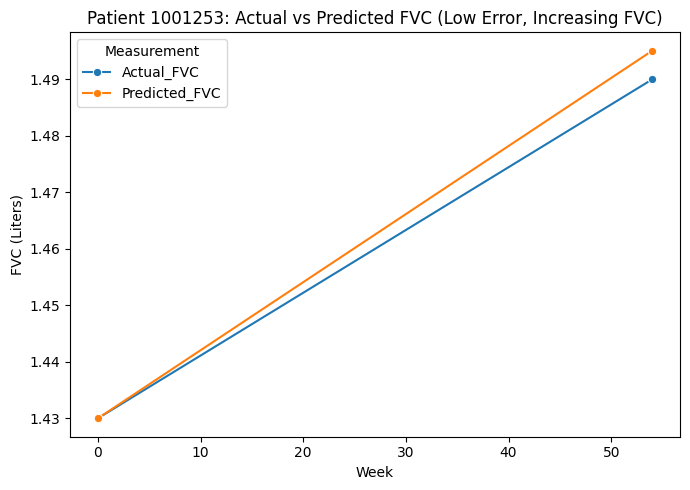

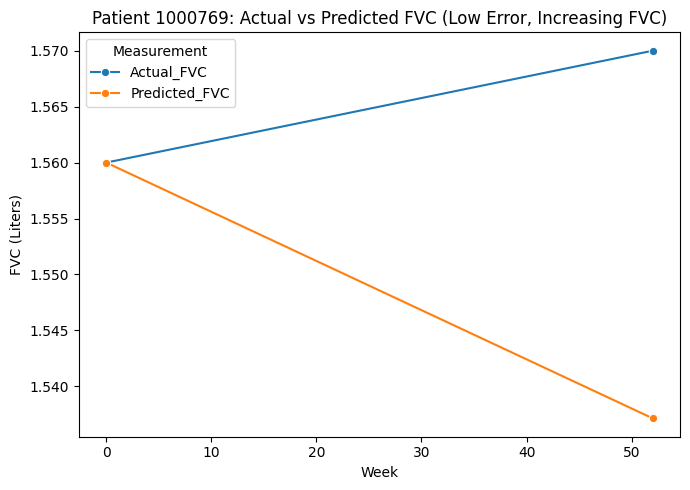

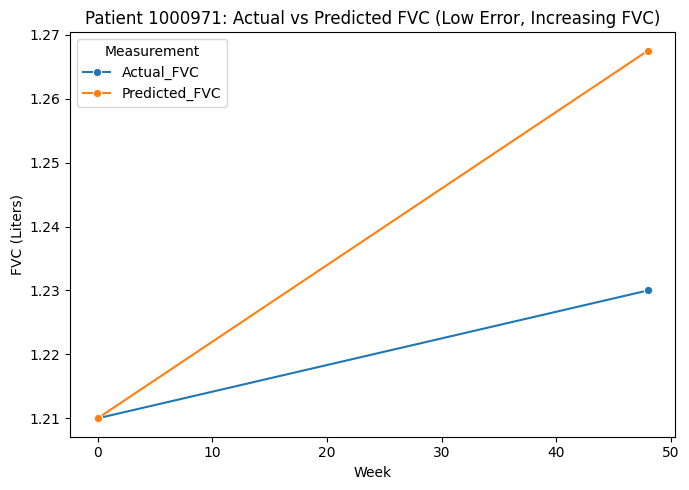

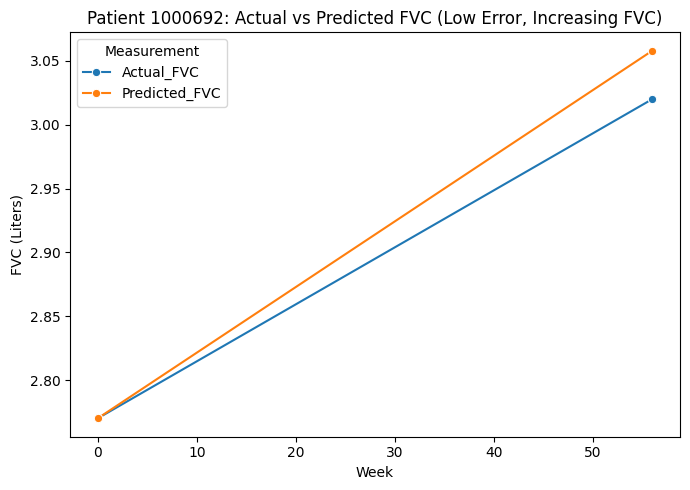

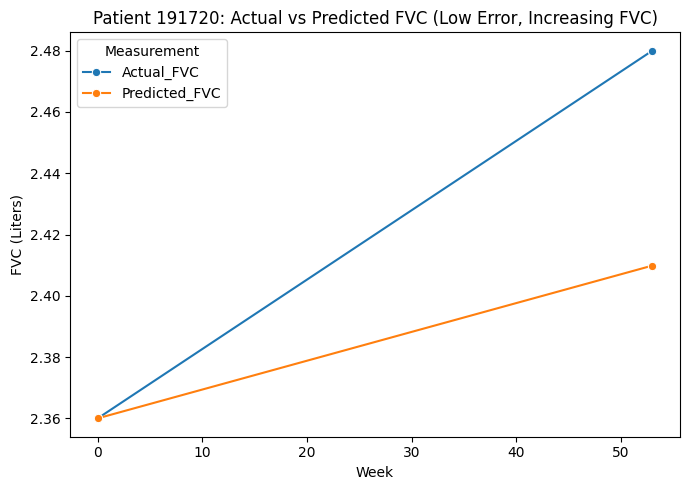

In [17]:
#tested
selected_features = ['wavelet-HHH_glcm_MCC_right_lung', 'wavelet-LHH_firstorder_Mean_left_lung', 'wavelet-LHH_firstorder_Skewness_left_lung', 'wavelet-LHH_glcm_ClusterShade_left_lung', 'wavelet-HHH_firstorder_Mean_left_lung', 'wavelet-HHH_glcm_MCC_left_lung', 'wavelet-LLL_firstorder_Maximum_left_lung', 'log-sigma-1-0-mm-3D_firstorder_Maximum_left_lung']
Clinical_Contineous_data_ext = selected_features + Clinical_Contineous_data
print(Clinical_Contineous_data_ext)
X_train, X_test, y_train, y_test = joblib.load("/home/pansurya/OSIC_thesis/radiomics_files/data_splits_with_clinical_harmonization.pkl")
X_train_clini_log = X_train.copy()
X_test_clini_log  = X_test.copy()

# Transform Age
for col in ['Age']:
    X_train_clini_log[col] = np.log(X_train_clini_log[col])
    X_test_clini_log[col] = np.log(X_test_clini_log[col])

# Median imputation (only needed if missing values exist)
imp_median = SimpleImputer(strategy='median')
imp_median.fit(X_train_clini_log)

X_train_median_filled = pd.DataFrame(
    imp_median.transform(X_train_clini_log),
    columns=X_train_clini_log.columns,
    index=X_train_clini_log.index
)

X_test_median_filled = pd.DataFrame(
    imp_median.transform(X_test_clini_log),
    columns=X_test_clini_log.columns,
    index=X_test_clini_log.index
)

# Run experiments
results1 = train_and_evaluate(X_train_median_filled, X_test_median_filled, y_train, y_test, selected_features, Clinical_Contineous_data_ext, Clinical_Categorical_data, model_name="/home/pansurya/OSIC_thesis/Linear_model/Hierarchical_cluster_mrmr_VIF_with_harmonizationPycombat.pkl")



['log-sigma-2-0-mm-3D_ngtdm_Strength_left_lung', 'wavelet-HHL_glrlm_GrayLevelNonUniformity_right_lung', 'wavelet-HLH_glszm_LargeAreaHighGrayLevelEmphasis_right_lung', 'log-sigma-5-0-mm-3D_glrlm_RunEntropy_right_lung', 'log-sigma-2-0-mm-3D_ngtdm_Coarseness_right_lung', 'original_firstorder_90Percentile_right_lung', 'log-sigma-3-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_right_lung', 'log-sigma-2-0-mm-3D_firstorder_Energy_left_lung', 'wavelet-LHH_ngtdm_Contrast_right_lung', 'wavelet-HHL_ngtdm_Contrast_right_lung', 'wavelet-HLH_ngtdm_Contrast_left_lung', 'Baseline FVC Volume L', 'FEV1 Volume L', 'Age']
Completed fold 1
Completed fold 2
Completed fold 3
Completed fold 4
Completed fold 5
Completed fold 6
Completed fold 7
Completed fold 8
Completed fold 9
Completed fold 10
Completed fold 11
Completed fold 12
Completed fold 13
Completed fold 14
Completed fold 15
MAE: [0.2692738065207612, 0.266721617888, 0.27662281261607063, 0.2978103653922552, 0.2668491838965391, 0.26860054021787544, 0.232131

/tmp/ipykernel_244044/4003571033.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


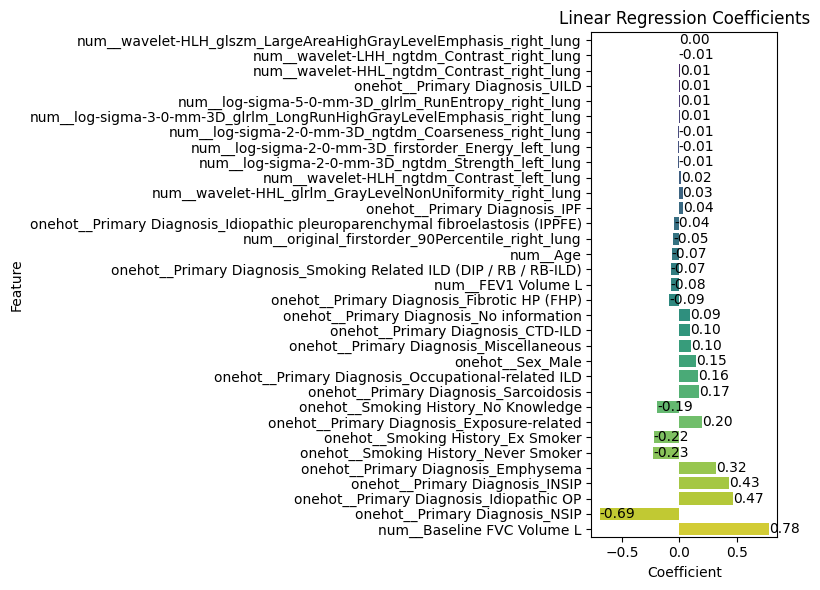

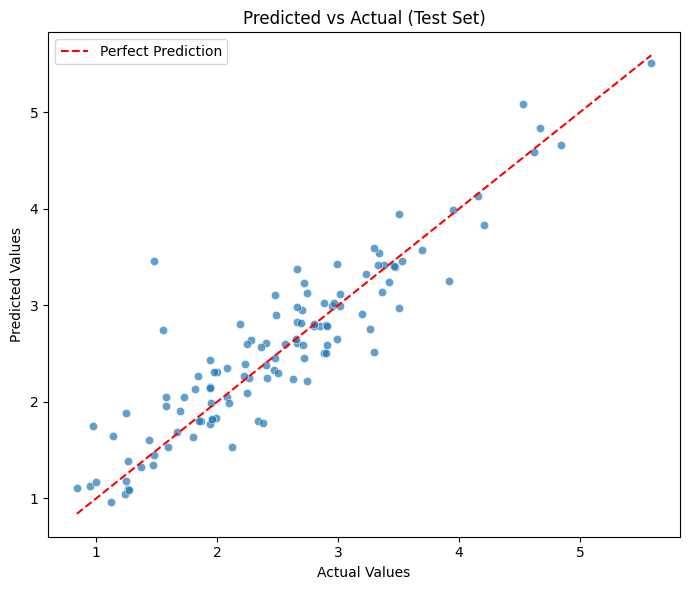

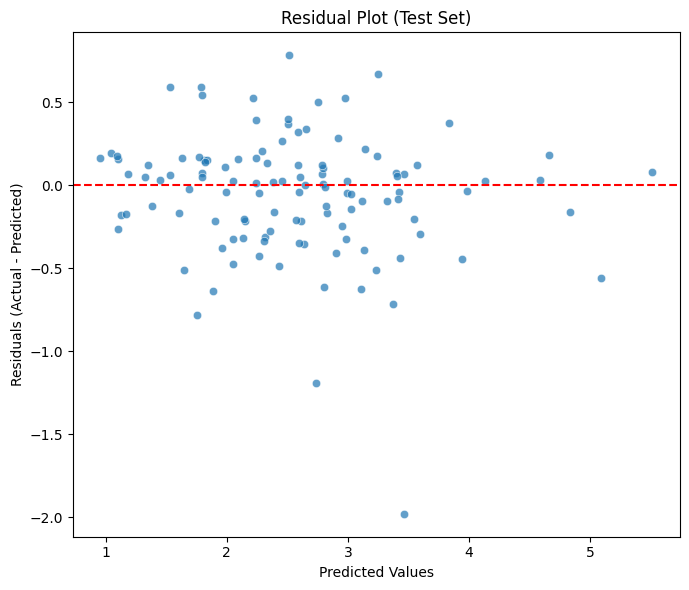

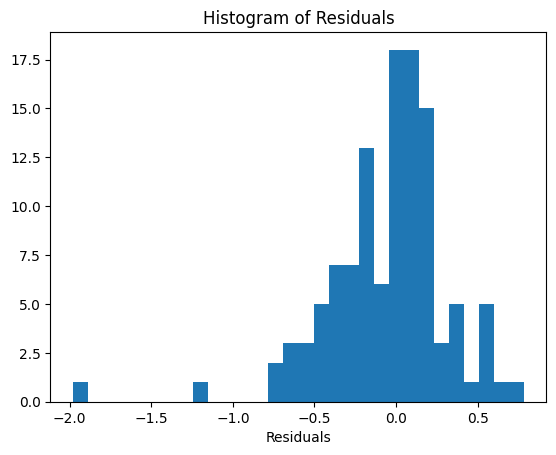

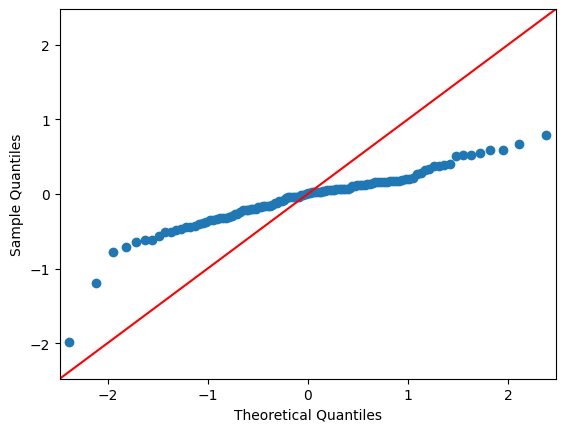


Top 5 patients with largest squared errors:
     Baseline_FVC  Target_FVC  Predicted_FVC  Squared_Error  \
155          3.59        1.48       3.459177       1.979177   
167          2.93        1.55       2.739442       1.189442   
329          2.61        3.30       2.516876       0.783124   
79           1.90        0.97       1.751899       0.781899   
469          3.50        2.66       3.373885       0.713885   

     Baseline_FVC_Week  Followup_FVC_Week  
155                0.0               53.0  
167                0.0               52.0  
329                0.0               56.0  
79                 0.0               54.0  
469                0.0               52.0  


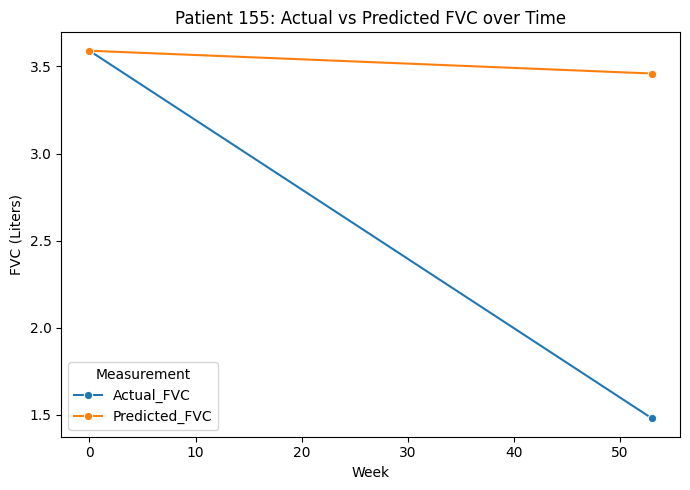

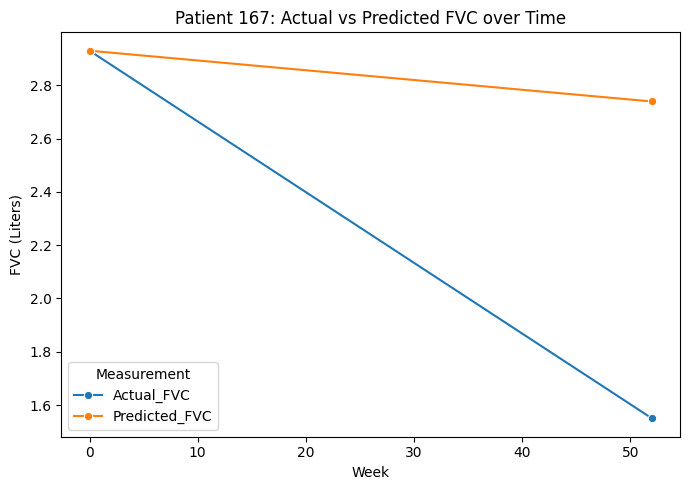

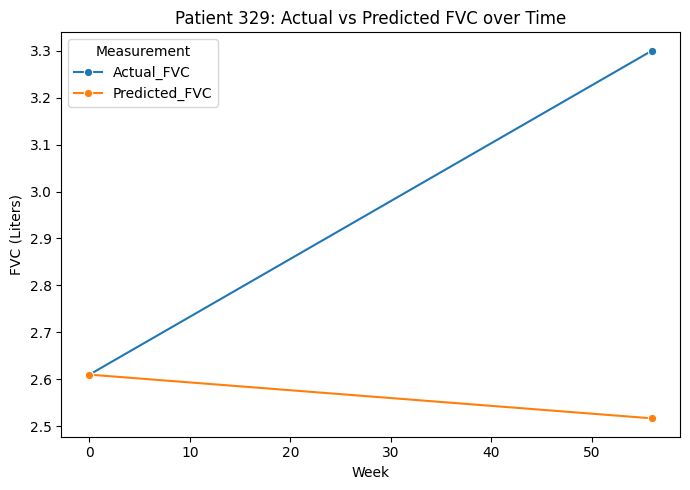

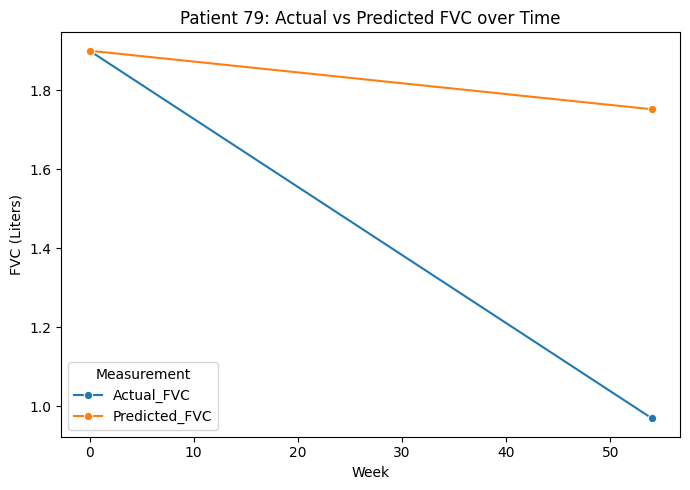

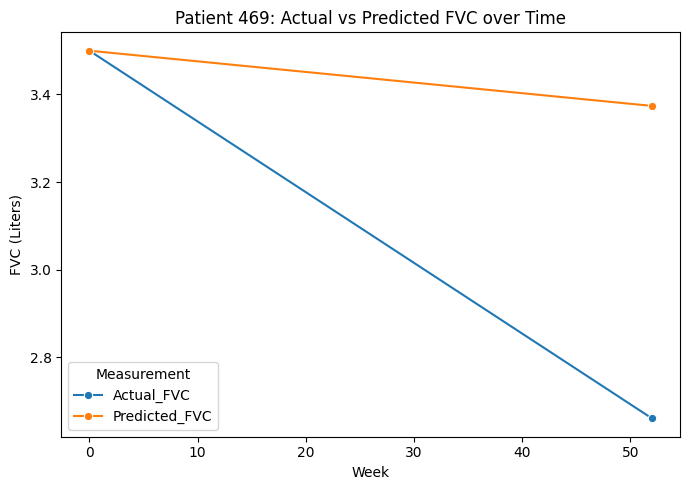

Top 5 patients with increasing FVC and lowest prediction error:
     Baseline_FVC  Target_FVC  Predicted_FVC  Abs_Error  Baseline_FVC_Week  \
73           2.36        2.48       2.453194   0.026806                0.0   
496          2.77        3.02       2.992946   0.027054                0.0   
556          1.43        1.48       1.446461   0.033539                0.0   
533          2.65        2.66       2.607719   0.052281                0.0   
148          2.79        2.90       2.794216   0.105784                0.0   

     Followup_FVC_Week  
73                53.0  
496               56.0  
556               55.0  
533               52.0  
148               51.0  


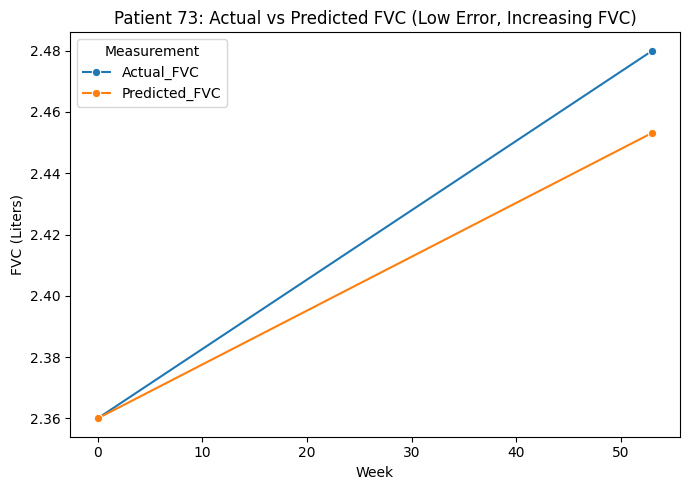

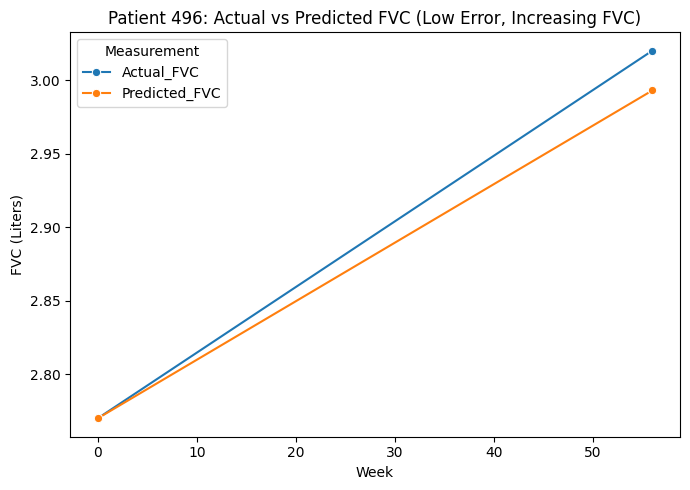

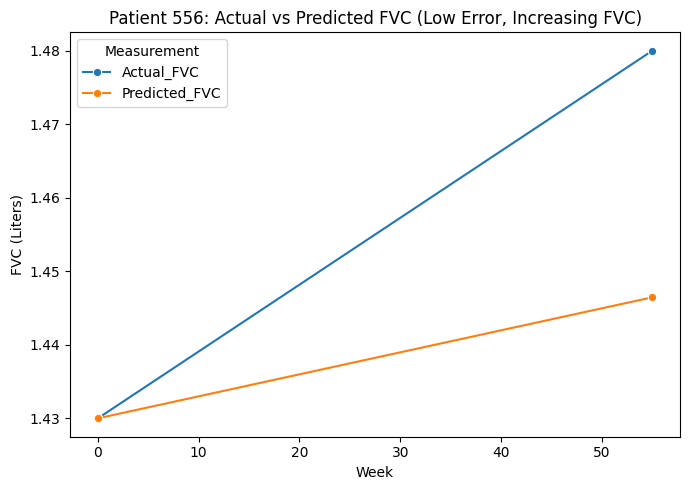

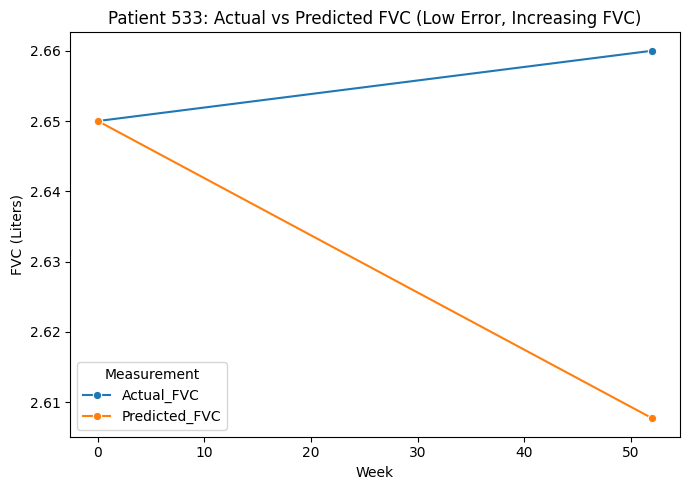

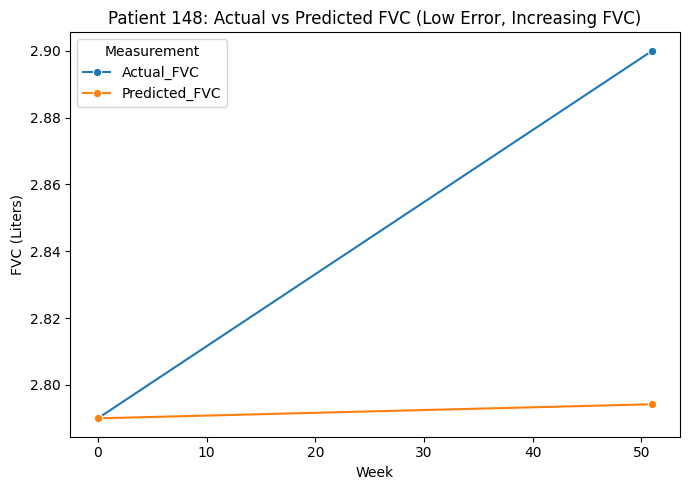

In [9]:
# tested
selected_features = ['log-sigma-2-0-mm-3D_ngtdm_Strength_left_lung', 'wavelet-HHL_glrlm_GrayLevelNonUniformity_right_lung', 'wavelet-HLH_glszm_LargeAreaHighGrayLevelEmphasis_right_lung', 'log-sigma-5-0-mm-3D_glrlm_RunEntropy_right_lung', 'log-sigma-2-0-mm-3D_ngtdm_Coarseness_right_lung', 'original_firstorder_90Percentile_right_lung', 'log-sigma-3-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_right_lung', 'log-sigma-2-0-mm-3D_firstorder_Energy_left_lung', 'wavelet-LHH_ngtdm_Contrast_right_lung', 'wavelet-HHL_ngtdm_Contrast_right_lung', 'wavelet-HLH_ngtdm_Contrast_left_lung']
Clinical_Contineous_data_ext = selected_features + Clinical_Contineous_data
print(Clinical_Contineous_data_ext)
X_train, X_test, y_train, y_test = joblib.load("/home/pansurya/OSIC_thesis/radiomics_files/data_splits_clinical_without_harmonization.pkl")
X_train_clini_log = X_train.copy()
X_test_clini_log  = X_test.copy()

# Transform Age
for col in ['Age']:
    X_train_clini_log[col] = np.log(X_train_clini_log[col])
    X_test_clini_log[col] = np.log(X_test_clini_log[col])

# Median imputation (only needed if missing values exist)
imp_median = SimpleImputer(strategy='median')
imp_median.fit(X_train_clini_log)

X_train_median_filled = pd.DataFrame(
    imp_median.transform(X_train_clini_log),
    columns=X_train_clini_log.columns,
    index=X_train_clini_log.index
)

X_test_median_filled = pd.DataFrame(
    imp_median.transform(X_test_clini_log),
    columns=X_test_clini_log.columns,
    index=X_test_clini_log.index
)

# Run experiments
results1 = train_and_evaluate(X_train_median_filled, X_test_median_filled, y_train, y_test, selected_features, Clinical_Contineous_data_ext, Clinical_Categorical_data, model_name="/home/pansurya/OSIC_thesis/Linear_model/PCA_K-means_without_harmonization.pkl")



['original_shape_MinorAxisLength_right_lung', 'original_shape_SurfaceArea_right_lung', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_right_lung', 'wavelet-HHL_glcm_Idmn_right_lung', 'log-sigma-2-0-mm-3D_firstorder_Median_right_lung', 'log-sigma-3-0-mm-3D_glcm_Idmn_right_lung', 'log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_right_lung', 'log-sigma-4-0-mm-3D_glcm_InverseVariance_right_lung', 'original_shape_MinorAxisLength_left_lung', 'log-sigma-1-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis_left_lung', 'Baseline FVC Volume L', 'FEV1 Volume L', 'Age']
Completed fold 1
Completed fold 2
Completed fold 3
Completed fold 4
Completed fold 5
Completed fold 6
Completed fold 7
Completed fold 8
Completed fold 9
Completed fold 10
Completed fold 11
Completed fold 12
Completed fold 13
Completed fold 14
Completed fold 15
MAE: [0.2823062607272725, 0.2729174334756039, 0.2119784630044898, 0.2996998200371357, 0.27825510449817376, 0.29872865384435987, 0.26317801769463156, 0.2730626766361

/tmp/ipykernel_244044/4003571033.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


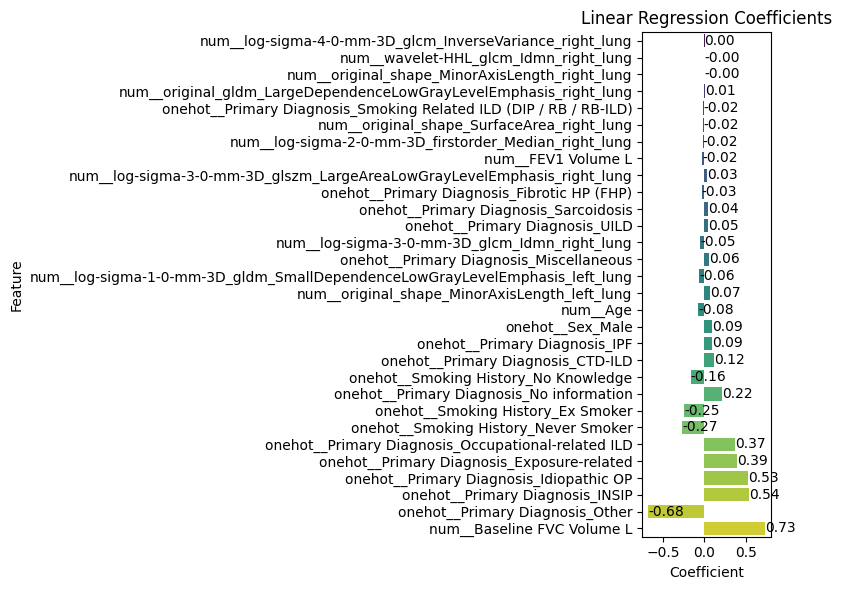

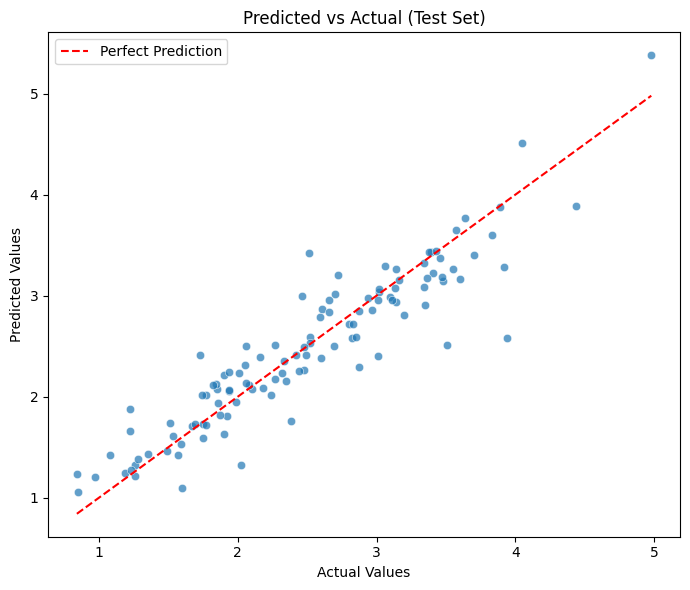

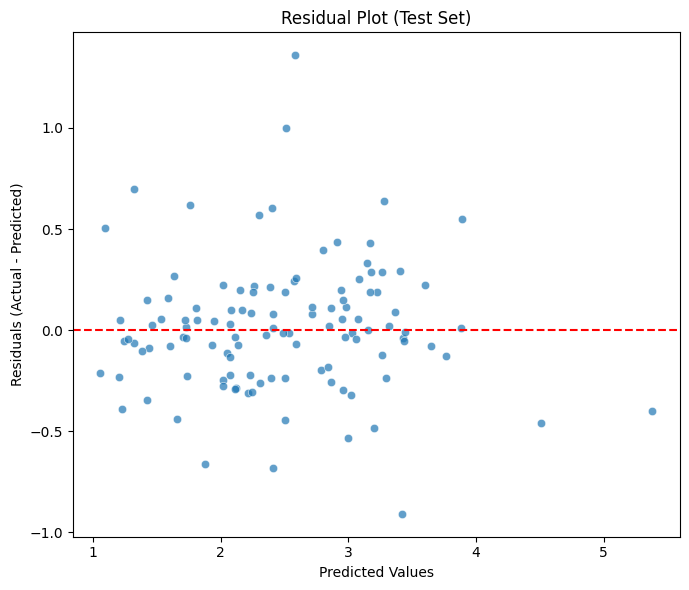

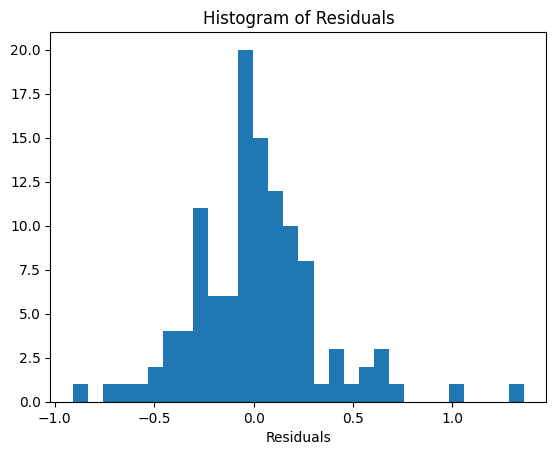

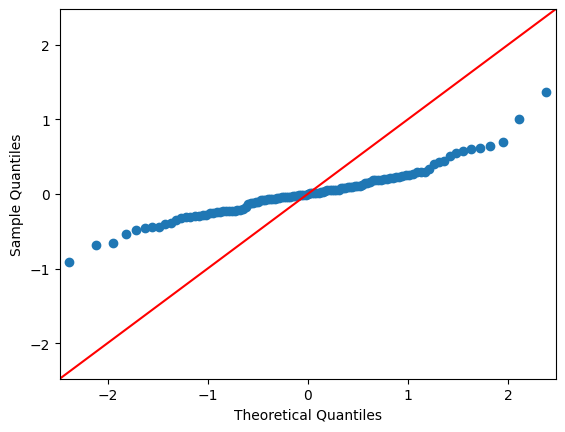


Top 5 patients with largest squared errors:
         Baseline_FVC  Target_FVC  Predicted_FVC  Squared_Error  \
1000934          2.50        3.94       2.580209       1.359791   
1002403          3.30        3.51       2.511354       0.998646   
545418           3.63        2.51       3.418337       0.908337   
558013           2.20        2.02       1.321619       0.698381   
1000699          2.37        1.73       2.411748       0.681748   

         Baseline_FVC_Week  Followup_FVC_Week  
1000934                0.0               52.0  
1002403                0.0               53.0  
545418                 0.0               53.0  
558013                 0.0               54.0  
1000699                0.0               56.0  


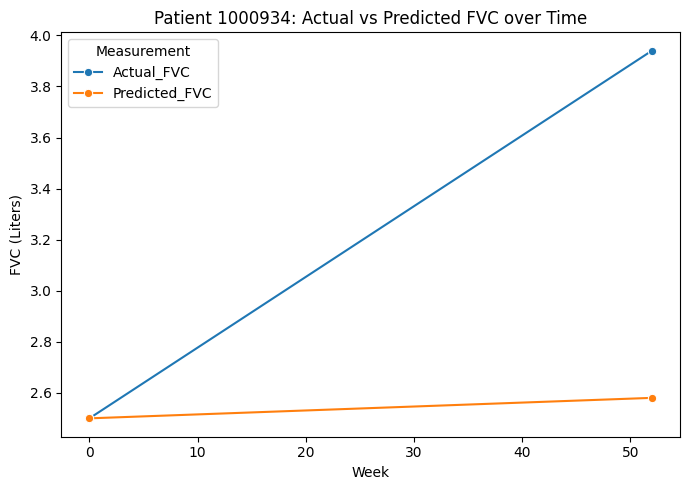

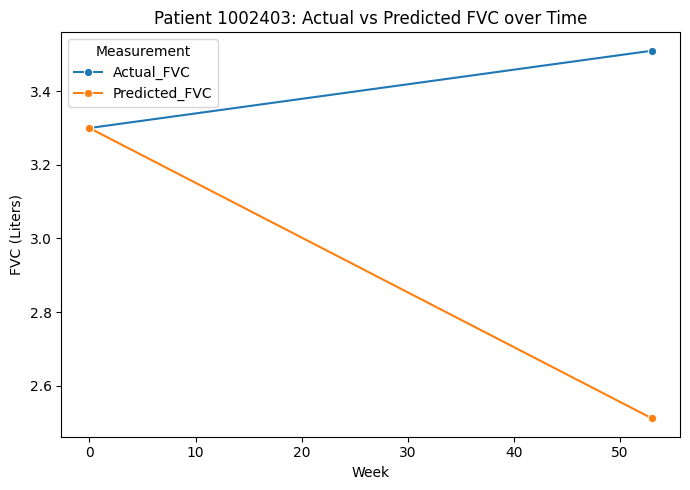

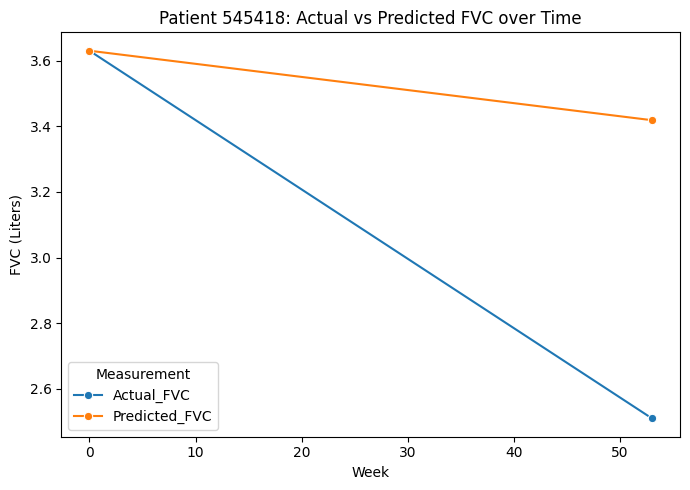

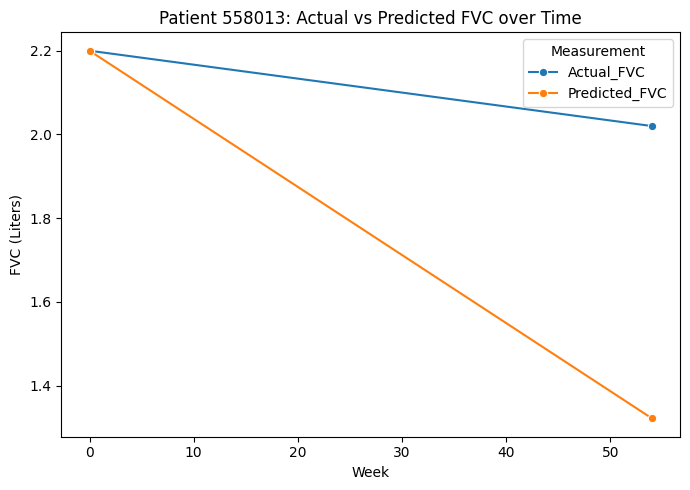

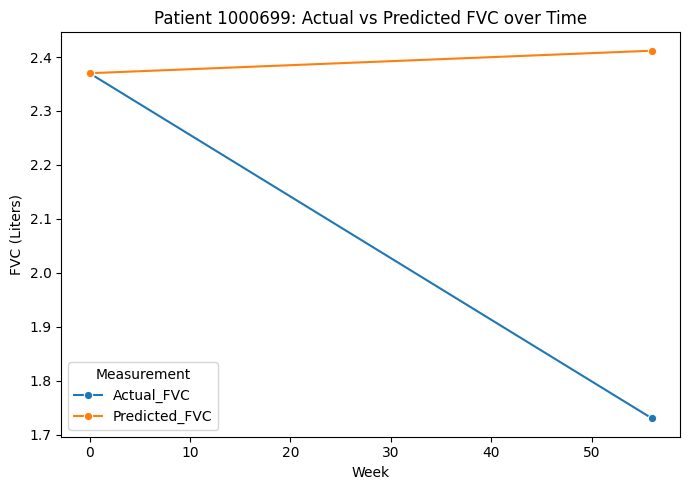

Top 5 patients with increasing FVC and lowest prediction error:
         Baseline_FVC  Target_FVC  Predicted_FVC  Abs_Error  \
1001370          2.32        2.42       2.408284   0.011716   
1000692          2.77        3.02       3.031743   0.011743   
1000616          1.73        1.75       1.732663   0.017337   
1001253          1.43        1.49       1.462018   0.027982   
142332           1.67        1.69       1.731058   0.041058   

         Baseline_FVC_Week  Followup_FVC_Week  
1001370                0.0               49.0  
1000692                0.0               56.0  
1000616                0.0               48.0  
1001253                0.0               54.0  
142332                 0.0               50.0  


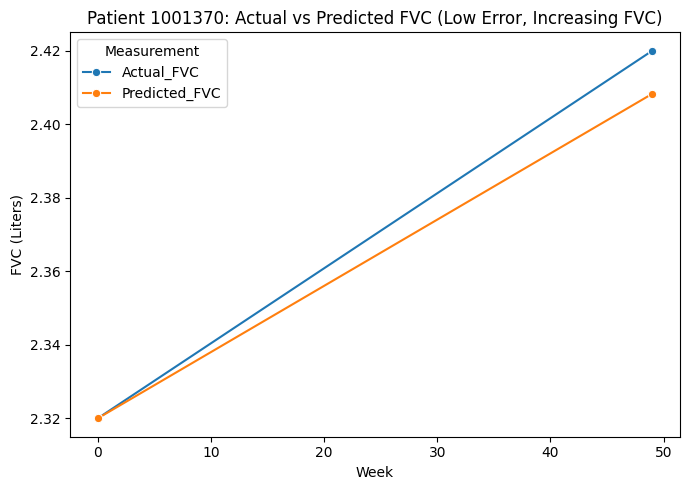

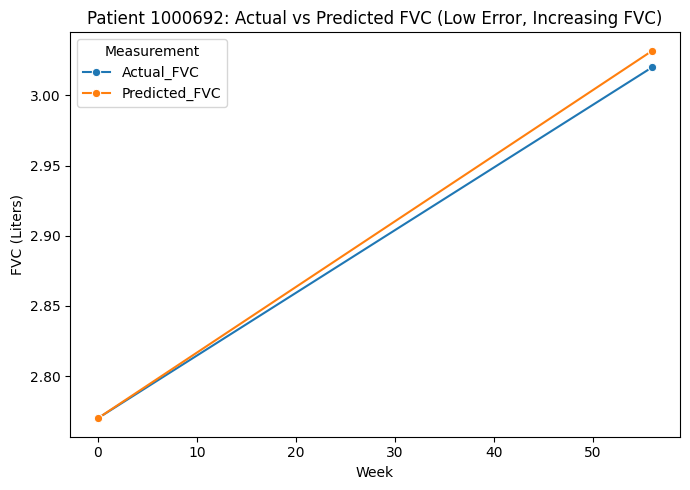

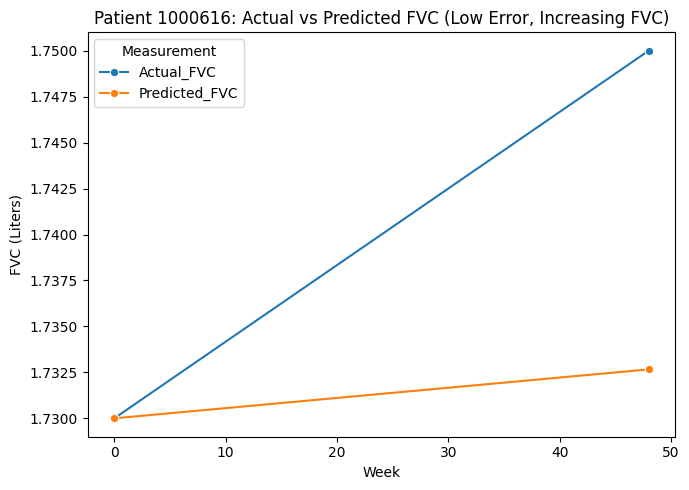

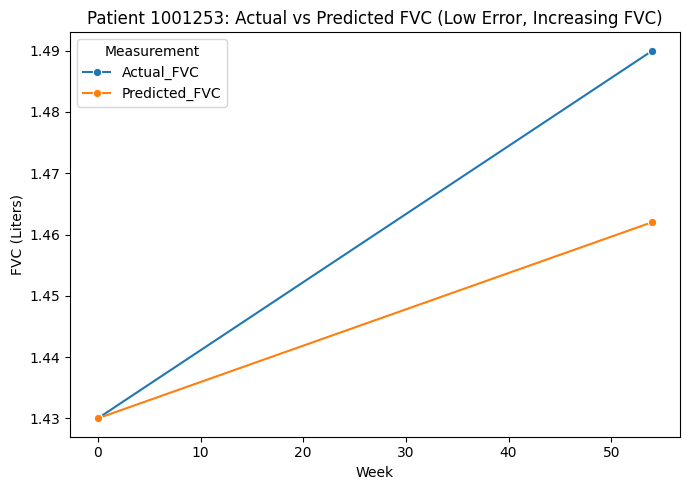

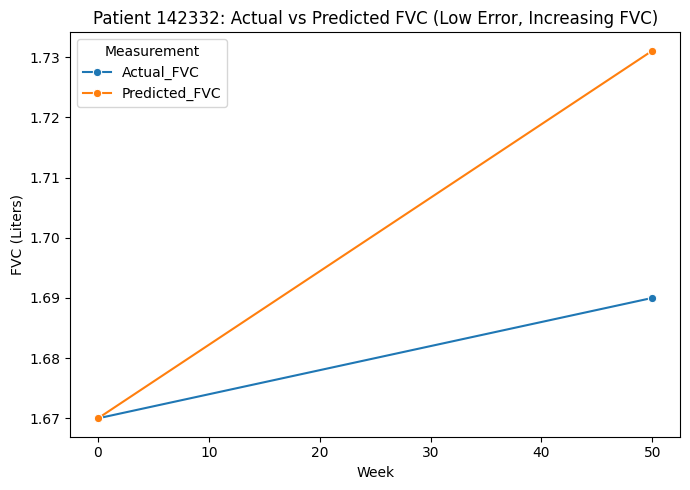

In [18]:
#tested
selected_features = ['original_shape_MinorAxisLength_right_lung', 'original_shape_SurfaceArea_right_lung', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_right_lung', 'wavelet-HHL_glcm_Idmn_right_lung', 'log-sigma-2-0-mm-3D_firstorder_Median_right_lung', 'log-sigma-3-0-mm-3D_glcm_Idmn_right_lung', 'log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_right_lung', 'log-sigma-4-0-mm-3D_glcm_InverseVariance_right_lung', 'original_shape_MinorAxisLength_left_lung', 'log-sigma-1-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis_left_lung']
Clinical_Contineous_data_ext = selected_features + Clinical_Contineous_data
print(Clinical_Contineous_data_ext)
X_train, X_test, y_train, y_test = joblib.load("/home/pansurya/OSIC_thesis/radiomics_files/data_splits_with_clinical_harmonization.pkl")
X_train_clini_log = X_train.copy()
X_test_clini_log  = X_test.copy()

# Transform Age
for col in ['Age']:
    X_train_clini_log[col] = np.log(X_train_clini_log[col])
    X_test_clini_log[col] = np.log(X_test_clini_log[col])

# Median imputation (only needed if missing values exist)
imp_median = SimpleImputer(strategy='median')
imp_median.fit(X_train_clini_log)

X_train_median_filled = pd.DataFrame(
    imp_median.transform(X_train_clini_log),
    columns=X_train_clini_log.columns,
    index=X_train_clini_log.index
)

X_test_median_filled = pd.DataFrame(
    imp_median.transform(X_test_clini_log),
    columns=X_test_clini_log.columns,
    index=X_test_clini_log.index
)

# Run experiments
results1 = train_and_evaluate(X_train_median_filled, X_test_median_filled, y_train, y_test, selected_features, Clinical_Contineous_data_ext, Clinical_Categorical_data, model_name="/home/pansurya/OSIC_thesis/Linear_model/Correlation_based_Using_Target_FVC_with_harmonizationPycombat.pkl")
# print("Running LOOCV experiment...")
# results1 = train_and_evaluate_with_LOOCV(X_train, X_test, y_train, y_test, selected_features, model_name="/home/pansurya/OSIC_thesis/Linear_model/PAM_ANOVA_VIF_LOOCV.pkl")


['original_shape_MinorAxisLength_left_lung', 'wavelet-HLH_gldm_DependenceNonUniformityNormalized_right_lung', 'log-sigma-2-0-mm-3D_firstorder_10Percentile_right_lung', 'original_shape_MinorAxisLength_right_lung', 'wavelet-HHL_glcm_Idmn_right_lung', 'original_shape_SurfaceArea_right_lung', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_right_lung', 'log-sigma-3-0-mm-3D_glcm_InverseVariance_right_lung', 'log-sigma-2-0-mm-3D_firstorder_Kurtosis_left_lung', 'log-sigma-1-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_right_lung', 'log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_right_lung', 'log-sigma-1-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis_left_lung', 'log-sigma-4-0-mm-3D_glcm_InverseVariance_right_lung', 'wavelet-LHL_glcm_Idmn_left_lung', 'log-sigma-1-0-mm-3D_firstorder_Skewness_left_lung', 'wavelet-HLL_firstorder_Kurtosis_left_lung', 'Baseline FVC Volume L', 'FEV1 Volume L', 'Age']
Completed fold 1
Completed fold 2
Completed fold 3
Completed fold 4
Completed fold 5
Com

/tmp/ipykernel_244044/4003571033.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


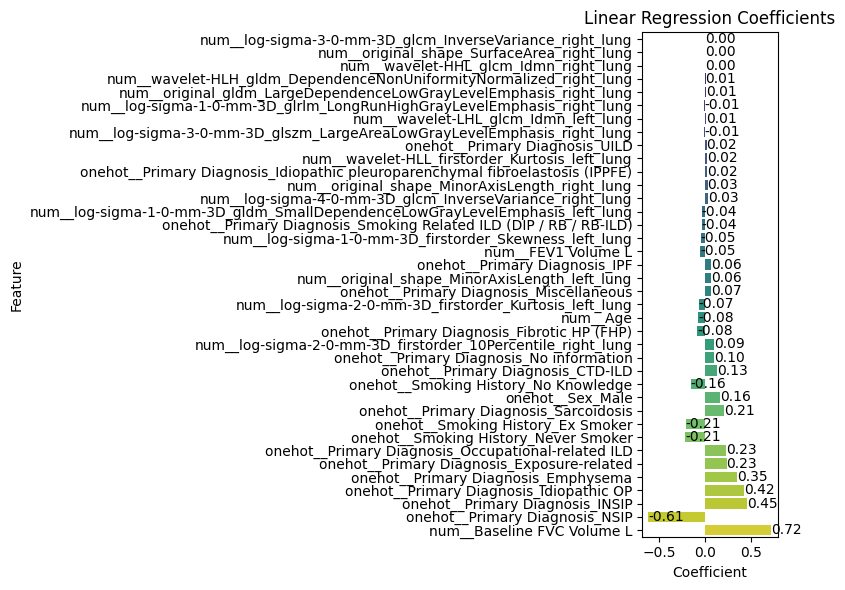

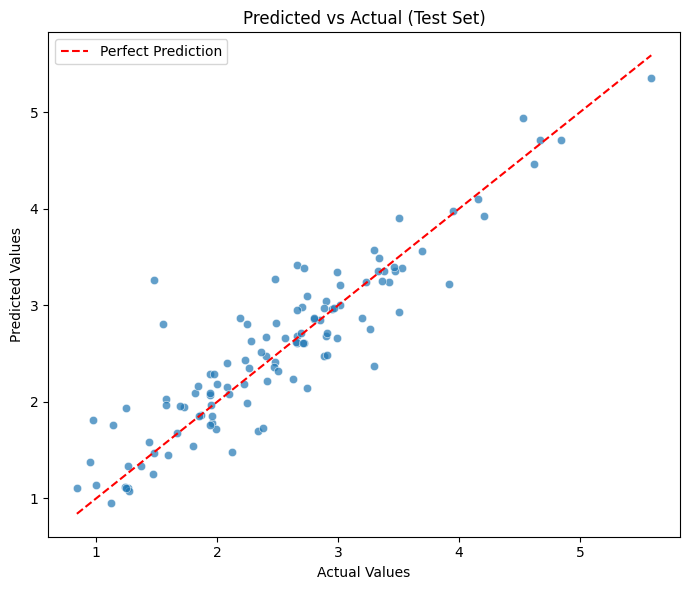

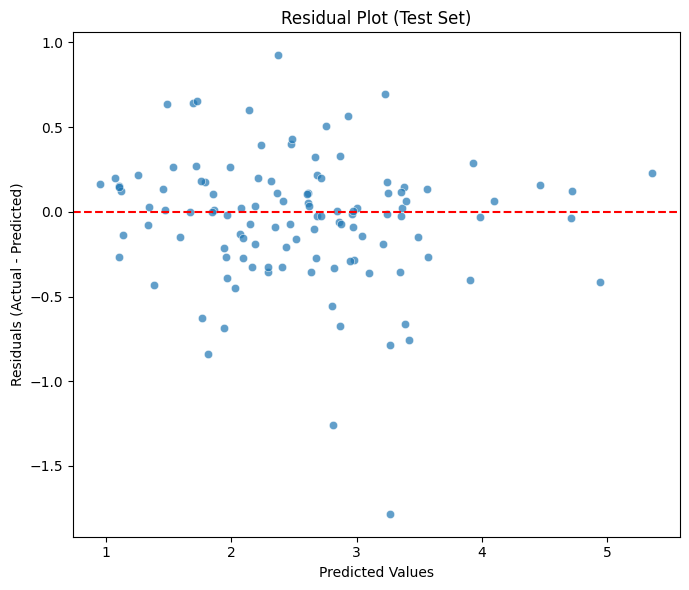

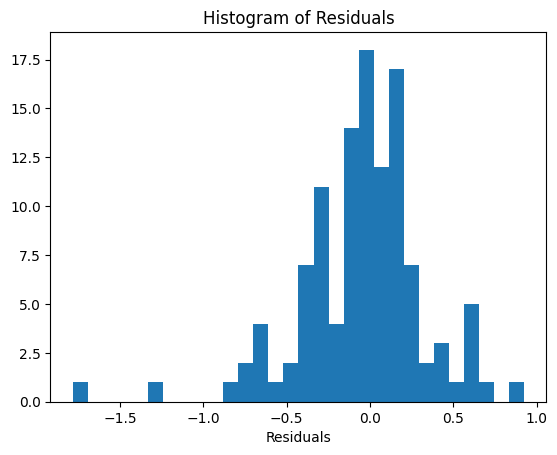

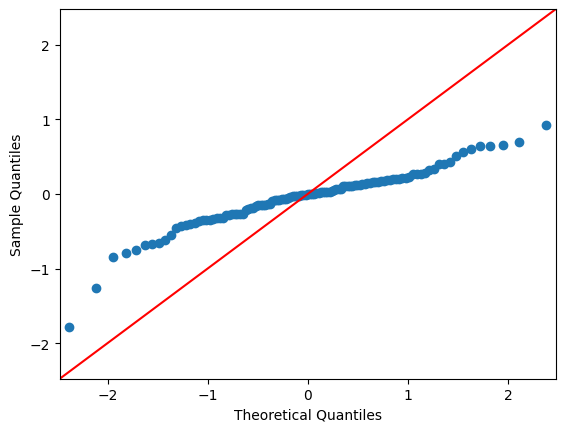


Top 5 patients with largest squared errors:
     Baseline_FVC  Target_FVC  Predicted_FVC  Squared_Error  \
155          3.59        1.48       3.262810       1.782810   
167          2.93        1.55       2.809923       1.259923   
329          2.61        3.30       2.375590       0.924410   
79           1.90        0.97       1.810551       0.840551   
75           3.18        2.48       3.267634       0.787634   

     Baseline_FVC_Week  Followup_FVC_Week  
155                0.0               53.0  
167                0.0               52.0  
329                0.0               56.0  
79                 0.0               54.0  
75                 0.0               48.0  


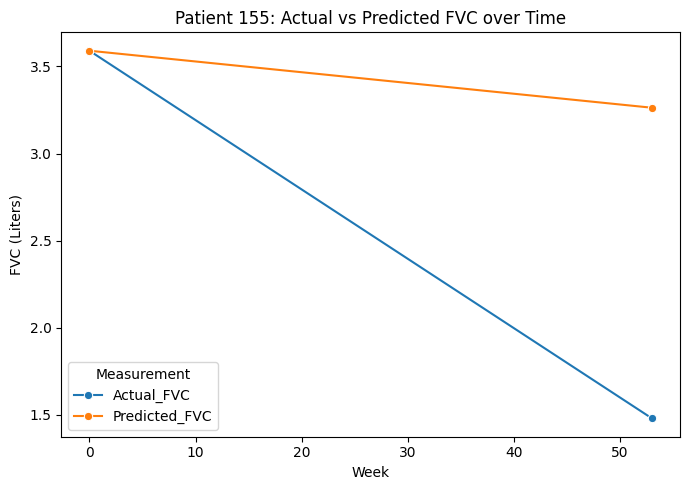

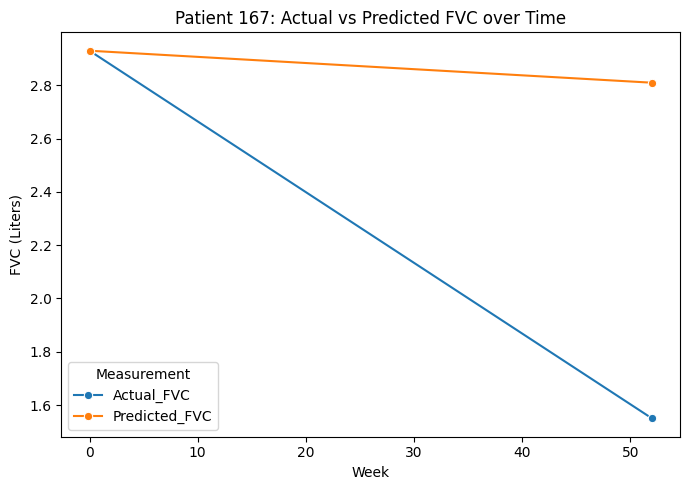

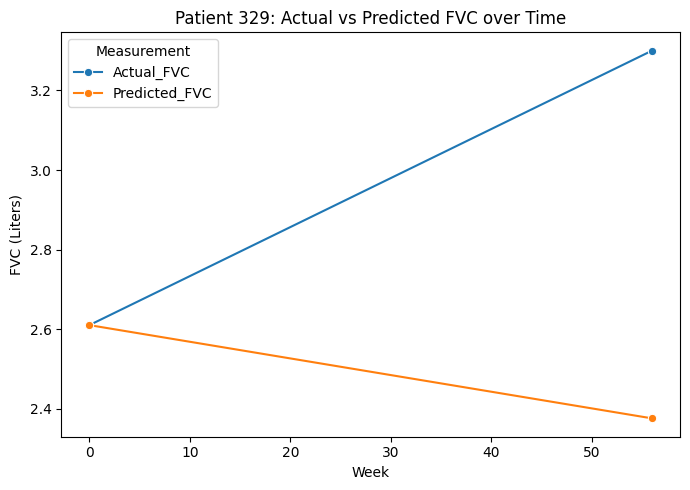

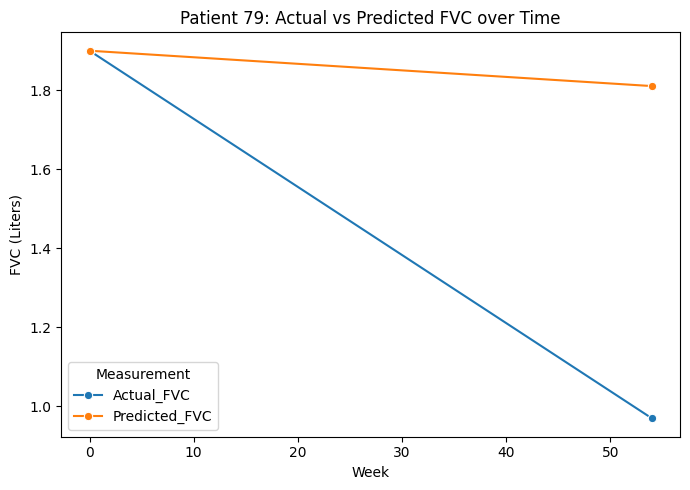

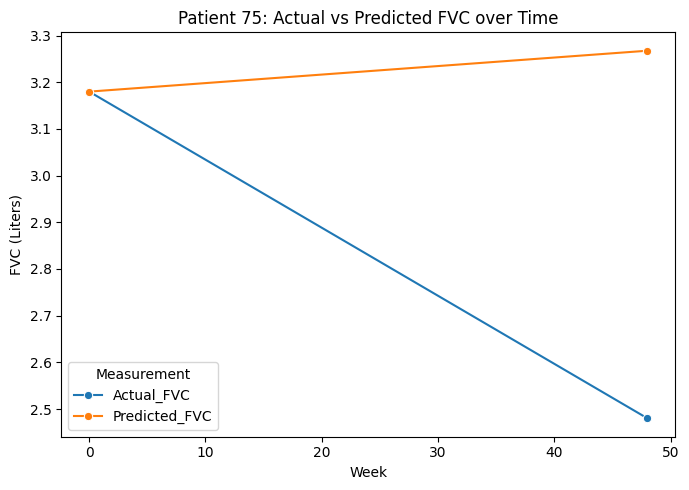

Top 5 patients with increasing FVC and lowest prediction error:
     Baseline_FVC  Target_FVC  Predicted_FVC  Abs_Error  Baseline_FVC_Week  \
556          1.43        1.48       1.470720   0.009280                0.0   
496          2.77        3.02       2.999711   0.020289                0.0   
533          2.65        2.66       2.610067   0.049933                0.0   
73           2.36        2.48       2.413143   0.066857                0.0   
110          2.50        2.71       2.607255   0.102745                0.0   

     Followup_FVC_Week  
556               55.0  
496               56.0  
533               52.0  
73                53.0  
110               48.0  


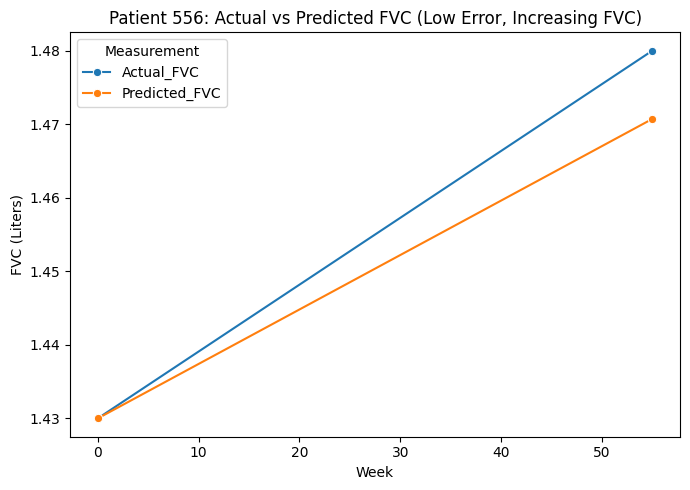

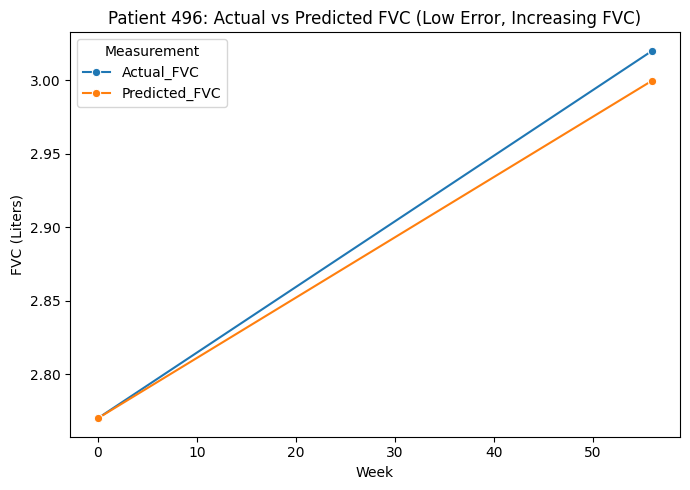

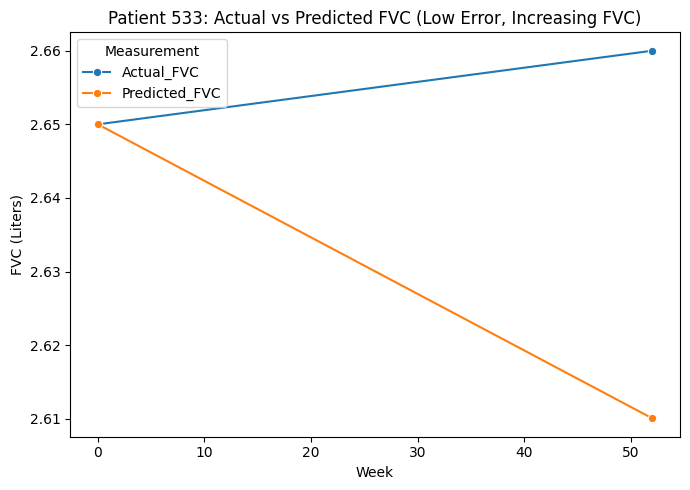

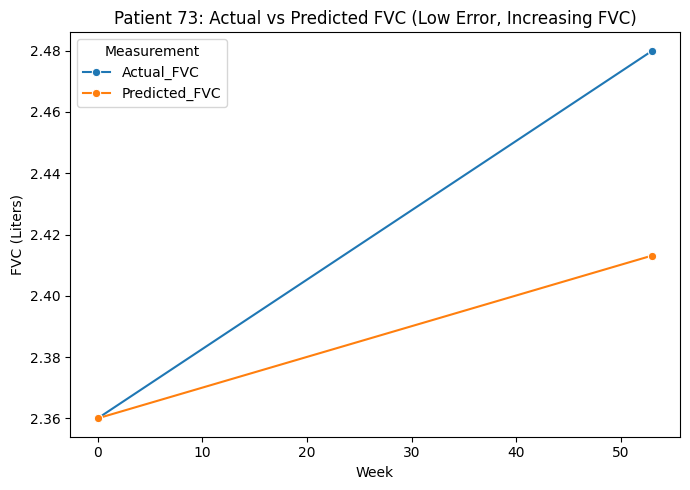

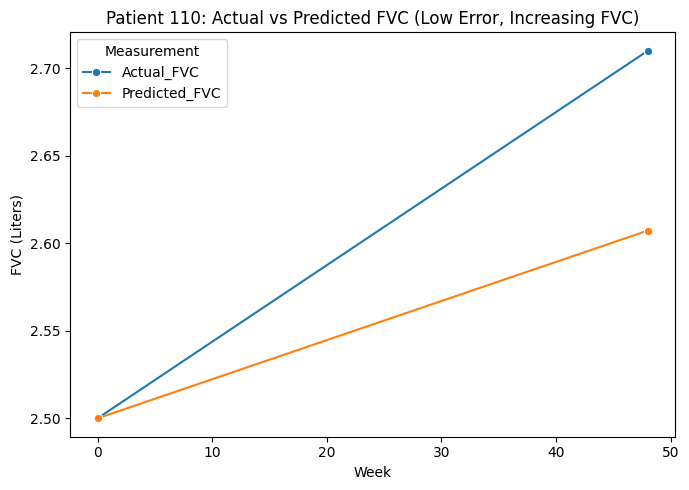

In [24]:
#tested
selected_features = ['original_shape_MinorAxisLength_left_lung', 'wavelet-HLH_gldm_DependenceNonUniformityNormalized_right_lung', 'log-sigma-2-0-mm-3D_firstorder_10Percentile_right_lung', 'original_shape_MinorAxisLength_right_lung', 'wavelet-HHL_glcm_Idmn_right_lung', 'original_shape_SurfaceArea_right_lung', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_right_lung', 'log-sigma-3-0-mm-3D_glcm_InverseVariance_right_lung', 'log-sigma-2-0-mm-3D_firstorder_Kurtosis_left_lung', 'log-sigma-1-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_right_lung', 'log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_right_lung', 'log-sigma-1-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis_left_lung', 'log-sigma-4-0-mm-3D_glcm_InverseVariance_right_lung', 'wavelet-LHL_glcm_Idmn_left_lung', 'log-sigma-1-0-mm-3D_firstorder_Skewness_left_lung', 'wavelet-HLL_firstorder_Kurtosis_left_lung']
Clinical_Contineous_data_ext = selected_features + Clinical_Contineous_data
print(Clinical_Contineous_data_ext)
X_train, X_test, y_train, y_test = joblib.load("/home/pansurya/OSIC_thesis/radiomics_files/data_splits_clinical_without_harmonization.pkl")
X_train_clini_log = X_train.copy()
X_test_clini_log  = X_test.copy()

# Transform Age
for col in ['Age']:
    X_train_clini_log[col] = np.log(X_train_clini_log[col])
    X_test_clini_log[col] = np.log(X_test_clini_log[col])

# Median imputation (only needed if missing values exist)
imp_median = SimpleImputer(strategy='median')
imp_median.fit(X_train_clini_log)

X_train_median_filled = pd.DataFrame(
    imp_median.transform(X_train_clini_log),
    columns=X_train_clini_log.columns,
    index=X_train_clini_log.index
)

X_test_median_filled = pd.DataFrame(
    imp_median.transform(X_test_clini_log),
    columns=X_test_clini_log.columns,
    index=X_test_clini_log.index
)

# Run experiments
results1 = train_and_evaluate(X_train_median_filled, X_test_median_filled, y_train, y_test, selected_features, Clinical_Contineous_data_ext, Clinical_Categorical_data, model_name="/home/pansurya/OSIC_thesis/Linear_model/Correlation_based_Using_mrmr_without_harmonization.pkl")
# print("Running LOOCV experiment...")
# results1 = train_and_evaluate_with_LOOCV(X_train, X_test, y_train, y_test, selected_features, model_name="/home/pansurya/OSIC_thesis/Linear_model/PAM_ANOVA_VIF_LOOCV.pkl")


['Baseline FVC Volume L', 'wavelet-LLH_glszm_ZoneEntropy_right_lung', 'original_shape_MinorAxisLength_left_lung', 'wavelet-LHL_glrlm_GrayLevelNonUniformity_right_lung', 'Sex_Female', 'original_shape_MinorAxisLength_right_lung', 'original_firstorder_90Percentile_right_lung', 'original_shape_MeshVolume_right_lung', 'wavelet-HHL_glcm_Idmn_right_lung', 'wavelet-LLH_glrlm_GrayLevelNonUniformity_right_lung', 'wavelet-HLL_glrlm_GrayLevelNonUniformity_right_lung', 'log-sigma-2-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_left_lung', 'original_firstorder_90Percentile_left_lung', 'wavelet-HLL_glrlm_RunLengthNonUniformity_right_lung', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_right_lung', 'original_shape_SurfaceArea_right_lung', 'wavelet-LHL_ngtdm_Busyness_left_lung', 'log-sigma-3-0-mm-3D_glcm_InverseVariance_right_lung', 'log-sigma-1-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_left_lung', 'wavelet-LHL_ngtdm_Busyness_right_lung', 'log-sigma-2-0-mm-3D_firstorder_Kurtosis_left_lung', 'Smoking


Best alpha (regularization strength): 0.02069138081114789

Cross-validation results (averaged across folds):
- MAE:  0.24
- MSE:  0.12
- RMSE: 0.35
- R²:   0.842

Test set performance:
- MAE:  0.24
- MSE:  0.12
- RMSE: 0.35
- R²:   0.826

Training set performance:
- MAE:  0.22
- MSE:  0.11
- RMSE: 0.33
- R²:   0.859

Selected features (non-zero coefficients):
                                              Feature  Coefficient
0                               Baseline FVC Volume L     0.728580
5           original_shape_MinorAxisLength_right_lung     0.035028
44  log-sigma-1-0-mm-3D_firstorder_10Percentile_le...     0.026658
16               wavelet-LHL_ngtdm_Busyness_left_lung     0.026294
43  wavelet-LLL_glszm_SizeZoneNonUniformityNormali...    -0.018296
75                    wavelet-HLH_glcm_MCC_right_lung     0.014345
39                      Smoking History_Active Smoker     0.014031
21                       Smoking History_Never Smoker    -0.012997
4                                 

/tmp/ipykernel_2118883/2204985122.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


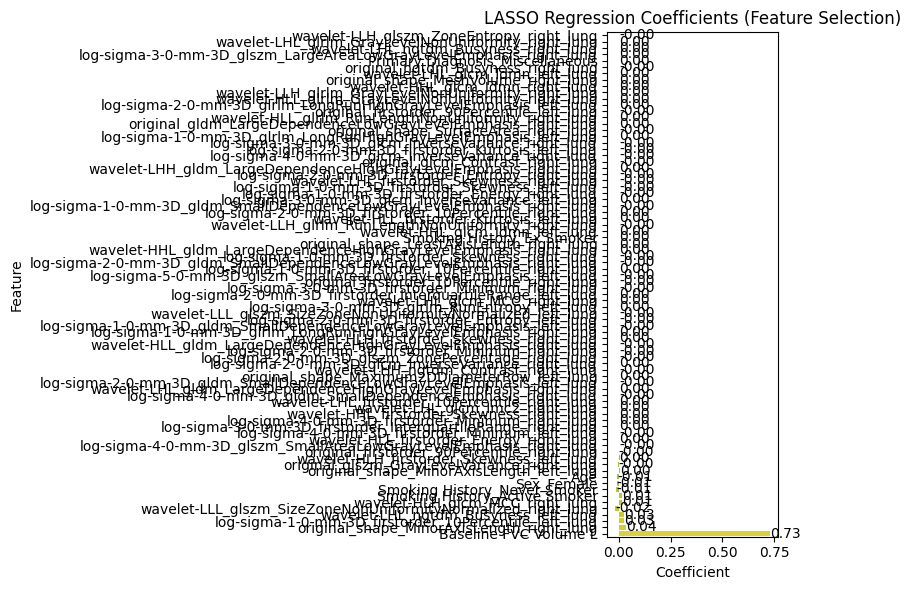

In [54]:
# =========================
# Imports
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# =========================
# Function Definition
# =========================
def train_and_evaluate_lasso(X_train, X_test, y_train, y_test, feature_list, model_name="lasso_pipeline.pkl"):
    """
    Train and evaluate a LASSO regression model with K-Fold cross-validation,
    reporting metrics for CV, training, and test sets, and performing feature selection.
    """

    # Build pipeline
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(max_iter=10000))
    ])

    # Define hyperparameter grid for alpha
    param_grid = {
        "lasso__alpha": np.logspace(-3, 2, 20)  # from 0.001 to 100
    }

    # K-Fold setup
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # GridSearch with CV
    grid = GridSearchCV(
        pipeline,
        param_grid,
        cv=kf,
        scoring="neg_mean_absolute_error",
        n_jobs=-1,
        return_train_score=True
    )

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    print("\nBest alpha (regularization strength):", grid.best_params_["lasso__alpha"])

    # ---- Cross-validation metrics ----
    cv_mae_all = -cross_val_score(best_model, X_train, y_train, cv=kf, scoring="neg_mean_absolute_error")
    cv_mse_all = -cross_val_score(best_model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
    cv_rmse_all = np.sqrt(cv_mse_all)
    cv_r2_all = cross_val_score(best_model, X_train, y_train, cv=kf, scoring="r2")

    print("\nCross-validation results (averaged across folds):")
    print(f"- MAE:  {cv_mae_all.mean():.2f}")
    print(f"- MSE:  {cv_mse_all.mean():.2f}")
    print(f"- RMSE: {cv_rmse_all.mean():.2f}")
    print(f"- R²:   {cv_r2_all.mean():.3f}")

    # ---- Test set metrics ----
    y_test_pred = best_model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    print("\nTest set performance:")
    print(f"- MAE:  {test_mae:.2f}")
    print(f"- MSE:  {test_mse:.2f}")
    print(f"- RMSE: {test_rmse:.2f}")
    print(f"- R²:   {test_r2:.3f}")


    # ---- Training set metrics ----
    y_train_pred = best_model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    print("\nTraining set performance:")
    print(f"- MAE:  {train_mae:.2f}")
    print(f"- MSE:  {train_mse:.2f}")
    print(f"- RMSE: {train_rmse:.2f}")
    print(f"- R²:   {train_r2:.3f}")

    # ---- Feature selection ----
    coefs = best_model.named_steps["lasso"].coef_
    coef_df = pd.DataFrame({
        "Feature": feature_list,
        "Coefficient": coefs,
        "AbsCoefficient": np.abs(coefs)
    }).sort_values(by="AbsCoefficient", ascending=False)

    print("\nSelected features (non-zero coefficients):")
    print(coef_df[coef_df["Coefficient"] != 0][["Feature", "Coefficient"]])

    # Plot coefficients
    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=coef_df.sort_values(by="AbsCoefficient", ascending=True),
        x="Coefficient", y="Feature", palette="viridis"
    )
    plt.title("LASSO Regression Coefficients (Feature Selection)")
    plt.xlabel("Coefficient")
    plt.ylabel("Feature")

    for i, v in enumerate(coef_df.sort_values(by="AbsCoefficient", ascending=True)["Coefficient"]):
        plt.text(v, i, f"{v:.2f}", va="center")

    plt.tight_layout()
    plt.show()

    # Save model
    joblib.dump(best_model, model_name)

    return {
        "best_alpha": grid.best_params_["lasso__alpha"],
        "cv_results": {
            "MAE": cv_mae_all.mean(),
            "MSE": cv_mse_all.mean(),
            "RMSE": cv_rmse_all.mean(),
            "R2": cv_r2_all.mean()
        },
        "train_results": {
            "MAE": train_mae,
            "MSE": train_mse,
            "RMSE": train_rmse,
            "R2": train_r2
        },
        "test_results": {
            "MAE": test_mae,
            "MSE": test_mse,
            "RMSE": test_rmse,
            "R2": test_r2
        },
        "coef_df": coef_df
    }


selected_features = ['Baseline FVC Volume L', 'wavelet-LLH_glszm_ZoneEntropy_right_lung', 'original_shape_MinorAxisLength_left_lung', 'wavelet-LHL_glrlm_GrayLevelNonUniformity_right_lung', 'Sex_Female', 'original_shape_MinorAxisLength_right_lung', 'original_firstorder_90Percentile_right_lung', 'original_shape_MeshVolume_right_lung', 'wavelet-HHL_glcm_Idmn_right_lung', 'wavelet-LLH_glrlm_GrayLevelNonUniformity_right_lung', 'wavelet-HLL_glrlm_GrayLevelNonUniformity_right_lung', 'log-sigma-2-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_left_lung', 'original_firstorder_90Percentile_left_lung', 'wavelet-HLL_glrlm_RunLengthNonUniformity_right_lung', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_right_lung', 'original_shape_SurfaceArea_right_lung', 'wavelet-LHL_ngtdm_Busyness_left_lung', 'log-sigma-3-0-mm-3D_glcm_InverseVariance_right_lung', 'log-sigma-1-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_left_lung', 'wavelet-LHL_ngtdm_Busyness_right_lung', 'log-sigma-2-0-mm-3D_firstorder_Kurtosis_left_lung', 'Smoking History_Never Smoker', 'log-sigma-1-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis_left_lung', 'log-sigma-1-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_right_lung', 'log-sigma-3-0-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis_right_lung', 'wavelet-LHL_glcm_Idmn_left_lung', 'original_ngtdm_Busyness_right_lung', 'Primary Diagnosis_Miscellaneous', 'log-sigma-4-0-mm-3D_glcm_InverseVariance_right_lung', 'wavelet-HLL_firstorder_Kurtosis_left_lung', 'wavelet-LLH_glrlm_RunLengthNonUniformity_right_lung', 'wavelet-HHL_glcm_Idmn_left_lung', 'log-sigma-2-0-mm-3D_firstorder_10Percentile_right_lung', 'log-sigma-1-0-mm-3D_firstorder_Skewness_left_lung', 'log-sigma-1-0-mm-3D_firstorder_Energy_right_lung', 'log-sigma-1-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis_right_lung', 'log-sigma-3-0-mm-3D_glcm_InverseVariance_left_lung', 'log-sigma-2-0-mm-3D_firstorder_Entropy_right_lung', 'wavelet-LHL_firstorder_Skewness_right_lung', 'Smoking History_Active Smoker', 'original_glcm_Contrast_right_lung', 'wavelet-LHH_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'log-sigma-1-0-mm-3D_firstorder_Skewness_right_lung', 'wavelet-LLL_glszm_SizeZoneNonUniformityNormalized_right_lung', 'log-sigma-1-0-mm-3D_firstorder_10Percentile_left_lung', 'wavelet-HHL_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'original_shape_LeastAxisLength_right_lung', 'Smoking History_Ex Smoker', 'log-sigma-1-0-mm-3D_firstorder_10Percentile_right_lung', 'original_firstorder_10Percentile_right_lung', 'log-sigma-5-0-mm-3D_glszm_SmallAreaLowGrayLevelEmphasis_left_lung', 'wavelet-HLL_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'log-sigma-2-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis_right_lung', 'log-sigma-2-0-mm-3D_firstorder_Entropy_left_lung', 'wavelet-HLH_firstorder_Skewness_right_lung', 'log-sigma-3-0-mm-3D_firstorder_Minimum_right_lung', 'log-sigma-2-0-mm-3D_firstorder_InterquartileRange_left_lung', 'log-sigma-3-0-mm-3D_glrlm_RunEntropy_left_lung', 'wavelet-LHL_glcm_MCC_right_lung', 'wavelet-LLL_glszm_SizeZoneNonUniformityNormalized_left_lung', 'wavelet-HLH_firstorder_Skewness_left_lung', 'log-sigma-4-0-mm-3D_firstorder_Minimum_right_lung', 'log-sigma-3-0-mm-3D_firstorder_InterquartileRange_right_lung', 'log-sigma-4-0-mm-3D_firstorder_Minimum_left_lung', 'wavelet-HHL_firstorder_Skewness_right_lung', 'wavelet-LHL_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'log-sigma-4-0-mm-3D_gldm_SmallDependenceEmphasis_right_lung', 'wavelet-LHL_glcm_Imc2_right_lung', 'wavelet-LHL_firstorder_10Percentile_right_lung', 'original_shape_Maximum2DDiameterRow_left_lung', 'Age', 'log-sigma-2-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis_left_lung', 'log-sigma-2-0-mm-3D_glcm_InverseVariance_right_lung', 'wavelet-LHH_ngtdm_Contrast_right_lung', 'log-sigma-2-0-mm-3D_glszm_ZonePercentage_right_lung', 'wavelet-HLH_glcm_MCC_right_lung', 'log-sigma-2-0-mm-3D_firstorder_Minimum_right_lung', 'wavelet-HLL_firstorder_Energy_right_lung', 'original_glszm_GrayLevelVariance_right_lung', 'log-sigma-4-0-mm-3D_glszm_SmallAreaLowGrayLevelEmphasis_right_lung']

# selected_features.extend(Clinical_demographic_data)
print(selected_features)
X_train, X_test, y_train, y_test = joblib.load("data_splits.pkl")
# Subset features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

results = train_and_evaluate_lasso(
    X_train, X_test, y_train, y_test,
    feature_list=selected_features,
    model_name="lasso_model.pkl"
)


['original_shape_MinorAxisLength_left_lung', 'wavelet-HLH_ngtdm_Contrast_left_lung', 'log-sigma-1-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis_left_lung', 'log-sigma-2-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_left_lung', 'wavelet-HHL_glcm_Idmn_right_lung', 'wavelet-LLL_glszm_GrayLevelVariance_left_lung', 'wavelet-HHH_firstorder_Mean_left_lung', 'wavelet-LHH_glcm_ClusterShade_left_lung', 'wavelet-HHL_ngtdm_Contrast_right_lung', 'wavelet-LHL_ngtdm_Busyness_right_lung', 'wavelet-LHL_glcm_Idmn_left_lung', 'original_shape_MinorAxisLength_right_lung', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'original_gldm_SmallDependenceHighGrayLevelEmphasis_right_lung', 'log-sigma-2-0-mm-3D_firstorder_10Percentile_right_lung', 'log-sigma-2-0-mm-3D_ngtdm_Strength_left_lung', 'wavelet-LLL_ngtdm_Contrast_right_lung', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_right_lung', 'original_shape_SurfaceArea_left_lung']
(408, 19)
(102, 19)
Completed fold 1
Completed fol

/tmp/ipykernel_2118883/53607559.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="RepeatFold", y="MSE", data=cv_results, palette="Set2")


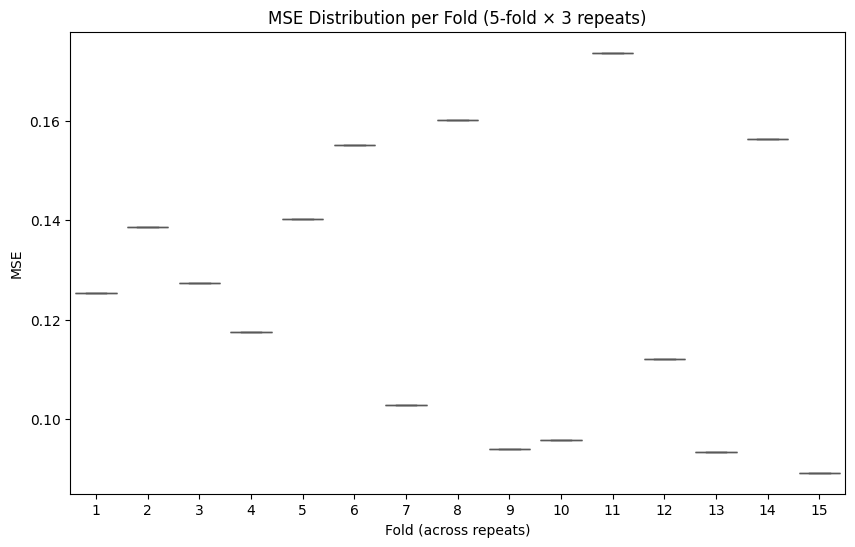

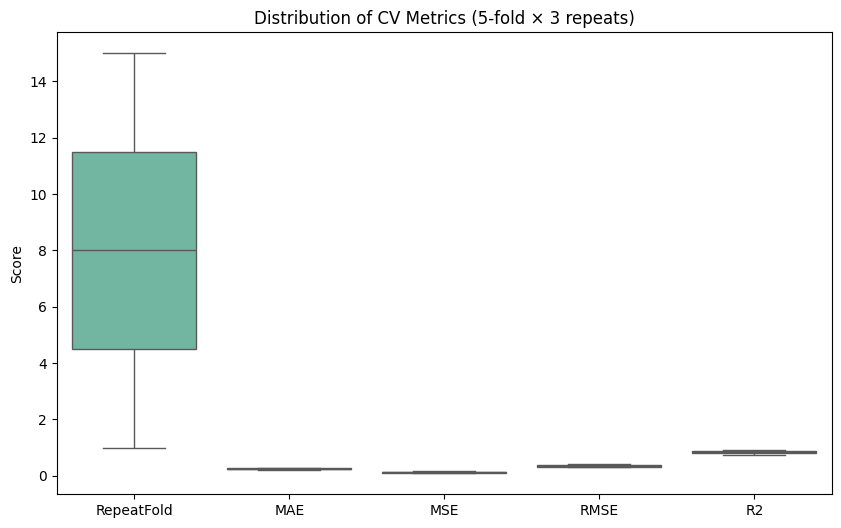


Test set performance:
- MAE:  0.25
- MSE:  0.13
- RMSE: 0.36
- R²:   0.815

Training set performance:
- MAE:  0.21
- MSE:  0.10
- RMSE: 0.31
- R²:   0.875

Model coefficients (sorted by |coef|):
                                              Feature  Coefficient
27                    onehot__Primary Diagnosis_INSIP     0.704991
0                          num__Baseline FVC Volume L     0.692715
24                onehot__Primary Diagnosis_Emphysema     0.636519
33  onehot__Primary Diagnosis_Occupational-related...     0.505788
25         onehot__Primary Diagnosis_Exposure-related     0.476033
31            onehot__Primary Diagnosis_Miscellaneous     0.288342
30  onehot__Primary Diagnosis_Idiopathic pleuropar...     0.246595
34              onehot__Primary Diagnosis_Sarcoidosis     0.241798
36                     onehot__Primary Diagnosis_UILD     0.240754
23                  onehot__Primary Diagnosis_CTD-ILD     0.224770
28                      onehot__Primary Diagnosis_IPF     0.203322


/tmp/ipykernel_2118883/53607559.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


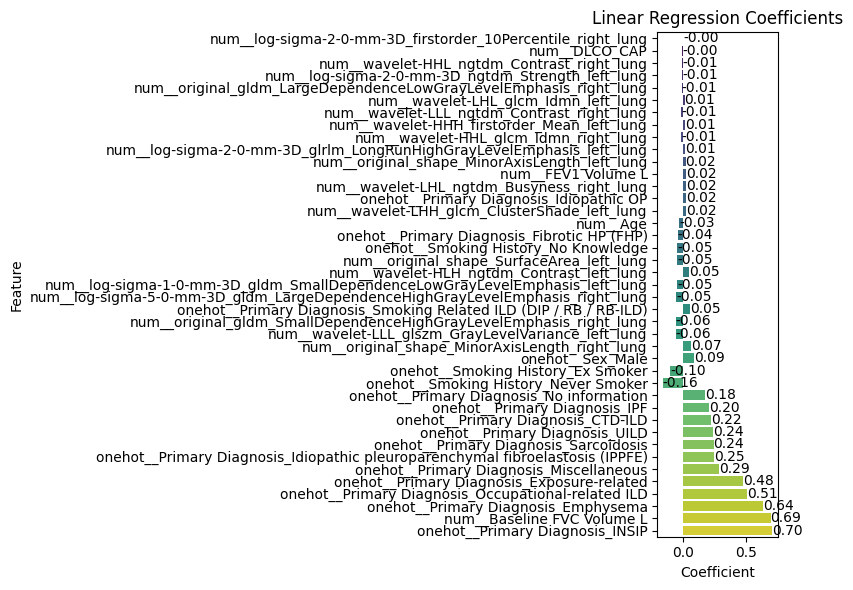

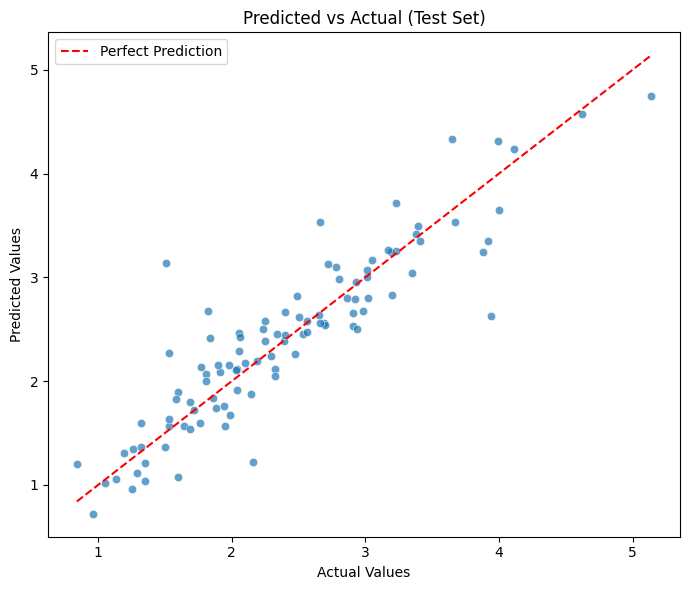

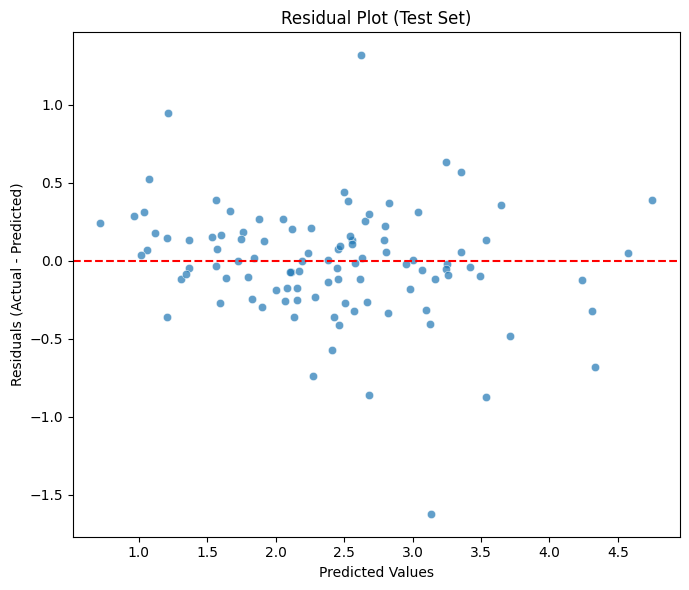

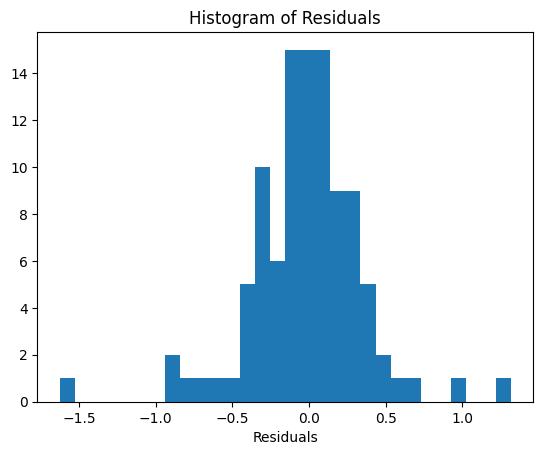

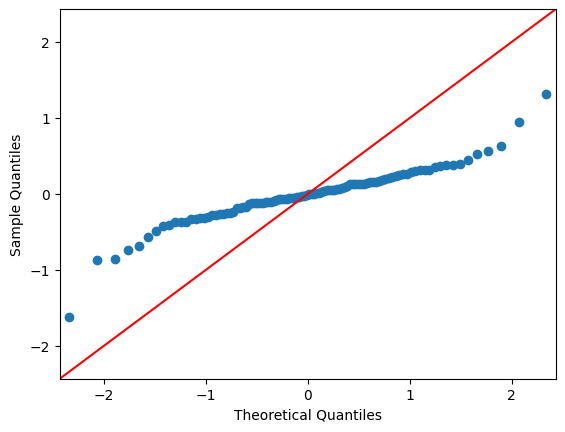


Top 5 patients with largest squared errors:
     Baseline_FVC  Target_FVC  Predicted_FVC  Squared_Error  \
329          3.32        1.51       3.133625       1.623625   
182          2.50        3.94       2.624072       1.315928   
154          1.44        2.16       1.217163       0.942837   
417          3.50        2.66       3.535422       0.875422   
220          1.88        1.82       2.679948       0.859948   

     Baseline_FVC_Week  Followup_FVC_Week  
329                  0               49.0  
182                  0               52.0  
154                  0               56.0  
417                  0               52.0  
220                  0               55.0  


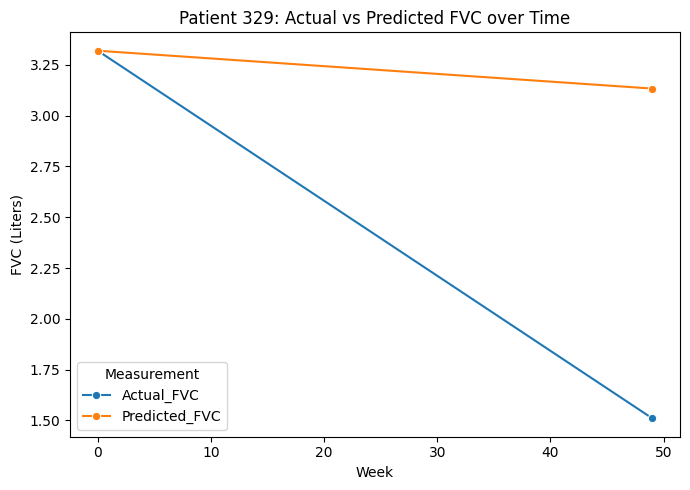

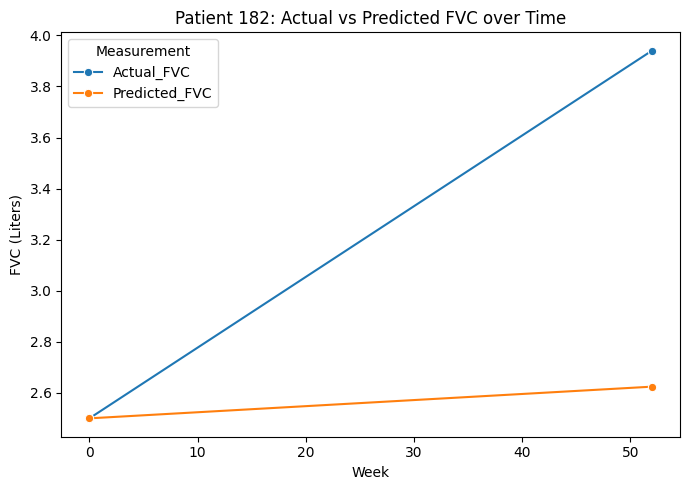

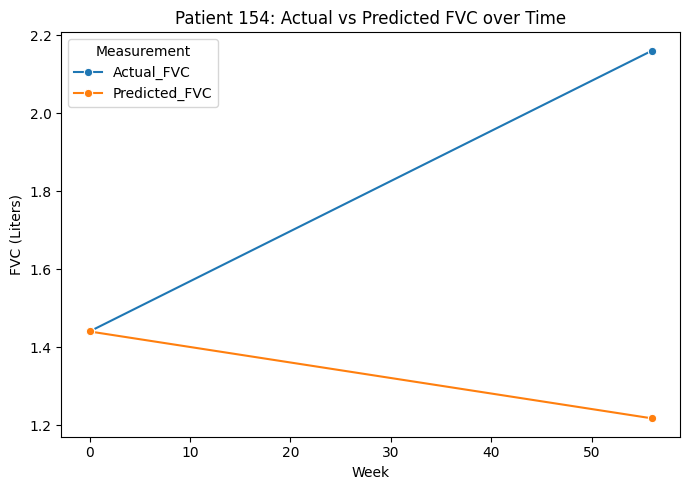

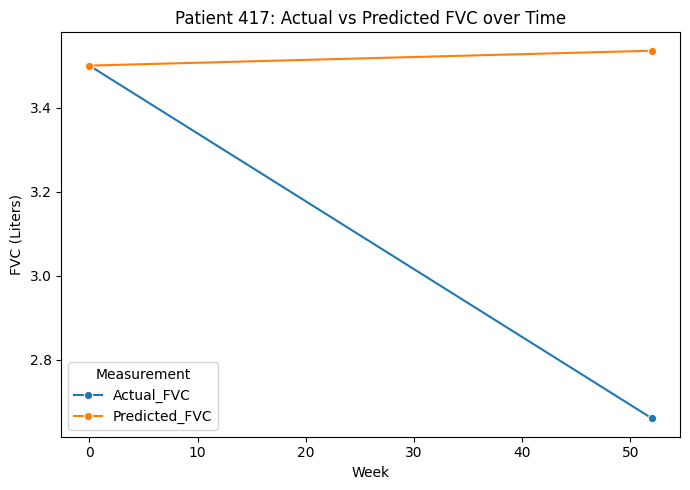

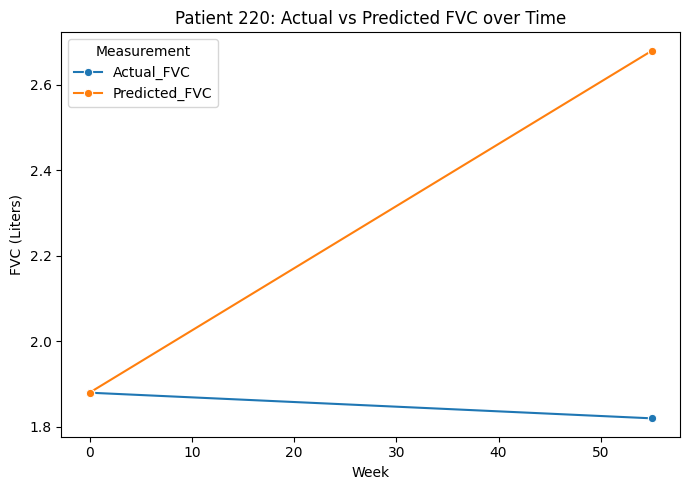

Top 5 patients with increasing FVC and lowest prediction error:
     Baseline_FVC  Target_FVC  Predicted_FVC  Abs_Error  Baseline_FVC_Week  \
364          2.99        3.01       3.005251   0.004749                  0   
441          1.28        1.32       1.367394   0.047394                  0   
101          2.58        2.86       2.803074   0.056926                  0   
33           2.43        2.53       2.453077   0.076923                  0   
167          2.43        2.56       2.469016   0.090984                  0   

     Followup_FVC_Week  
364               55.0  
441               51.0  
101               50.0  
33                54.0  
167               52.0  


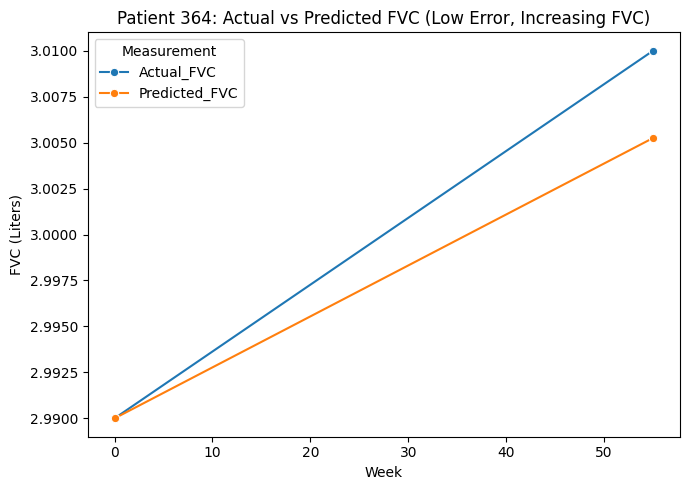

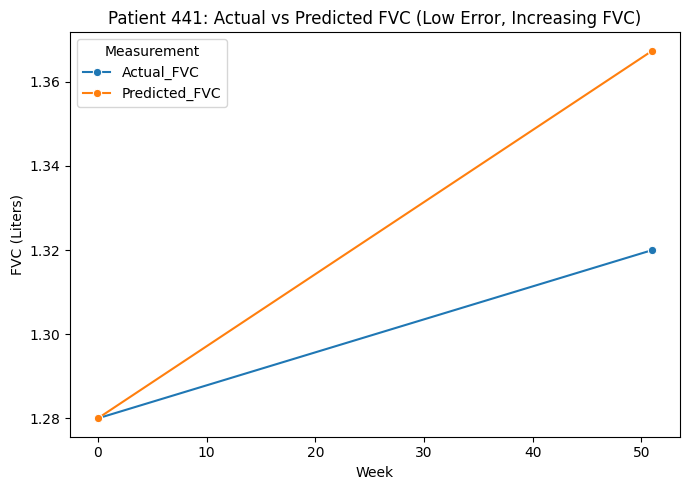

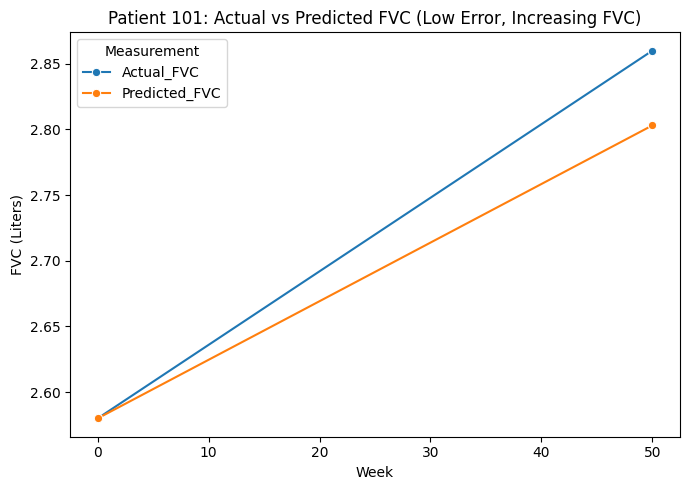

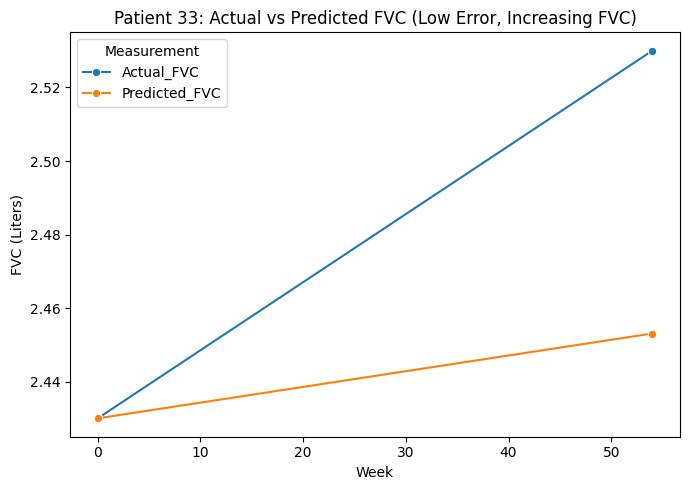

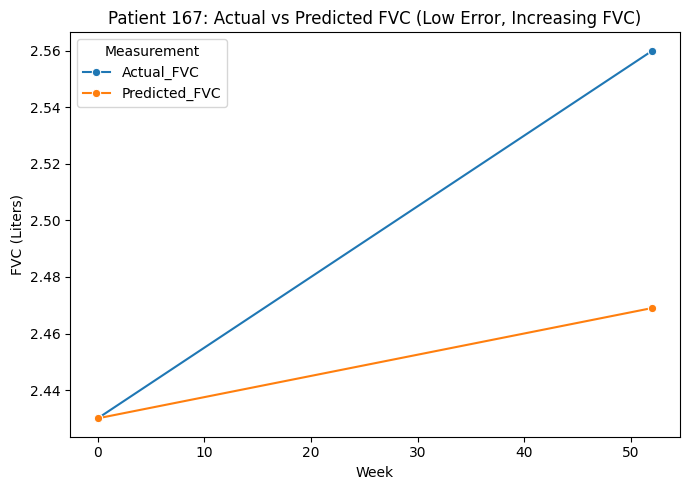

In [55]:
#tested
selected_features = ['original_shape_MinorAxisLength_left_lung', 'wavelet-HLH_ngtdm_Contrast_left_lung', 'log-sigma-1-0-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis_left_lung', 'log-sigma-2-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis_left_lung', 'wavelet-HHL_glcm_Idmn_right_lung', 'wavelet-LLL_glszm_GrayLevelVariance_left_lung', 'wavelet-HHH_firstorder_Mean_left_lung', 'wavelet-LHH_glcm_ClusterShade_left_lung', 'wavelet-HHL_ngtdm_Contrast_right_lung', 'wavelet-LHL_ngtdm_Busyness_right_lung', 'wavelet-LHL_glcm_Idmn_left_lung', 'original_shape_MinorAxisLength_right_lung', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_right_lung', 'original_gldm_SmallDependenceHighGrayLevelEmphasis_right_lung', 'log-sigma-2-0-mm-3D_firstorder_10Percentile_right_lung', 'log-sigma-2-0-mm-3D_ngtdm_Strength_left_lung', 'wavelet-LLL_ngtdm_Contrast_right_lung', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_right_lung', 'original_shape_SurfaceArea_left_lung']
Clinical_Contineous_data_ext = Clinical_Contineous_data + selected_features
print(selected_features)
X_train, X_test, y_train, y_test = joblib.load("data_splits.pkl")
# Subset features
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]
print(X_train_sel.shape)
print(X_test_sel.shape)
# Run experiments
results1 = train_and_evaluate(X_train, X_test, y_train, y_test, selected_features, Clinical_Contineous_data_ext, Clinical_Categorical_data, model_name="/home/pansurya/OSIC_thesis/Linear_model/Selected_features_from_LASSO.pkl")
# print("Running LOOCV experiment...")
# results1 = train_and_evaluate_with_LOOCV(X_train, X_test, y_train, y_test, selected_features, model_name="/home/pansurya/OSIC_thesis/Linear_model/PAM_ANOVA_VIF_LOOCV.pkl")


